# Data science technical test

@author: Talardia Gbangou, April 2022

This is a functional and structured code in python using jupyter notebook with outputs display. We group together the real estate advertisements relating to the same property. We focus on showing how data can be explored, cleaned, grouped by property type, treated for text and images.

## Content

1. IMPORTING RELEVANT MODULES
2. LOADING DATASET
3. GENERAL INSPECTION OF DATA
4. GROUPING DATASET
5. DATA CLEANING
6. TREATING TEXT DATA FOR EACH ELEMENT OF PROPERTY
7. TREATING IMAGE DATA FOR EACH ELEMENT OF PROPERTY

# IMPORTING RELEVANT MODULES
These are a summary of modules imported throughout the code.

In [53]:
import pandas as pd
import numpy as np

import nltk
#nltk.download('punkt') 
#nltk.download('stopwords')

from nltk import sent_tokenize 
from nltk.tokenize import word_tokenize 
import string 
from nltk.corpus import stopwords 

import ast 
from IPython.core.display import Image,display

import matplotlib.pyplot as plt
%matplotlib inline

# LOADING DATASET
Here I load the dataset Dataset-ads-levallois-perret-2019-08-27.csv (data downloaded, renamed and saved in csv format)

In [54]:
#import pandas as pd
df = pd.read_csv("/home/tgbangou/Yanport/Dataset-ads-levallois-perret-2019-08-27.csv")

# GENERAL INSPECTION OF DATA
Here we inspect the whole dataset.

1. Viewing the first rows of the dataframe
2. Summary of descriptive statistics: data inventory before data cleaning
3. More Info on the dataframe
4. Remarks

1.Viewing the first rows of the dataframe

In [55]:
df.head(5)

ID  \
0  22c05930-0eb5-11e7-b53d-bbead8ba43fe   
1  8d092fa0-bb99-11e8-a7c9-852783b5a69d   
2  44b6a5c0-3466-11e9-8213-25cc7d9bf5fc   
3  e9e07ed0-812f-11e8-82aa-61eacebe4584   
4  872302b0-5a21-11e9-950c-510fefc1ed35   

                                                 URL      CRAWL_SOURCE  \
0  http://www.avendrealouer.fr/location/levallois...  A_VENDRE_A_LOUER   
1  https://www.bienici.com/annonce/ag440414-16547...          BIEN_ICI   
2  https://www.bellesdemeures.com/annonces/vente/...   BELLES_DEMEURES   
3  https://www.seloger.com/annonces/locations/bur...          SE_LOGER   
4  https://www.bellesdemeures.com/annonces/vente/...   BELLES_DEMEURES   

  PROPERTY_TYPE NEW_BUILD                                        DESCRIPTION  \
0     APARTMENT     False  Au rez de chaussée d'un bel immeuble récent,ap...   
1     APARTMENT     False  Je vous propose un appartement dans la rue Col...   
2     APARTMENT     False  Dans un cadre arboré, calme et fleuri, un pent...   
3      PREMISES     False  "Le meilleur coworking flexible de la ville, 5...   
4         HOUSE     False  Levallois - Parc de la Planchette A toute prox...   

                                              IMAGES  SURFACE  LAND_SURFACE  \
0  ["https://cf-medias.avendrealouer.fr/image/_87...     72.0           NaN   
1  ["http://photos.ubiflow.net/440414/165474561/p...     48.0           NaN   
2  ["https://v.seloger.com/s/width/965/visuels/0/...    267.0           NaN   
3  ["https://pix.yanport.com/ads/e9e07ed0-812f-11...     50.0           NaN   
4  ["https://v.seloger.com/s/width/966/visuels/0/...    330.0           NaN   

   BALCONY_SURFACE  ...             DEALER_NAME  DEALER_TYPE   CITY_ID  \
0              NaN  ...    Lamirand Et Associes       AGENCY  54178039   
1              NaN  ...      Proprietes Privees    MANDATARY  54178039   
2              NaN  ...  Propriétés Parisiennes       AGENCY  54178039   
3              NaN  ...                     Iwg       AGENCY  54178039   
4              NaN  ...     Daniel Feau Neuilly       AGENCY  54178039   

               CITY  ZIP_CODE  DEPT_CODE   PUBLICATION_START_DATE  \
0  Levallois-Perret   92300.0         92  2017-03-22T04:07:56.095   
1  Levallois-Perret   92300.0         92  2018-09-18T11:04:44.461   
2  Levallois-Perret   92300.0         92  2019-02-19T16:49:03.547   
3  Levallois-Perret   92300.0         92  2018-07-06T15:18:59.805   
4  Levallois-Perret   92300.0         92  2019-04-08T17:12:20.123   

   PUBLICATION_END_DATE          LAST_CRAWL_DATE  LAST_PRICE_DECREASE_DATE  
0                   NaN  2017-04-21T18:52:35.733                       NaN  
1                   NaN   2019-06-06T10:08:10.89                2018-09-25  
2                   NaN  2019-06-13T08:22:14.314                       NaN  
3                   NaN  2019-06-18T10:40:07.405                       NaN  
4                   NaN  2019-06-14T15:02:18.155                2019-06-14  

[5 rows x 57 columns]

2.Summary of descriptive statistics: data inventory before data cleaning

In [56]:
df.describe(include='all')

ID  \
count                                   2164   
unique                                  2164   
top     22c05930-0eb5-11e7-b53d-bbead8ba43fe   
freq                                       1   
mean                                     NaN   
std                                      NaN   
min                                      NaN   
25%                                      NaN   
50%                                      NaN   
75%                                      NaN   
max                                      NaN   

                                                      URL CRAWL_SOURCE  \
count                                                2164         2164   
unique                                               2164           13   
top     http://www.avendrealouer.fr/location/levallois...     SE_LOGER   
freq                                                    1          877   
mean                                                  NaN          NaN   
std                                                   NaN          NaN   
min                                                   NaN          NaN   
25%                                                   NaN          NaN   
50%                                                   NaN          NaN   
75%                                                   NaN          NaN   
max                                                   NaN          NaN   

       PROPERTY_TYPE NEW_BUILD  \
count           2164      1973   
unique             5         2   
top        APARTMENT     False   
freq            1436      1870   
mean             NaN       NaN   
std              NaN       NaN   
min              NaN       NaN   
25%              NaN       NaN   
50%              NaN       NaN   
75%              NaN       NaN   
max              NaN       NaN   

                                              DESCRIPTION IMAGES  \
count                                                2160   2164   
unique                                               1914   1947   
top     Une adresse de choix pour devenir propriétaire...     []   
freq                                                   43    115   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

             SURFACE  LAND_SURFACE  BALCONY_SURFACE  ...        DEALER_NAME  \
count    2050.000000      3.000000              0.0  ...               2077   
unique           NaN           NaN              NaN  ...                553   
top              NaN           NaN              NaN  ...  Building Partners   
freq             NaN           NaN              NaN  ...                144   
mean      128.136068     30.000000              NaN  ...                NaN   
std       423.339898      8.660254              NaN  ...                NaN   
min         6.000000     25.000000              NaN  ...                NaN   
25%        36.200000     25.000000              NaN  ...                NaN   
50%        55.000000     25.000000              NaN  ...                NaN   
75%        93.000000     32.500000              NaN  ...                NaN   
max     10287.000000     40.000000              NaN  ...                NaN   

        DEALER_TYPE     CITY_ID              CITY  ZIP_CODE  DEPT_CODE  \
count          2164      2164.0              2164    2163.0     2164.0   
unique            3         NaN                 1       NaN        NaN   
top          AGENCY         NaN  Levallois-Perret       NaN        NaN   
freq           1854         NaN              2164       NaN        NaN   
mean            NaN  54178039.0

3.More Info on the dataframe

In [57]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2164 entries, 0 to 2163
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          2164 non-null   object 
 1   URL                         2164 non-null   object 
 2   CRAWL_SOURCE                2164 non-null   object 
 3   PROPERTY_TYPE               2164 non-null   object 
 4   NEW_BUILD                   1973 non-null   object 
 5   DESCRIPTION                 2160 non-null   object 
 6   IMAGES                      2164 non-null   object 
 7   SURFACE                     2050 non-null   float64
 8   LAND_SURFACE                3 non-null      float64
 9   BALCONY_SURFACE             0 non-null      float64
 10  TERRACE_SURFACE             25 non-null     float64
 11  ROOM_COUNT                  1835 non-null   float64
 12  BEDROOM_COUNT               696 non-null    float64
 13  BATHROOM_COUNT              0 non

4.Remarks: We notice that we have many variables with missings values/elements. ALthough the aims is not to fill in missing, we can remove columns where all elements are missing to facilate the handling of datasets for further analyses. This cleaning is done after grouping dataset by property type.

# GROUPING DATASET BY PROPERTY
1. Grouping by variable PROPERTY_TYPE
2. Check distincts elements/categories for variable PROPERTY_TYPE
3. Count and percentage of property categories.
4. Subgrouping by element of PROPERTY_TYPE

1.Grouping by variable PROPERTY_TYPE

In [58]:
gp_property= df.groupby('PROPERTY_TYPE')

2.Check distincts elements/categories for variable PROPERTY_TYPE

In [59]:
df.PROPERTY_TYPE.nunique()

5

3.Count and percentage of property categories.

In [60]:
df.PROPERTY_TYPE.value_counts()

APARTMENT    1436
PREMISES      479
PARKING       188
HOUSE          52
BUILDING        9
Name: PROPERTY_TYPE, dtype: int64

In [61]:
round(100*(df['PROPERTY_TYPE'].value_counts(normalize=True,dropna=False)),2)

APARTMENT    66.36
PREMISES     22.13
PARKING       8.69
HOUSE         2.40
BUILDING      0.42
Name: PROPERTY_TYPE, dtype: float64

4.Subgrouping by element of PROPERTY_TYPE. Elements_property=["APARTMENT","BUILDING","HOUSE","PARKING","PREMISES"]

In [62]:
gp_apt= gp_property.get_group('APARTMENT')
gp_building= gp_property.get_group('BUILDING')
gp_house= gp_property.get_group('HOUSE')
gp_parking= gp_property.get_group('PARKING')
gp_premises= gp_property.get_group('PREMISES') 

# SOME DATA CLEANING
Here we perform some missing values treatment on categories of Property type.The aim is not to fill in missings but to clean a little bit the dataset. We focus on dropping Variables/Columns where all elements/values are missing (i.e. NaN).Then we present a table missing percentages and visualisations before and after cleaning.

0. Create a cleaning function
1. APARTMENT group cleaning
2. BUILDING group cleaning
3. HOUSE group cleaning
4. PARKING group cleaning
5. PREMISES group cleaning

0.Create a cleaning function

In [63]:
def clean(data):
    data=data.replace("?",np.NaN) #replacing missing by NaN
    data=data.dropna(axis=1, how='all') #Drop the columns where all elements are NaN:
    return data

1.APARTMENT data cleaning: Calling cleaning function, check percentages of missings and visualisation.We notice (on the statistics and the histogrammes) that varables with 100% missings before the data cleaning have disapeared after the data cleaning.

percentage of missing before dropping some columns
ID                              0.00
URL                             0.00
CRAWL_SOURCE                    0.00
PROPERTY_TYPE                   0.00
NEW_BUILD                       0.21
DESCRIPTION                     0.28
IMAGES                          0.00
SURFACE                         1.39
LAND_SURFACE                  100.00
BALCONY_SURFACE               100.00
TERRACE_SURFACE                98.26
ROOM_COUNT                      0.97
BEDROOM_COUNT                  53.55
BATHROOM_COUNT                100.00
LUNCHROOM_COUNT               100.00
TOILET_COUNT                  100.00
FURNISHED                      68.11
FIREPLACE                     100.00
AIR_CONDITIONING              100.00
GARDEN                         99.09
SWIMMING_POOL                  99.79
BALCONY                       100.00
TERRACE                        95.26
CELLAR                        100.00
PARKING                         0.00
PARKING_COUNT           

array([[<AxesSubplot:title={'center':'SURFACE'}>,
        <AxesSubplot:title={'center':'LAND_SURFACE'}>,
        <AxesSubplot:title={'center':'BALCONY_SURFACE'}>,
        <AxesSubplot:title={'center':'TERRACE_SURFACE'}>,
        <AxesSubplot:title={'center':'ROOM_COUNT'}>,
        <AxesSubplot:title={'center':'BEDROOM_COUNT'}>],
       [<AxesSubplot:title={'center':'BATHROOM_COUNT'}>,
        <AxesSubplot:title={'center':'LUNCHROOM_COUNT'}>,
        <AxesSubplot:title={'center':'TOILET_COUNT'}>,
        <AxesSubplot:title={'center':'FIREPLACE'}>,
        <AxesSubplot:title={'center':'AIR_CONDITIONING'}>,
        <AxesSubplot:title={'center':'GARDEN'}>],
       [<AxesSubplot:title={'center':'SWIMMING_POOL'}>,
        <AxesSubplot:title={'center':'BALCONY'}>,
        <AxesSubplot:title={'center':'TERRACE'}>,
        <AxesSubplot:title={'center':'CELLAR'}>,
        <AxesSubplot:title={'center':'PARKING_COUNT'}>,
        <AxesSubplot:title={'center':'FLOOR'}>],
       [<AxesSubplot:title={

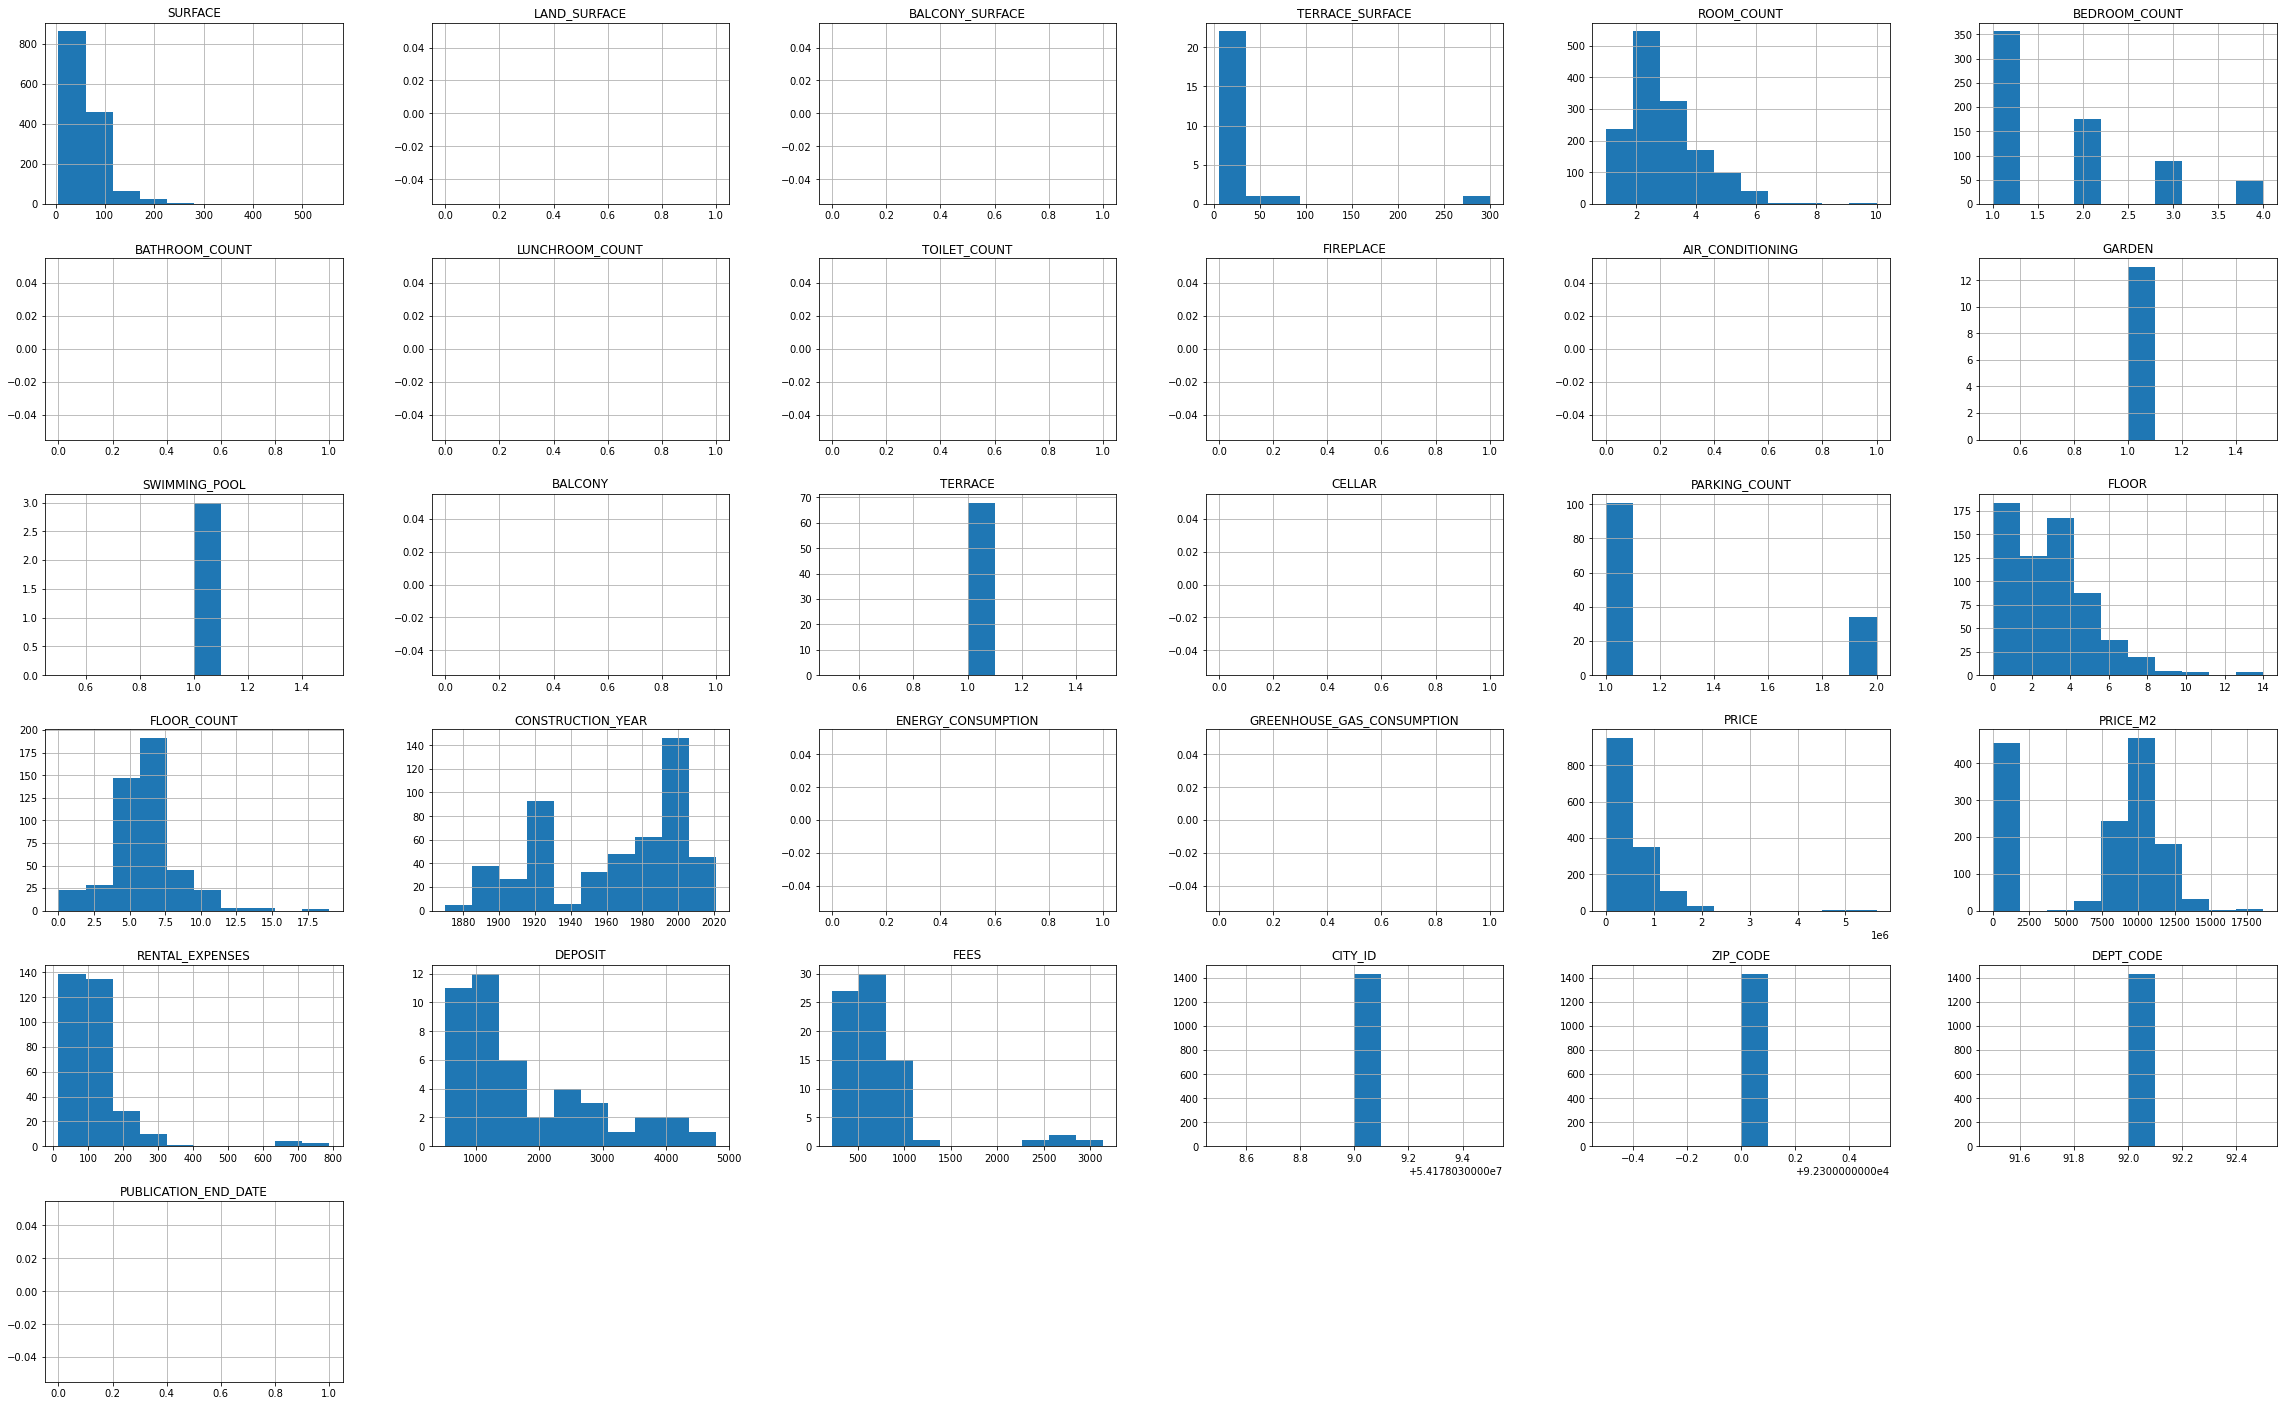

In [64]:
print('percentage of missing before dropping some columns')
print(round(100*(gp_apt.isnull().sum()/len(gp_apt.index)),2)) #check percentage of NaN before droping columns where all elements are NaN
print('Visualistation before dropping some columns')
gp_apt.hist(figsize=(40,25)) #histogram visualisation before droping columns where all elements are NaN

In [65]:
gp_apt=clean(gp_apt)

percentage of missing after dropping some columns
ID                           0.00
URL                          0.00
CRAWL_SOURCE                 0.00
PROPERTY_TYPE                0.00
NEW_BUILD                    0.21
DESCRIPTION                  0.28
IMAGES                       0.00
SURFACE                      1.39
TERRACE_SURFACE             98.26
ROOM_COUNT                   0.97
BEDROOM_COUNT               53.55
FURNISHED                   68.11
GARDEN                      99.09
SWIMMING_POOL               99.79
TERRACE                     95.26
PARKING                      0.00
PARKING_COUNT               90.60
HEATING_TYPES                0.00
HEATING_MODE                57.03
FLOOR                       55.92
FLOOR_COUNT                 67.62
CONSTRUCTION_YEAR           64.97
ELEVATOR                    61.56
CARETAKER                   82.80
MARKETING_TYPE               0.00
PRICE                        0.00
PRICE_M2                     1.39
PRICE_EVENTS                 0.0

array([[<AxesSubplot:title={'center':'SURFACE'}>,
        <AxesSubplot:title={'center':'TERRACE_SURFACE'}>,
        <AxesSubplot:title={'center':'ROOM_COUNT'}>,
        <AxesSubplot:title={'center':'BEDROOM_COUNT'}>],
       [<AxesSubplot:title={'center':'GARDEN'}>,
        <AxesSubplot:title={'center':'SWIMMING_POOL'}>,
        <AxesSubplot:title={'center':'TERRACE'}>,
        <AxesSubplot:title={'center':'PARKING_COUNT'}>],
       [<AxesSubplot:title={'center':'FLOOR'}>,
        <AxesSubplot:title={'center':'FLOOR_COUNT'}>,
        <AxesSubplot:title={'center':'CONSTRUCTION_YEAR'}>,
        <AxesSubplot:title={'center':'PRICE'}>],
       [<AxesSubplot:title={'center':'PRICE_M2'}>,
        <AxesSubplot:title={'center':'RENTAL_EXPENSES'}>,
        <AxesSubplot:title={'center':'DEPOSIT'}>,
        <AxesSubplot:title={'center':'FEES'}>],
       [<AxesSubplot:title={'center':'CITY_ID'}>,
        <AxesSubplot:title={'center':'ZIP_CODE'}>,
        <AxesSubplot:title={'center':'DEPT_CODE'}>,

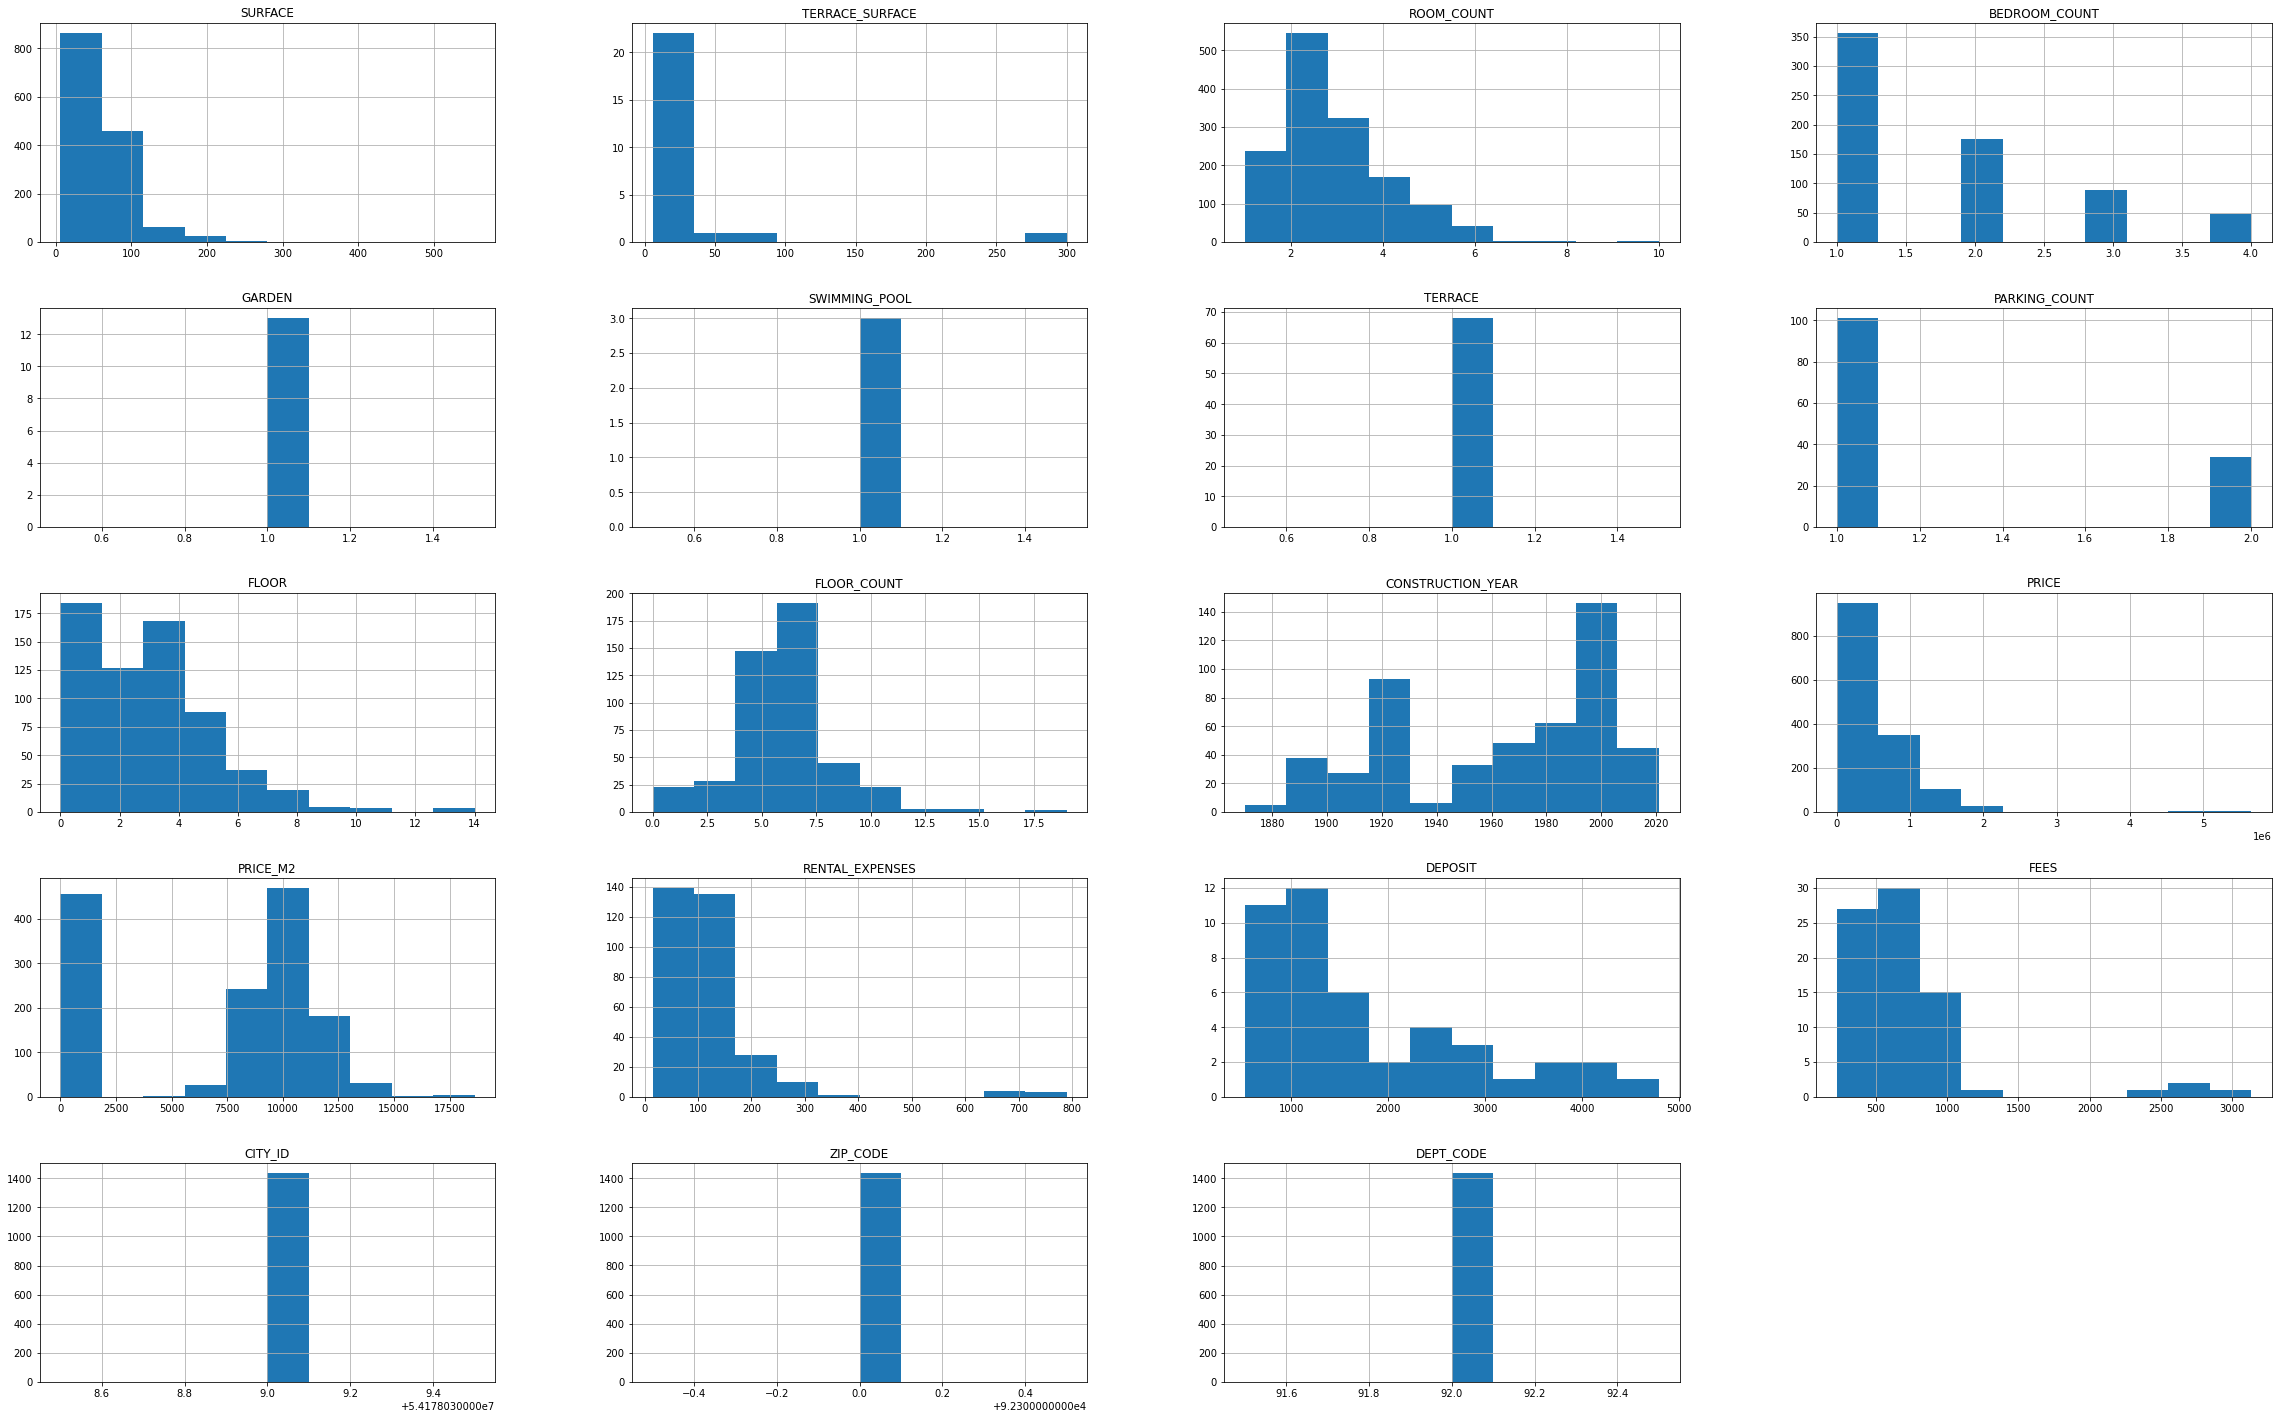

In [66]:
print('percentage of missing after dropping some columns')
print(round(100*(gp_apt.isnull().sum()/len(gp_apt.index)),2)) #check percentage of NaN after droping columns where all elements are NaN
print('Visualistation after dropping some columns:')
gp_apt.hist(figsize=(40,25)) #histogram visualisation after droping columns where all elements are NaN

2.BUILDING data cleaning: Calling cleaning function, percentages of missing and visualisation.

percentage of missing before dropping some columns:
ID                              0.00
URL                             0.00
CRAWL_SOURCE                    0.00
PROPERTY_TYPE                   0.00
NEW_BUILD                       0.00
DESCRIPTION                     0.00
IMAGES                          0.00
SURFACE                        22.22
LAND_SURFACE                  100.00
BALCONY_SURFACE               100.00
TERRACE_SURFACE               100.00
ROOM_COUNT                    100.00
BEDROOM_COUNT                 100.00
BATHROOM_COUNT                100.00
LUNCHROOM_COUNT               100.00
TOILET_COUNT                  100.00
FURNISHED                     100.00
FIREPLACE                     100.00
AIR_CONDITIONING              100.00
GARDEN                        100.00
SWIMMING_POOL                 100.00
BALCONY                       100.00
TERRACE                       100.00
CELLAR                        100.00
PARKING                         0.00
PARKING_COUNT          

array([[<AxesSubplot:title={'center':'SURFACE'}>,
        <AxesSubplot:title={'center':'LAND_SURFACE'}>,
        <AxesSubplot:title={'center':'BALCONY_SURFACE'}>,
        <AxesSubplot:title={'center':'TERRACE_SURFACE'}>,
        <AxesSubplot:title={'center':'ROOM_COUNT'}>,
        <AxesSubplot:title={'center':'BEDROOM_COUNT'}>],
       [<AxesSubplot:title={'center':'BATHROOM_COUNT'}>,
        <AxesSubplot:title={'center':'LUNCHROOM_COUNT'}>,
        <AxesSubplot:title={'center':'TOILET_COUNT'}>,
        <AxesSubplot:title={'center':'FIREPLACE'}>,
        <AxesSubplot:title={'center':'AIR_CONDITIONING'}>,
        <AxesSubplot:title={'center':'GARDEN'}>],
       [<AxesSubplot:title={'center':'SWIMMING_POOL'}>,
        <AxesSubplot:title={'center':'BALCONY'}>,
        <AxesSubplot:title={'center':'TERRACE'}>,
        <AxesSubplot:title={'center':'CELLAR'}>,
        <AxesSubplot:title={'center':'PARKING_COUNT'}>,
        <AxesSubplot:title={'center':'FLOOR'}>],
       [<AxesSubplot:title={

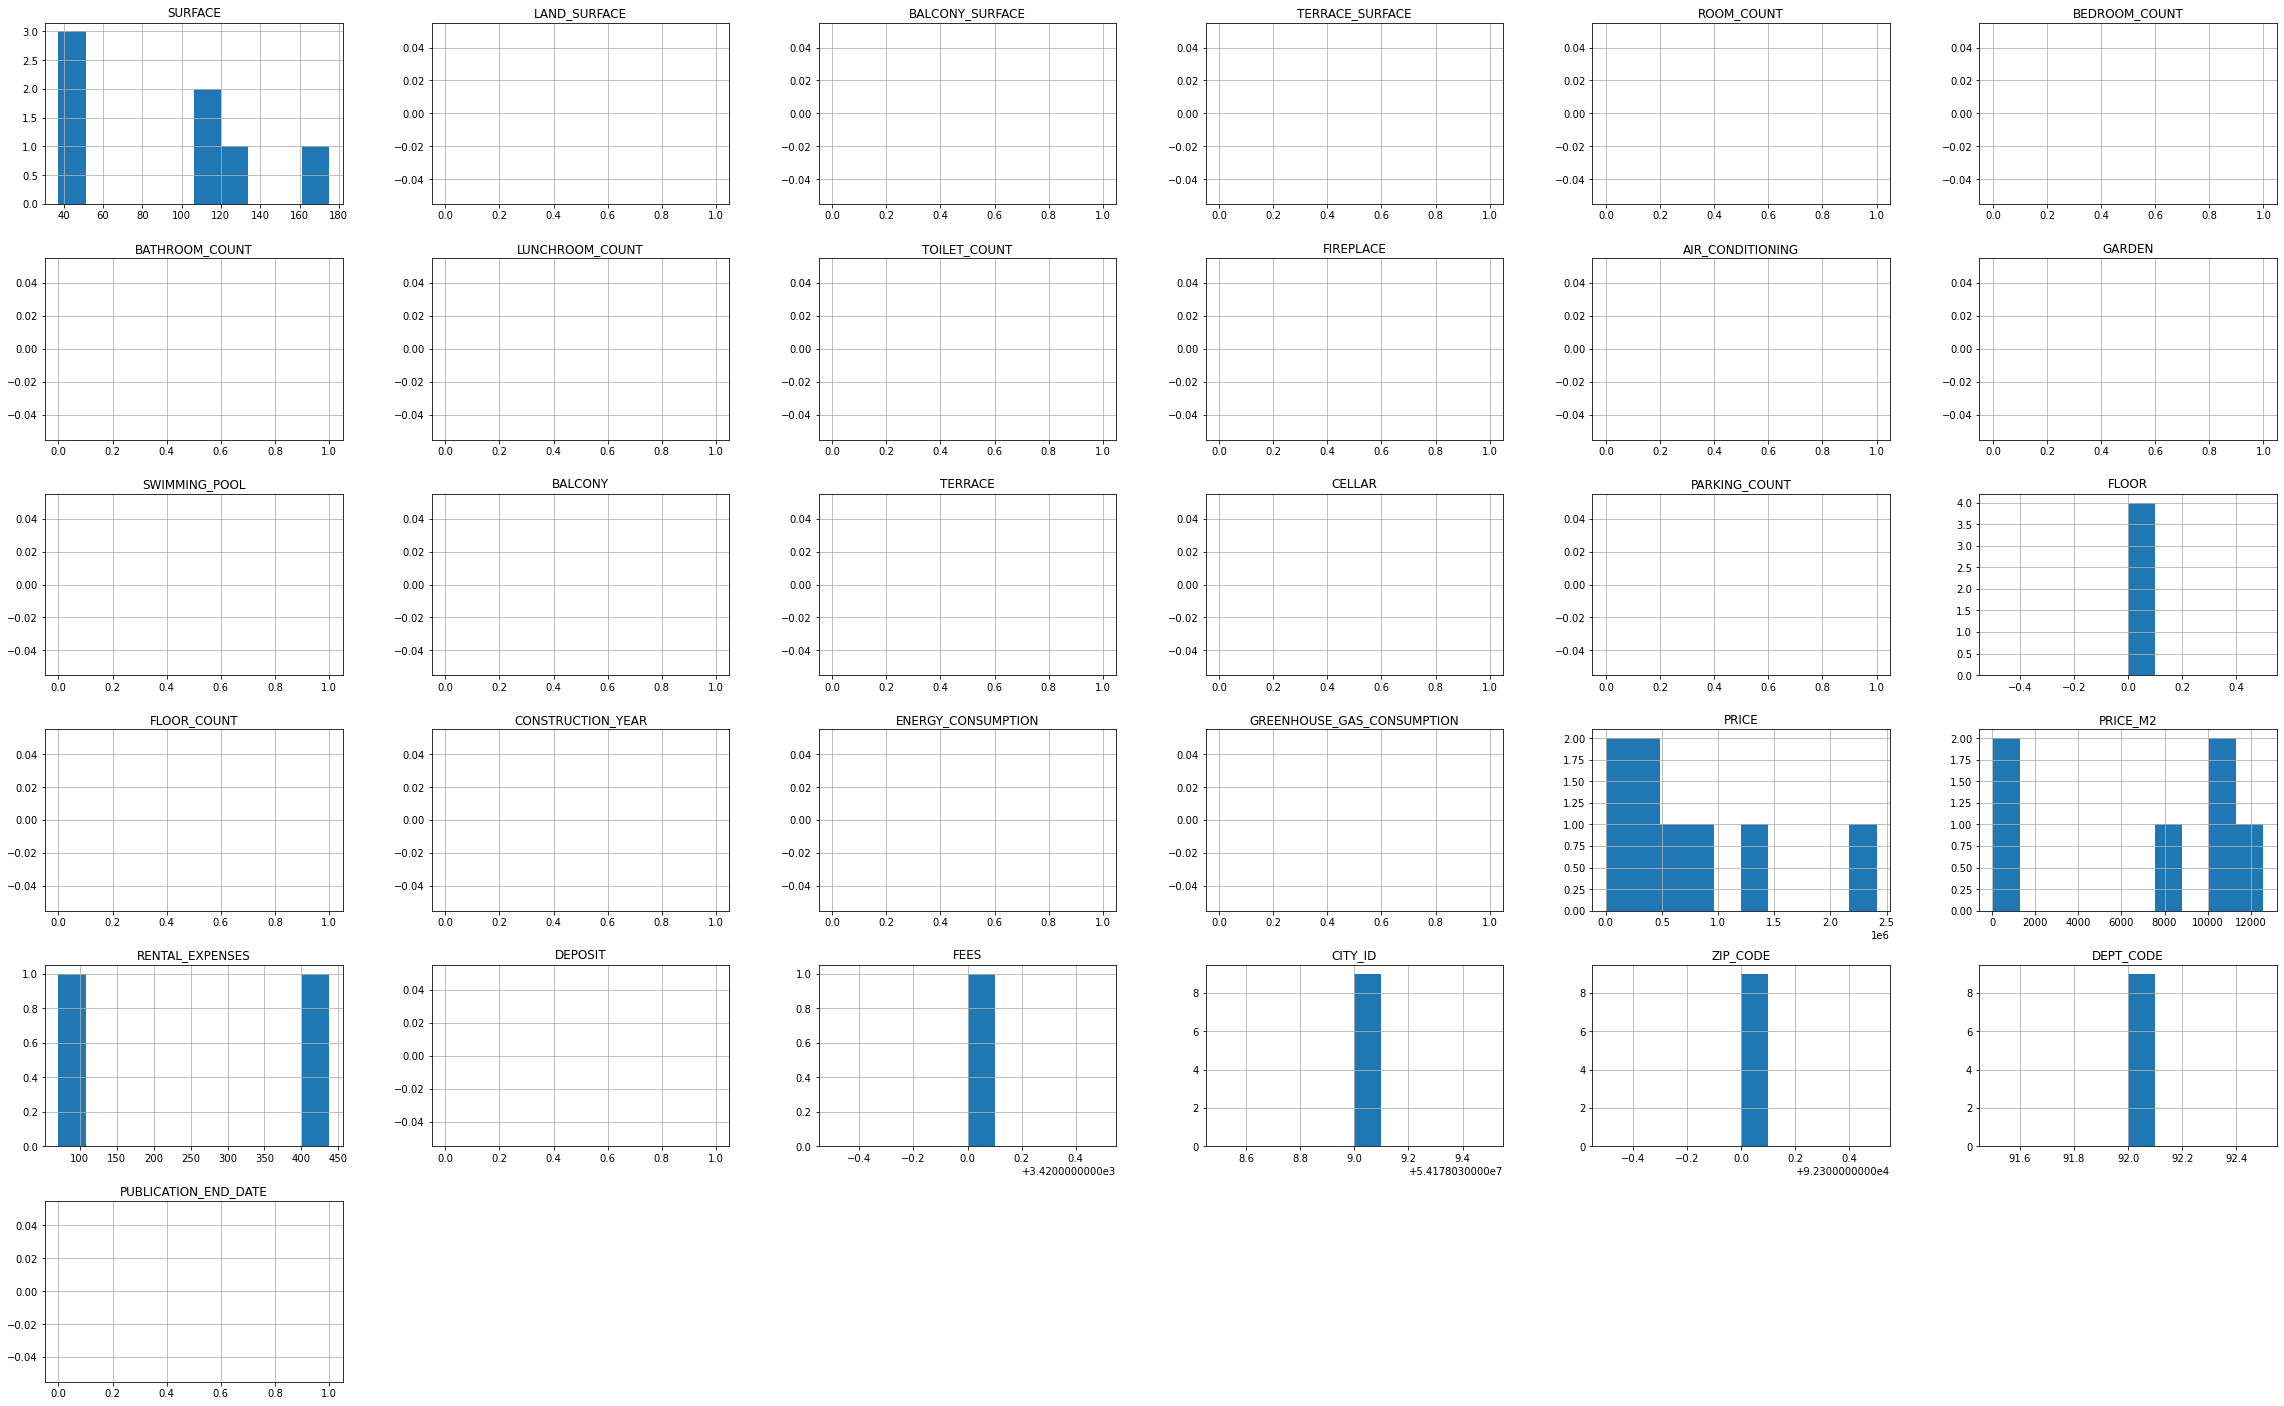

In [67]:
print('percentage of missing before dropping some columns:')
print(round(100*(gp_building.isnull().sum()/len(gp_building.index)),2)) #check percentage of NaN before droping columns where all elements are NaN
print('Visualistation before dropping some columns:')
gp_building.hist(figsize=(40,25)) #histogram visualisation before droping columns where all elements are NaN

In [68]:
gp_building=clean(gp_building)

percentage of missing after dropping some columns :
ID                           0.00
URL                          0.00
CRAWL_SOURCE                 0.00
PROPERTY_TYPE                0.00
NEW_BUILD                    0.00
DESCRIPTION                  0.00
IMAGES                       0.00
SURFACE                     22.22
PARKING                      0.00
HEATING_TYPES                0.00
FLOOR                       55.56
MARKETING_TYPE               0.00
PRICE                       11.11
PRICE_M2                    33.33
PRICE_EVENTS                 0.00
RENTAL_EXPENSES             77.78
RENTAL_EXPENSES_INCLUDED    66.67
FEES                        88.89
FEES_INCLUDED               77.78
EXCLUSIVE_MANDATE            0.00
OCCUPIED                    33.33
DEALER_NAME                  0.00
DEALER_TYPE                  0.00
CITY_ID                      0.00
CITY                         0.00
ZIP_CODE                     0.00
DEPT_CODE                    0.00
PUBLICATION_START_DATE       0

array([[<AxesSubplot:title={'center':'SURFACE'}>,
        <AxesSubplot:title={'center':'FLOOR'}>,
        <AxesSubplot:title={'center':'PRICE'}>],
       [<AxesSubplot:title={'center':'PRICE_M2'}>,
        <AxesSubplot:title={'center':'RENTAL_EXPENSES'}>,
        <AxesSubplot:title={'center':'FEES'}>],
       [<AxesSubplot:title={'center':'CITY_ID'}>,
        <AxesSubplot:title={'center':'ZIP_CODE'}>,
        <AxesSubplot:title={'center':'DEPT_CODE'}>]], dtype=object)

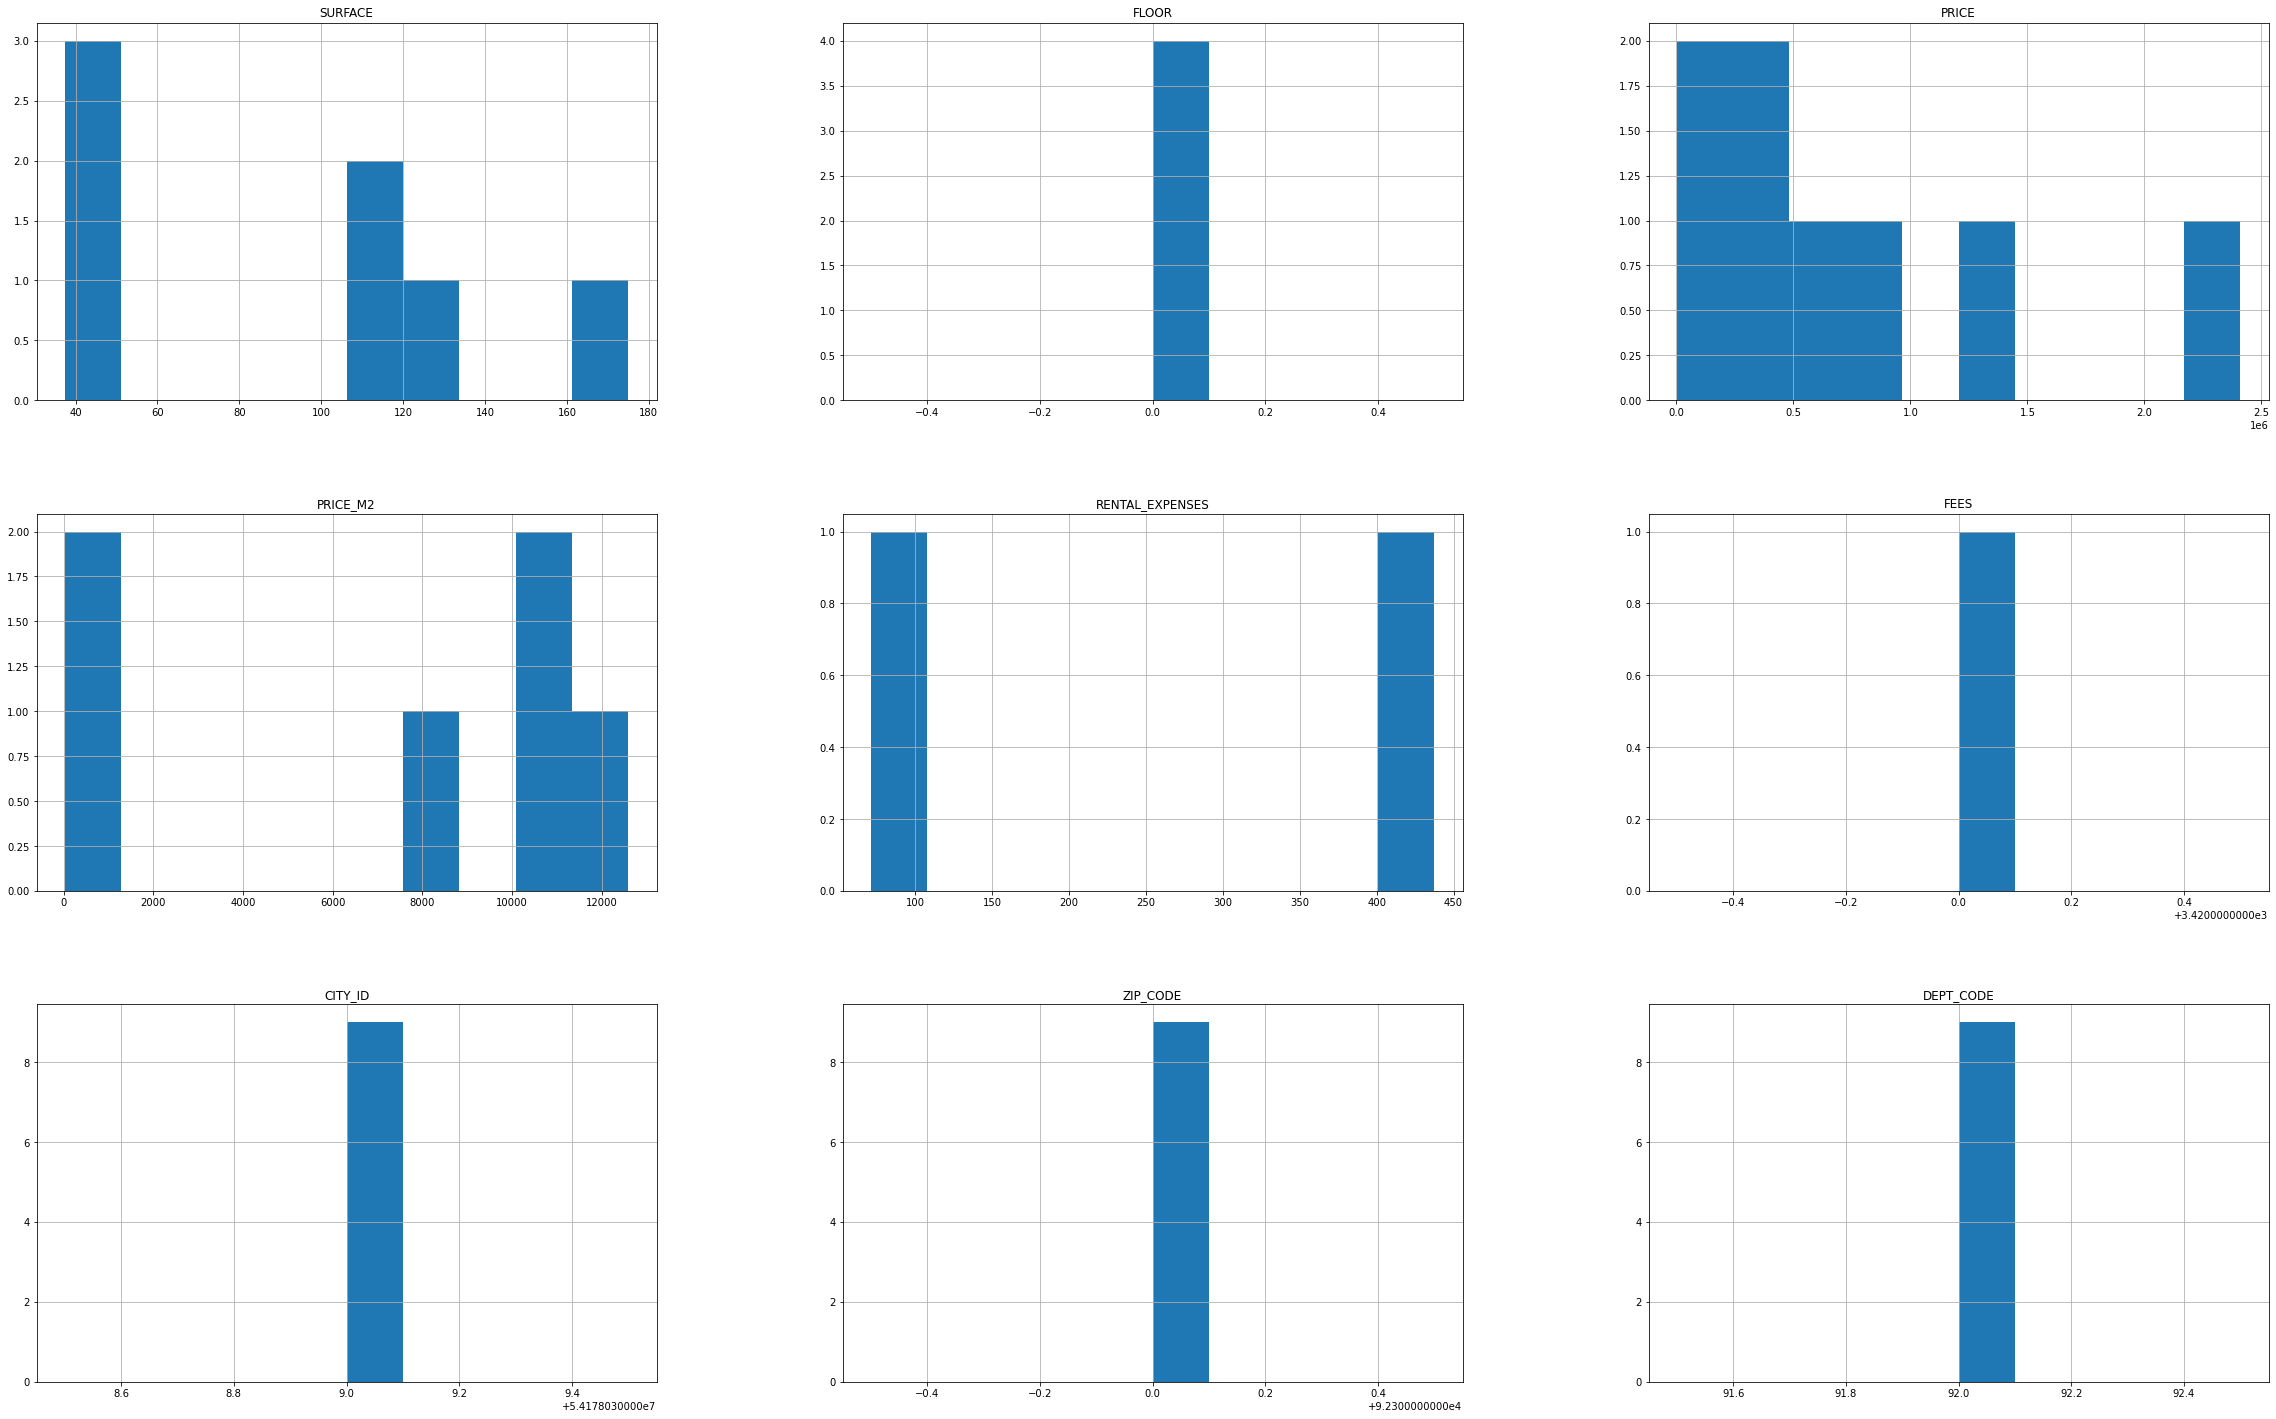

In [69]:
print('percentage of missing after dropping some columns :')
print(round(100*(gp_building.isnull().sum()/len(gp_building.index)),2)) #check percentage of NaN after droping columns where all elements are NaN
print('Visualistation after dropping some columns:')
gp_building.hist(figsize=(40,25)) #histogram visualisation after droping columns where all elements are NaN

3.HOUSE data cleaning: Calling cleaning function, percentages of missing and visualisation. WE notice (on the statistics and the histogrammes) that varables with 100% missings before the data cleaning have disapeared after the data cleaning.

percentage of missing before dropping some columns :
ID                              0.00
URL                             0.00
CRAWL_SOURCE                    0.00
PROPERTY_TYPE                   0.00
NEW_BUILD                       0.00
DESCRIPTION                     0.00
IMAGES                          0.00
SURFACE                         9.62
LAND_SURFACE                   94.23
BALCONY_SURFACE               100.00
TERRACE_SURFACE               100.00
ROOM_COUNT                      9.62
BEDROOM_COUNT                  51.92
BATHROOM_COUNT                100.00
LUNCHROOM_COUNT               100.00
TOILET_COUNT                  100.00
FURNISHED                      82.69
FIREPLACE                     100.00
AIR_CONDITIONING              100.00
GARDEN                         98.08
SWIMMING_POOL                  94.23
BALCONY                       100.00
TERRACE                        67.31
CELLAR                        100.00
PARKING                         0.00
PARKING_COUNT         

array([[<AxesSubplot:title={'center':'SURFACE'}>,
        <AxesSubplot:title={'center':'LAND_SURFACE'}>,
        <AxesSubplot:title={'center':'BALCONY_SURFACE'}>,
        <AxesSubplot:title={'center':'TERRACE_SURFACE'}>,
        <AxesSubplot:title={'center':'ROOM_COUNT'}>,
        <AxesSubplot:title={'center':'BEDROOM_COUNT'}>],
       [<AxesSubplot:title={'center':'BATHROOM_COUNT'}>,
        <AxesSubplot:title={'center':'LUNCHROOM_COUNT'}>,
        <AxesSubplot:title={'center':'TOILET_COUNT'}>,
        <AxesSubplot:title={'center':'FIREPLACE'}>,
        <AxesSubplot:title={'center':'AIR_CONDITIONING'}>,
        <AxesSubplot:title={'center':'GARDEN'}>],
       [<AxesSubplot:title={'center':'SWIMMING_POOL'}>,
        <AxesSubplot:title={'center':'BALCONY'}>,
        <AxesSubplot:title={'center':'TERRACE'}>,
        <AxesSubplot:title={'center':'CELLAR'}>,
        <AxesSubplot:title={'center':'PARKING_COUNT'}>,
        <AxesSubplot:title={'center':'FLOOR'}>],
       [<AxesSubplot:title={

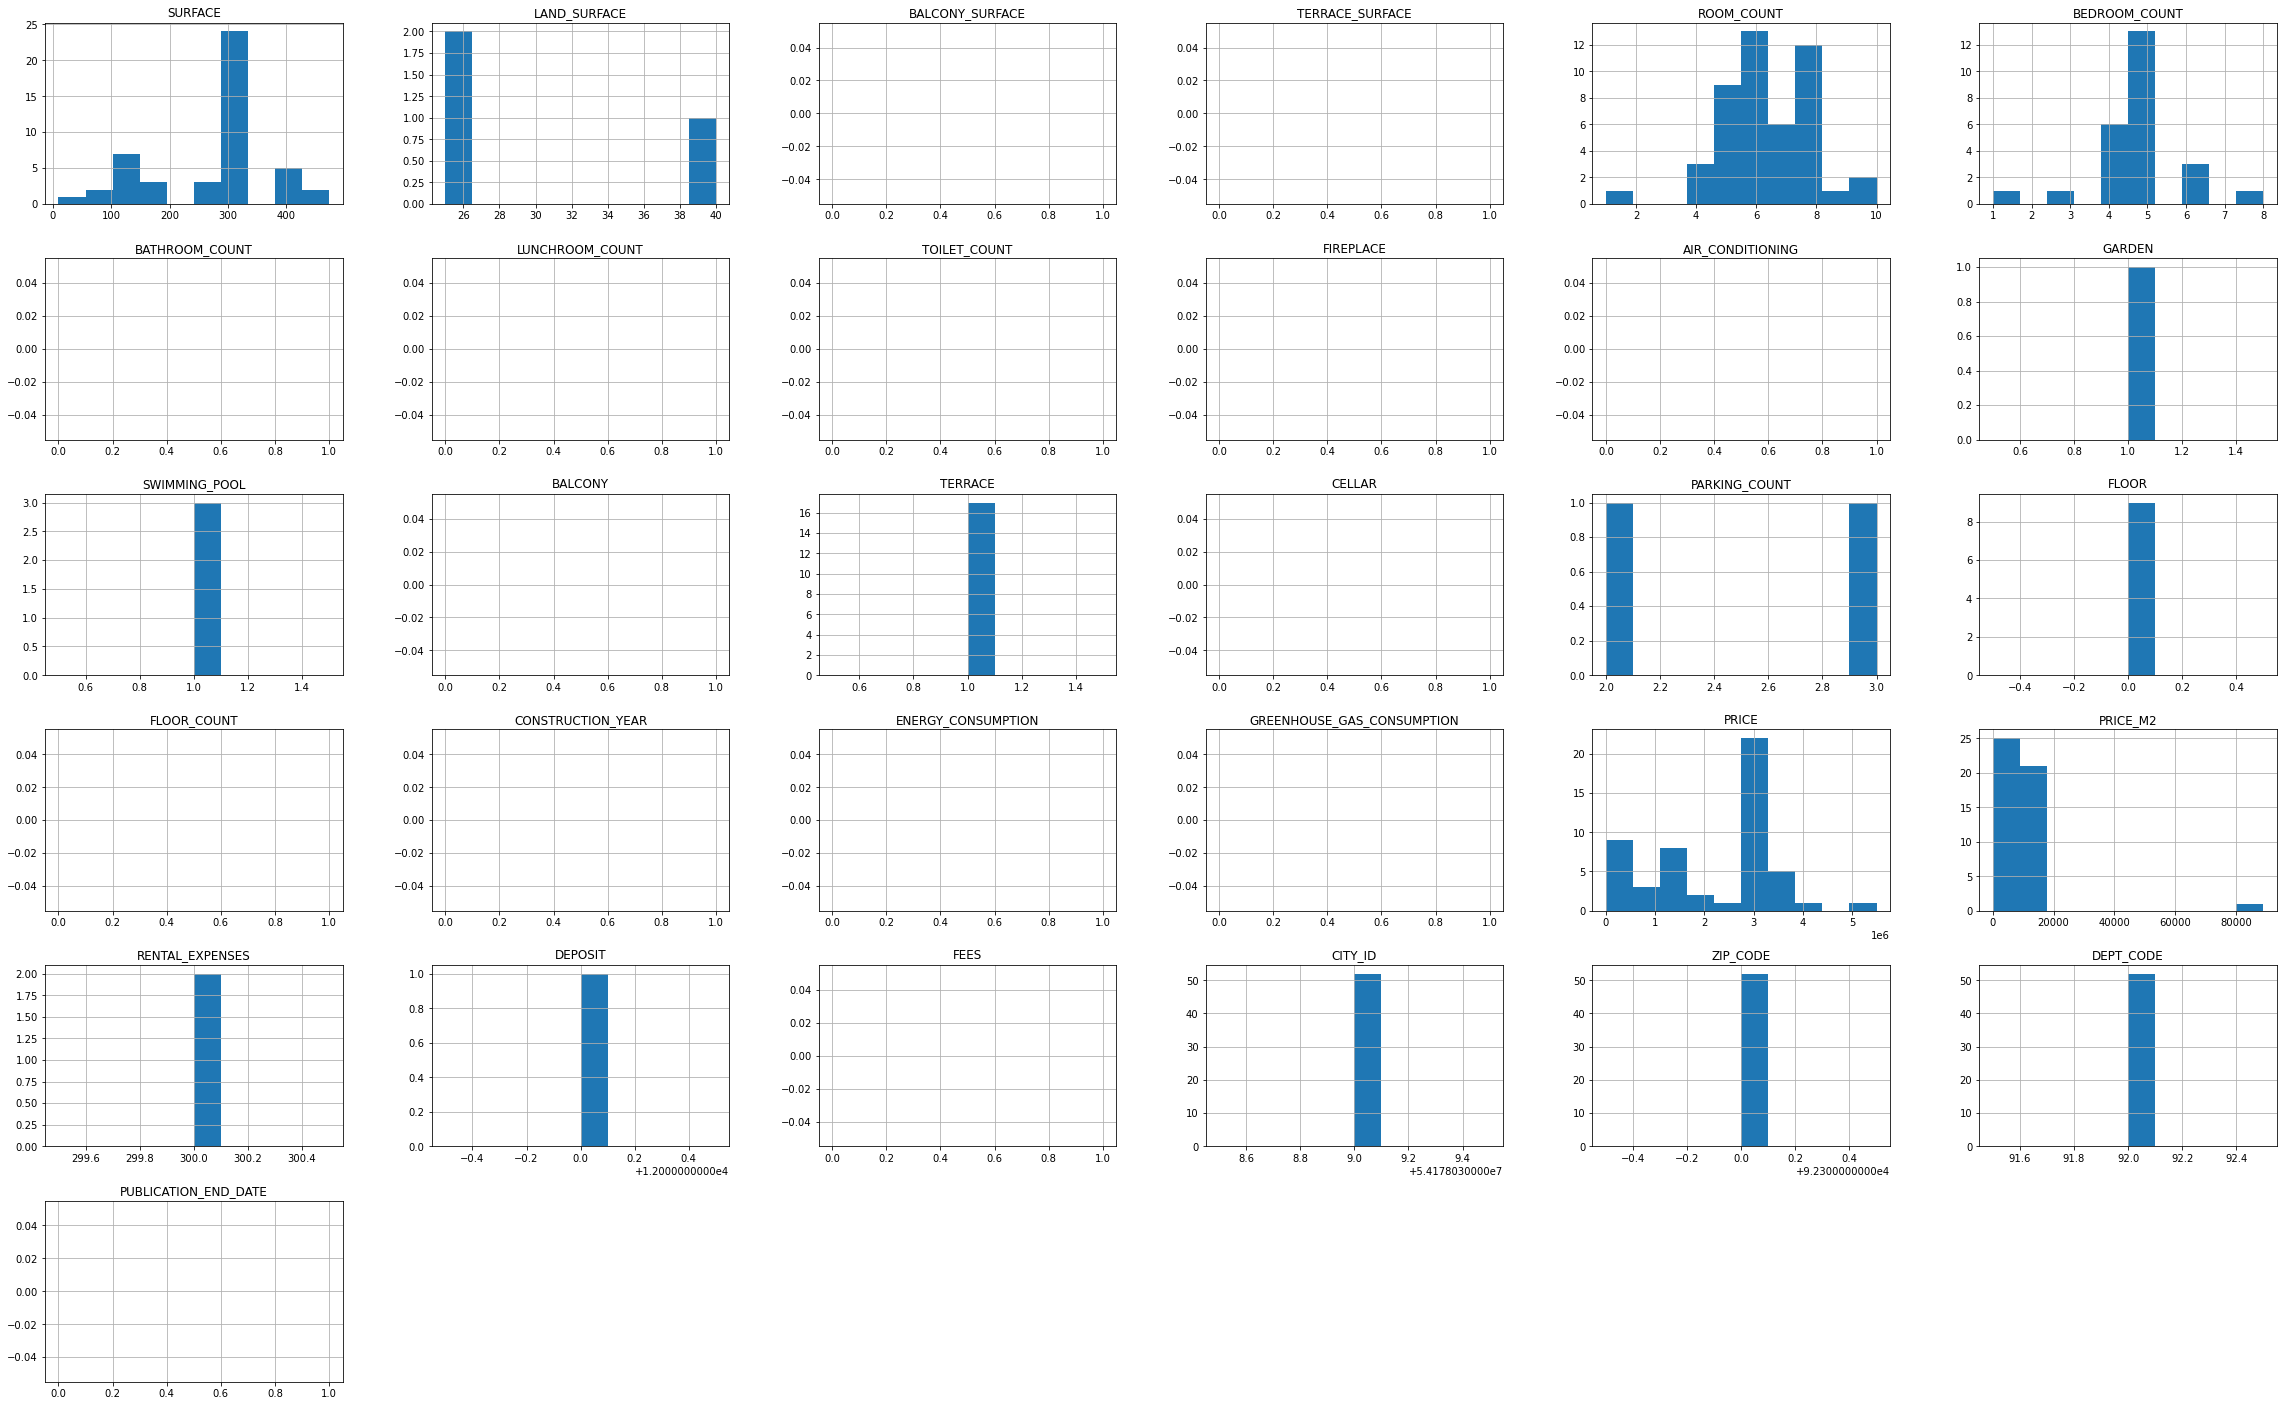

In [70]:
print('percentage of missing before dropping some columns :')
print(round(100*(gp_house.isnull().sum()/len(gp_house.index)),2)) #check percentage of NaN before droping columns where all elements are NaN
print('Visualistation before dropping some columns :')
gp_house.hist(figsize=(40,25)) #histogram visualisation before droping columns where all elements are NaN

In [71]:
gp_house=clean(gp_house)

percentage of missing after dropping some columns:
ID                           0.00
URL                          0.00
CRAWL_SOURCE                 0.00
PROPERTY_TYPE                0.00
NEW_BUILD                    0.00
DESCRIPTION                  0.00
IMAGES                       0.00
SURFACE                      9.62
LAND_SURFACE                94.23
ROOM_COUNT                   9.62
BEDROOM_COUNT               51.92
FURNISHED                   82.69
GARDEN                      98.08
SWIMMING_POOL               94.23
TERRACE                     67.31
PARKING                      0.00
PARKING_COUNT               96.15
HEATING_TYPES                0.00
HEATING_MODE                71.15
FLOOR                       82.69
MARKETING_TYPE               0.00
PRICE                        0.00
PRICE_M2                     9.62
PRICE_EVENTS                 0.00
RENTAL_EXPENSES             96.15
RENTAL_EXPENSES_INCLUDED    86.54
DEPOSIT                     98.08
FEES_INCLUDED               73.

array([[<AxesSubplot:title={'center':'SURFACE'}>,
        <AxesSubplot:title={'center':'LAND_SURFACE'}>,
        <AxesSubplot:title={'center':'ROOM_COUNT'}>,
        <AxesSubplot:title={'center':'BEDROOM_COUNT'}>],
       [<AxesSubplot:title={'center':'GARDEN'}>,
        <AxesSubplot:title={'center':'SWIMMING_POOL'}>,
        <AxesSubplot:title={'center':'TERRACE'}>,
        <AxesSubplot:title={'center':'PARKING_COUNT'}>],
       [<AxesSubplot:title={'center':'FLOOR'}>,
        <AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'PRICE_M2'}>,
        <AxesSubplot:title={'center':'RENTAL_EXPENSES'}>],
       [<AxesSubplot:title={'center':'DEPOSIT'}>,
        <AxesSubplot:title={'center':'CITY_ID'}>,
        <AxesSubplot:title={'center':'ZIP_CODE'}>,
        <AxesSubplot:title={'center':'DEPT_CODE'}>]], dtype=object)

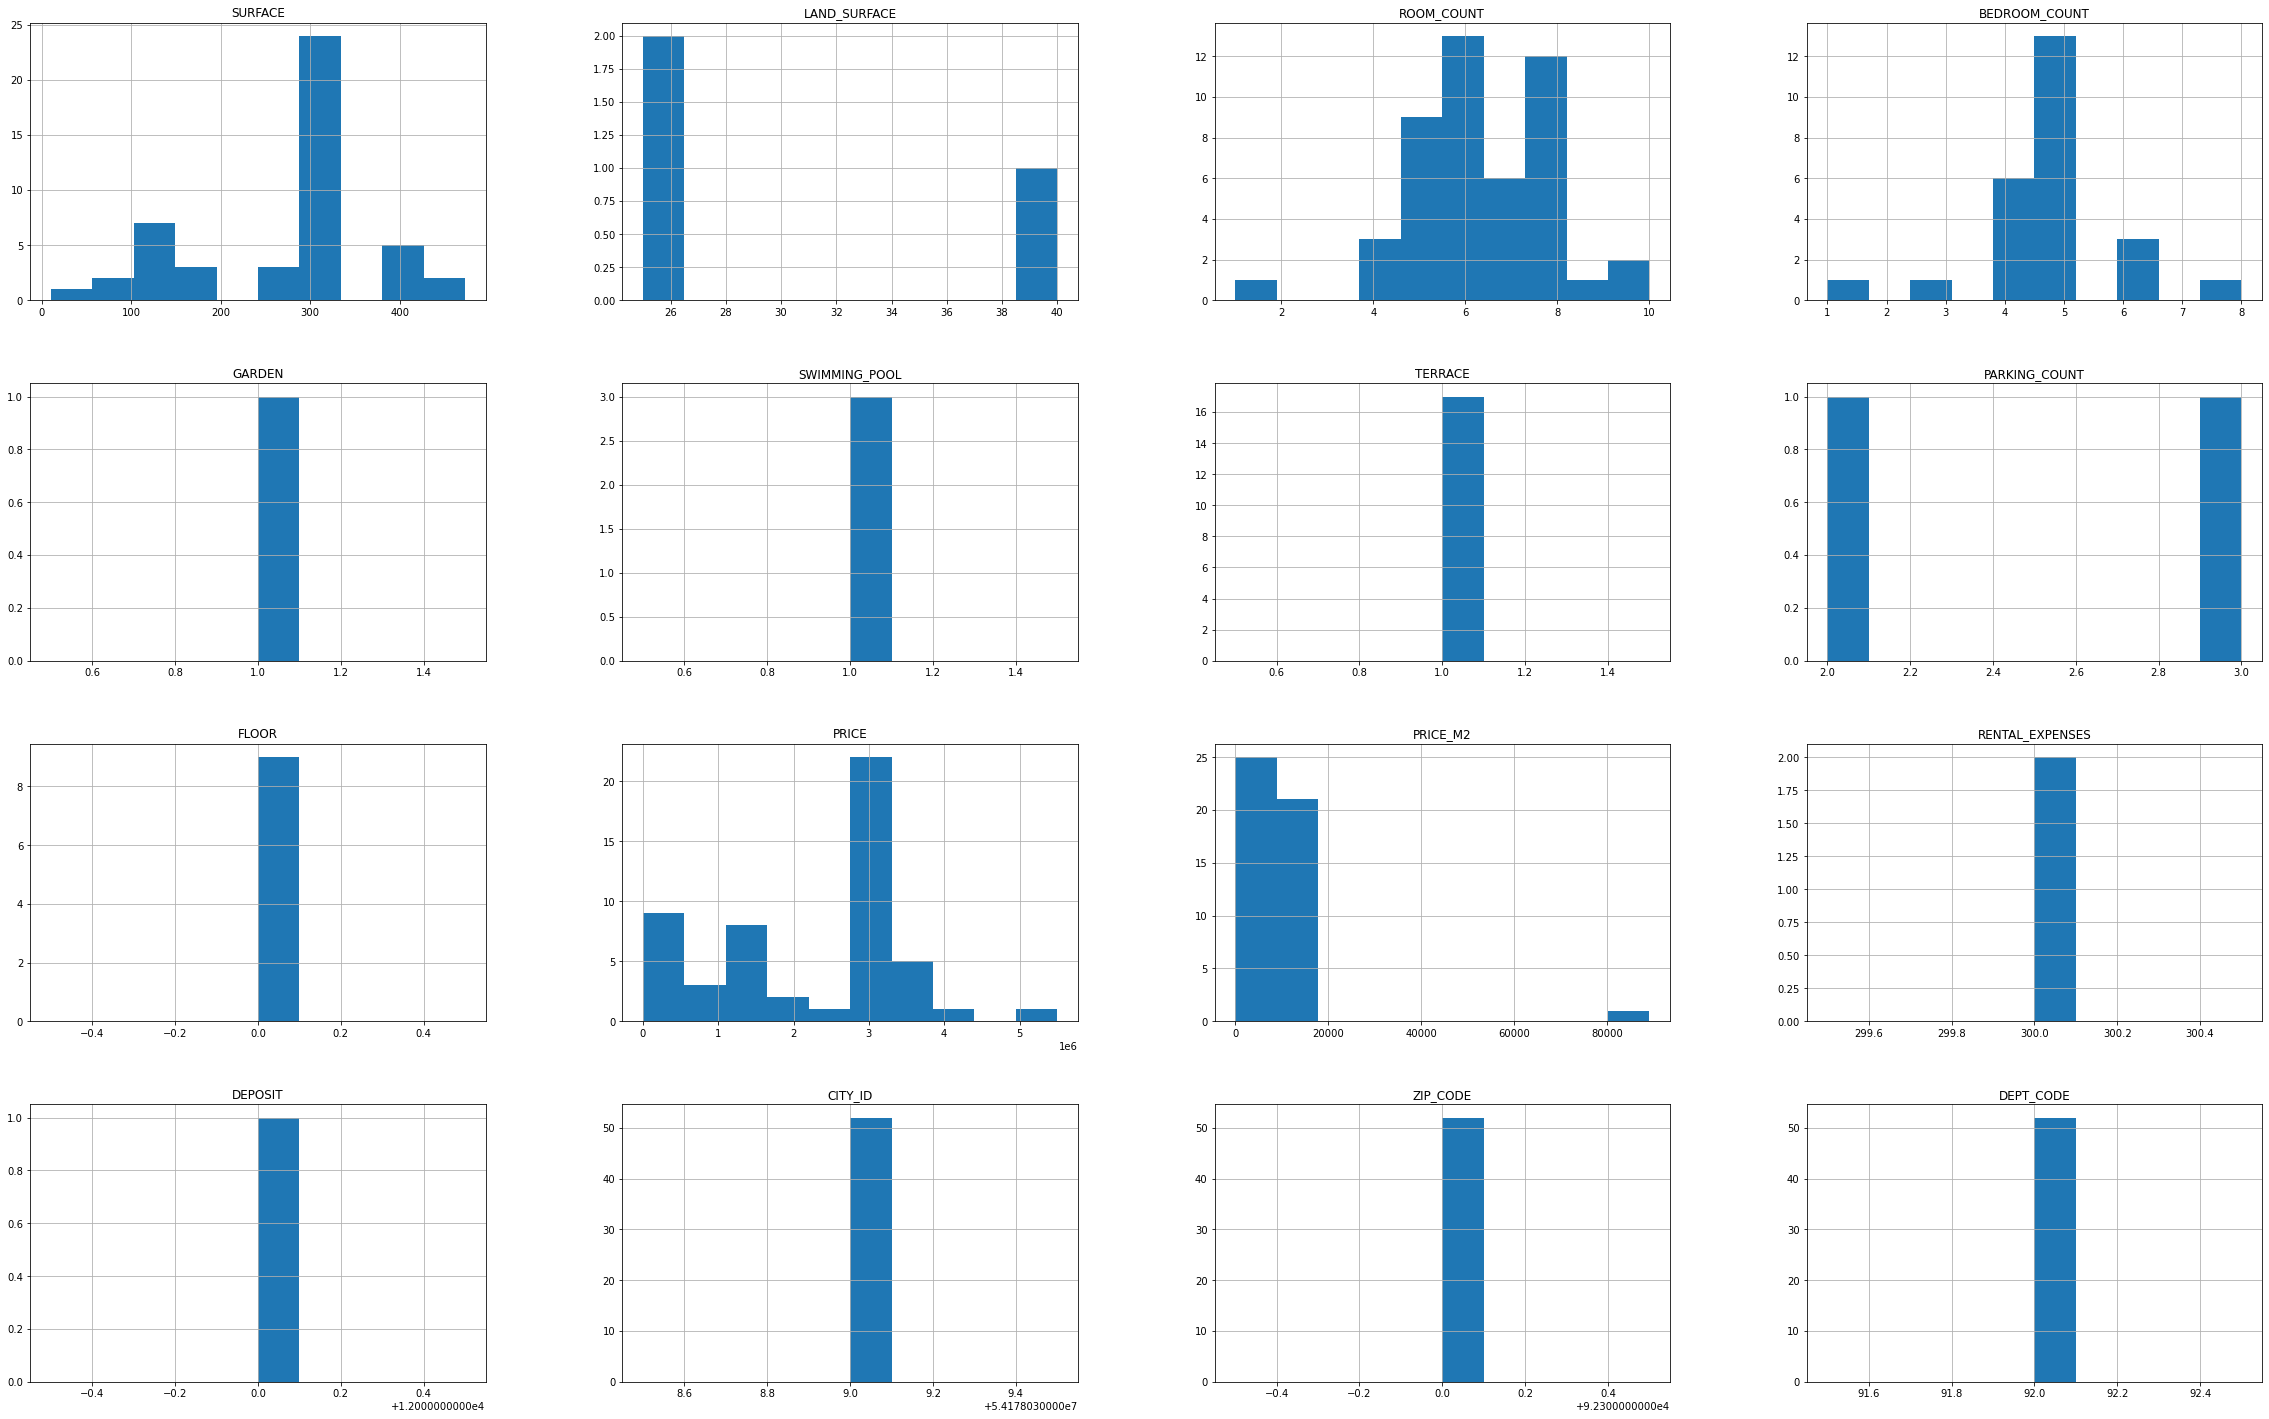

In [72]:
print('percentage of missing after dropping some columns:')
print(round(100*(gp_house.isnull().sum()/len(gp_house.index)),2)) #check percentage of NaN after droping columns where all elements are NaN
print('Visualistation after dropping some columns:')
gp_house.hist(figsize=(40,25)) #histogram visualisation after droping columns where all elements are NaN

4.PARKING data cleaning: Calling cleaning function, percentages of missing and visualisation. We notice (on the statistics and the histogrammes) that varables with 100% missings before the data cleaning have disapeared after the data cleaning.

percentage of missing before dropping some columns
ID                              0.00
URL                             0.00
CRAWL_SOURCE                    0.00
PROPERTY_TYPE                   0.00
NEW_BUILD                     100.00
DESCRIPTION                     0.00
IMAGES                          0.00
SURFACE                        41.49
LAND_SURFACE                  100.00
BALCONY_SURFACE               100.00
TERRACE_SURFACE               100.00
ROOM_COUNT                    100.00
BEDROOM_COUNT                 100.00
BATHROOM_COUNT                100.00
LUNCHROOM_COUNT               100.00
TOILET_COUNT                  100.00
FURNISHED                     100.00
FIREPLACE                     100.00
AIR_CONDITIONING              100.00
GARDEN                        100.00
SWIMMING_POOL                 100.00
BALCONY                       100.00
TERRACE                       100.00
CELLAR                        100.00
PARKING                         0.00
PARKING_COUNT           

array([[<AxesSubplot:title={'center':'SURFACE'}>,
        <AxesSubplot:title={'center':'LAND_SURFACE'}>,
        <AxesSubplot:title={'center':'BALCONY_SURFACE'}>,
        <AxesSubplot:title={'center':'TERRACE_SURFACE'}>,
        <AxesSubplot:title={'center':'ROOM_COUNT'}>,
        <AxesSubplot:title={'center':'BEDROOM_COUNT'}>],
       [<AxesSubplot:title={'center':'BATHROOM_COUNT'}>,
        <AxesSubplot:title={'center':'LUNCHROOM_COUNT'}>,
        <AxesSubplot:title={'center':'TOILET_COUNT'}>,
        <AxesSubplot:title={'center':'FIREPLACE'}>,
        <AxesSubplot:title={'center':'AIR_CONDITIONING'}>,
        <AxesSubplot:title={'center':'GARDEN'}>],
       [<AxesSubplot:title={'center':'SWIMMING_POOL'}>,
        <AxesSubplot:title={'center':'BALCONY'}>,
        <AxesSubplot:title={'center':'TERRACE'}>,
        <AxesSubplot:title={'center':'CELLAR'}>,
        <AxesSubplot:title={'center':'PARKING_COUNT'}>,
        <AxesSubplot:title={'center':'FLOOR'}>],
       [<AxesSubplot:title={

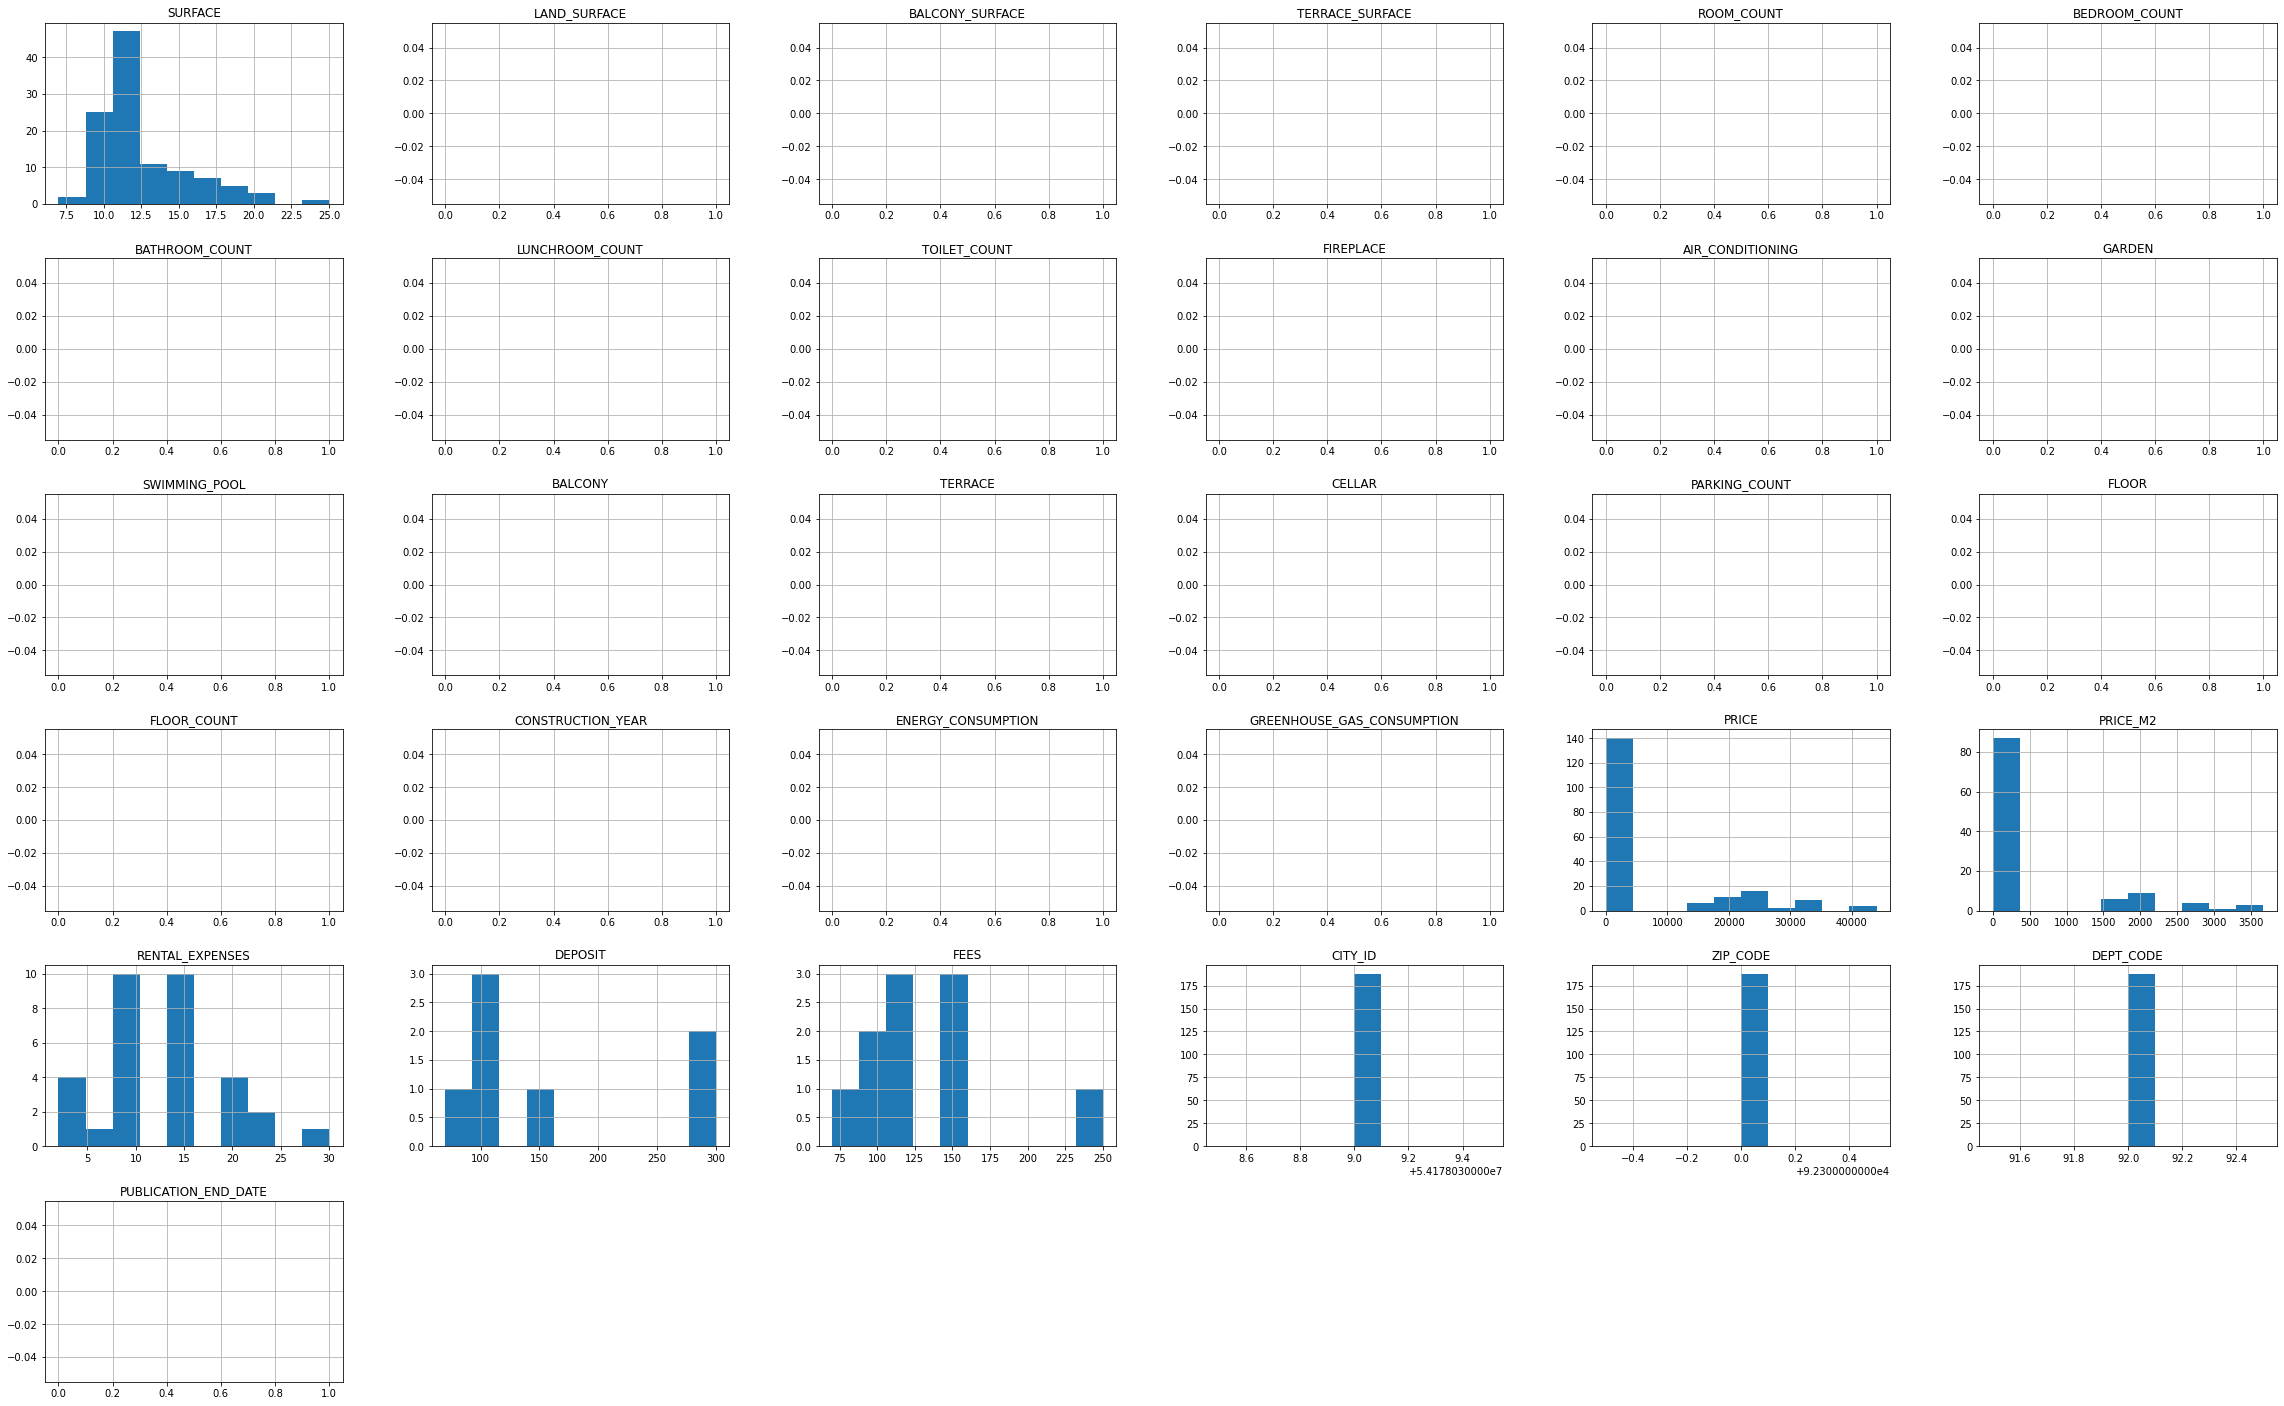

In [73]:
print('percentage of missing before dropping some columns')
print(round(100*(gp_parking.isnull().sum()/len(gp_parking.index)),2)) #check percentage of NaN before droping columns where all elements are NaN
print('Visualistation before dropping some columns')
gp_parking.hist(figsize=(40,25)) #histogram visualisation before droping columns where all elements are NaN

In [74]:
gp_parking=clean(gp_parking)

percentage of missing after dropping some columns
ID                           0.00
URL                          0.00
CRAWL_SOURCE                 0.00
PROPERTY_TYPE                0.00
DESCRIPTION                  0.00
IMAGES                       0.00
SURFACE                     41.49
PARKING                      0.00
HEATING_TYPES                0.00
MARKETING_TYPE               0.00
PRICE                        0.00
PRICE_M2                    41.49
PRICE_EVENTS                 0.00
RENTAL_EXPENSES             82.98
RENTAL_EXPENSES_INCLUDED    33.51
DEPOSIT                     96.28
FEES                        94.68
FEES_INCLUDED               90.43
EXCLUSIVE_MANDATE            0.00
AGENCIES_UNWANTED           71.81
OCCUPIED                    74.47
DEALER_NAME                  2.13
DEALER_TYPE                  0.00
CITY_ID                      0.00
CITY                         0.00
ZIP_CODE                     0.00
DEPT_CODE                    0.00
PUBLICATION_START_DATE       0.0

array([[<AxesSubplot:title={'center':'SURFACE'}>,
        <AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'PRICE_M2'}>],
       [<AxesSubplot:title={'center':'RENTAL_EXPENSES'}>,
        <AxesSubplot:title={'center':'DEPOSIT'}>,
        <AxesSubplot:title={'center':'FEES'}>],
       [<AxesSubplot:title={'center':'CITY_ID'}>,
        <AxesSubplot:title={'center':'ZIP_CODE'}>,
        <AxesSubplot:title={'center':'DEPT_CODE'}>]], dtype=object)

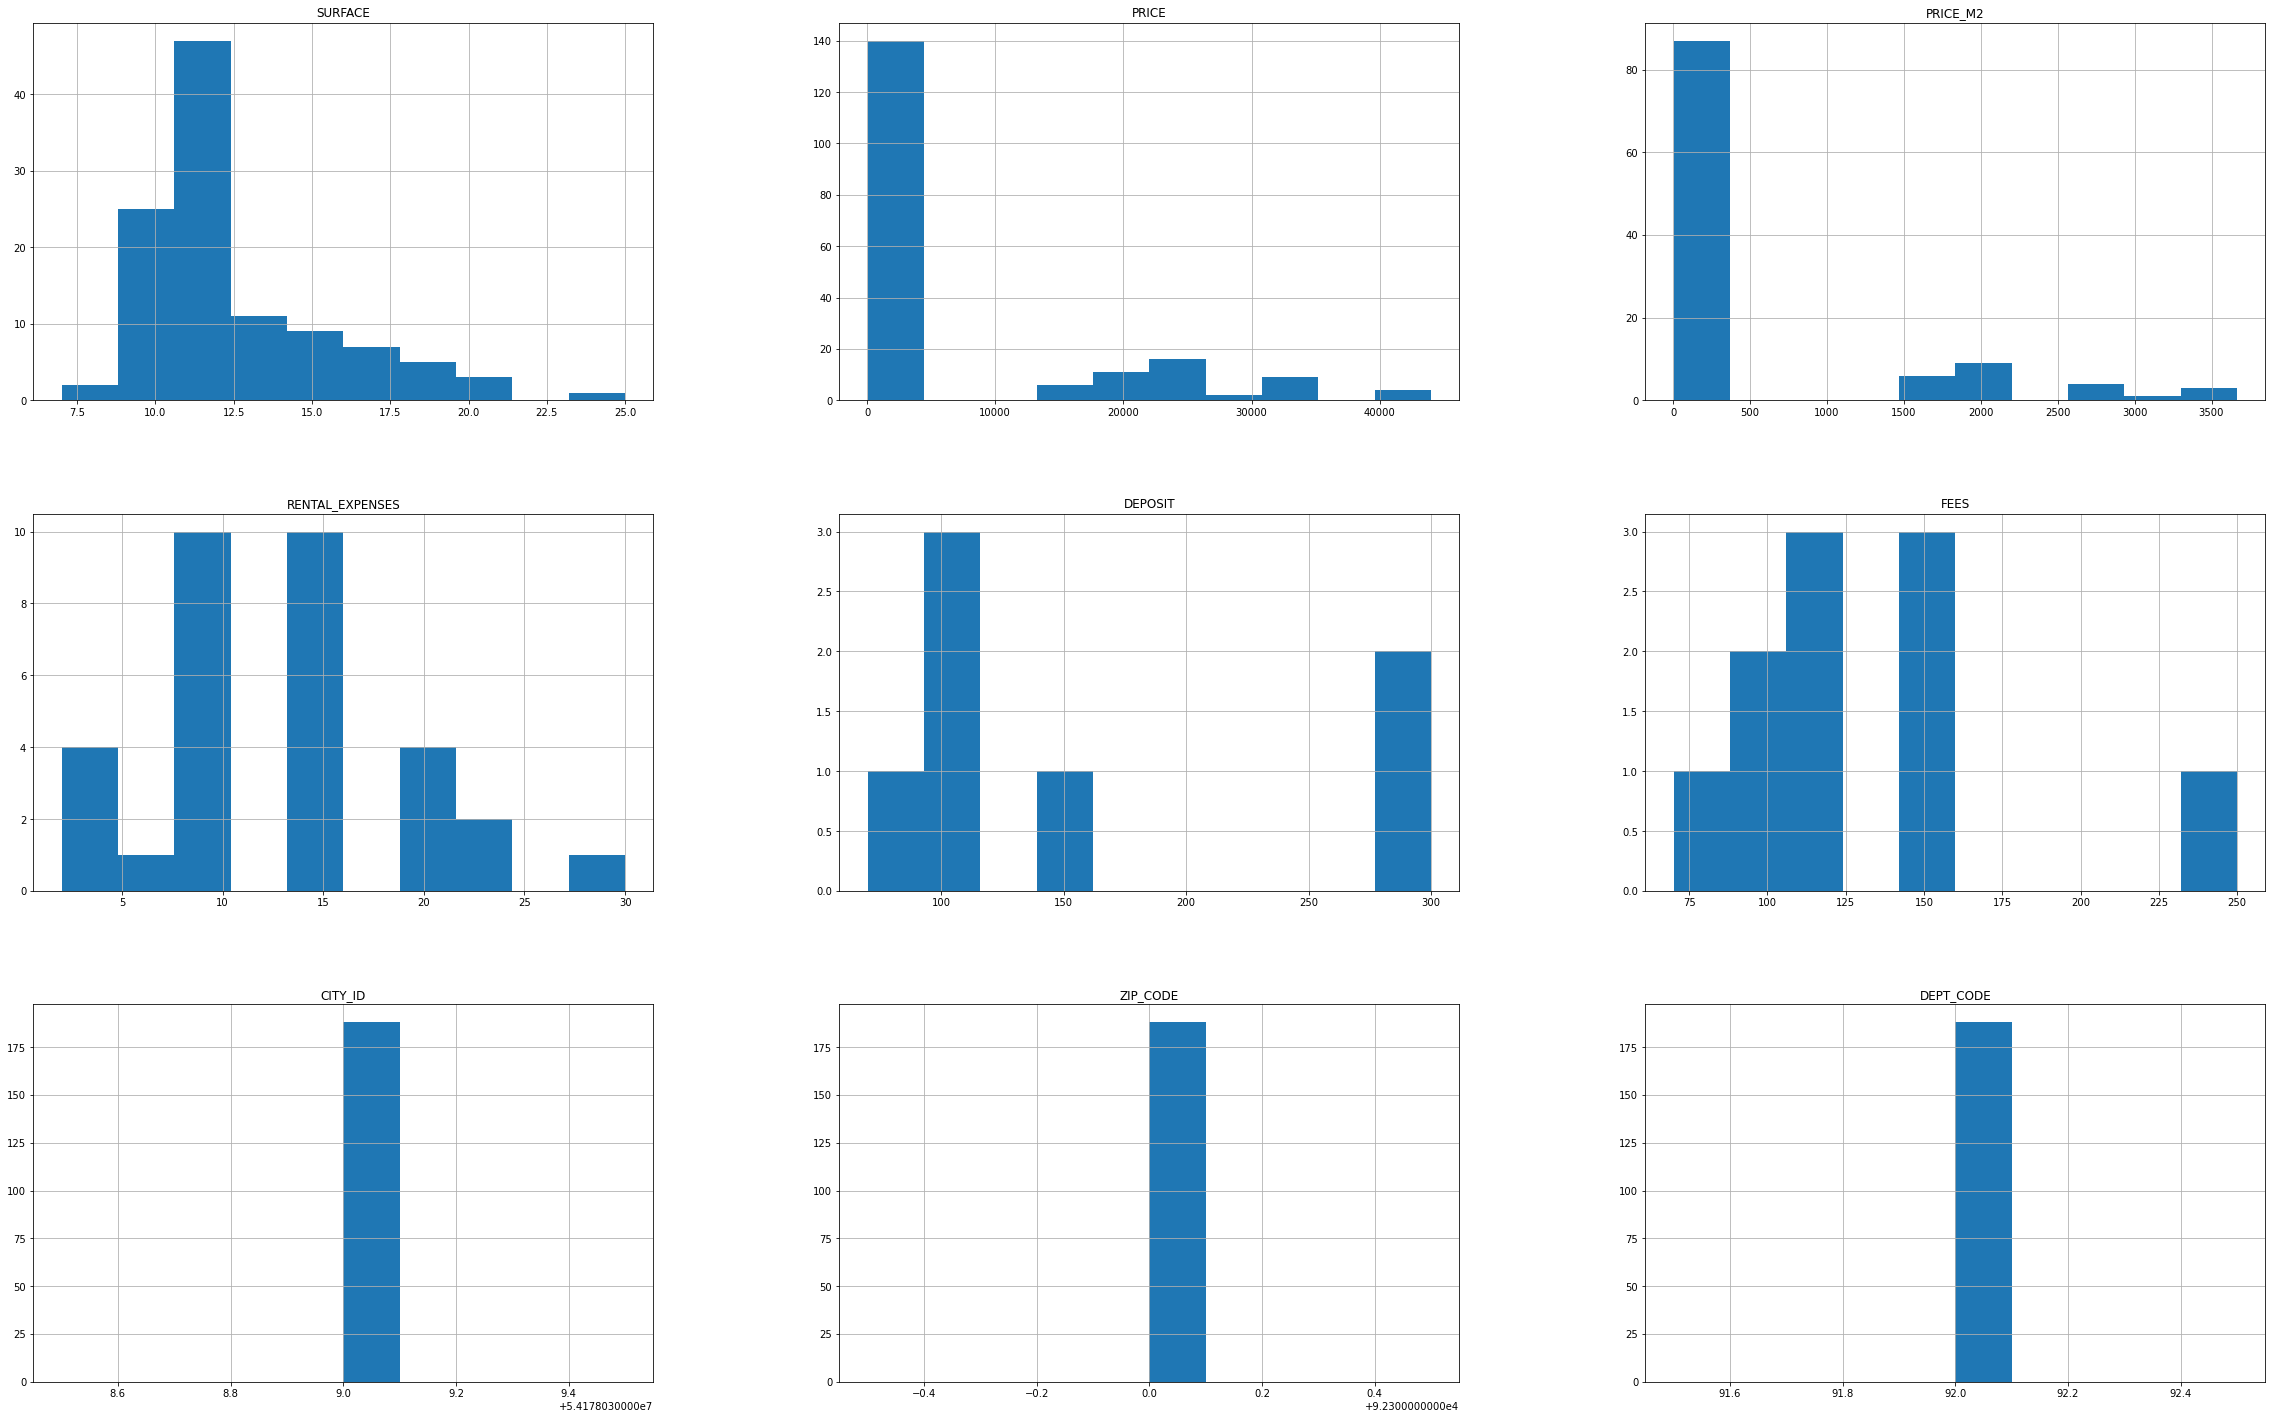

In [75]:
print('percentage of missing after dropping some columns')
print(round(100*(gp_parking.isnull().sum()/len(gp_parking.index)),2)) #check percentage of NaN after droping columns where all elements are NaN
print('Visualistation after dropping some columns:')
gp_parking.hist(figsize=(40,25)) #histogram visualisation after droping columns where all elements are NaN

5.PREMISES data cleaning: Calling cleaning function, percentages of missing and visualisation.We notice (on the statistics and the histogrammes) that varables with 100% missings before the data cleaning have disapeared after the data cleaning.

percentage of missing before dropping some columns
ID                              0.00
URL                             0.00
CRAWL_SOURCE                    0.00
PROPERTY_TYPE                   0.00
NEW_BUILD                       0.00
DESCRIPTION                     0.00
IMAGES                          0.00
SURFACE                         1.88
LAND_SURFACE                  100.00
BALCONY_SURFACE               100.00
TERRACE_SURFACE               100.00
ROOM_COUNT                     23.59
BEDROOM_COUNT                  99.16
BATHROOM_COUNT                100.00
LUNCHROOM_COUNT               100.00
TOILET_COUNT                  100.00
FURNISHED                     100.00
FIREPLACE                     100.00
AIR_CONDITIONING              100.00
GARDEN                        100.00
SWIMMING_POOL                 100.00
BALCONY                       100.00
TERRACE                        99.79
CELLAR                        100.00
PARKING                         0.00
PARKING_COUNT           

array([[<AxesSubplot:title={'center':'SURFACE'}>,
        <AxesSubplot:title={'center':'LAND_SURFACE'}>,
        <AxesSubplot:title={'center':'BALCONY_SURFACE'}>,
        <AxesSubplot:title={'center':'TERRACE_SURFACE'}>,
        <AxesSubplot:title={'center':'ROOM_COUNT'}>,
        <AxesSubplot:title={'center':'BEDROOM_COUNT'}>],
       [<AxesSubplot:title={'center':'BATHROOM_COUNT'}>,
        <AxesSubplot:title={'center':'LUNCHROOM_COUNT'}>,
        <AxesSubplot:title={'center':'TOILET_COUNT'}>,
        <AxesSubplot:title={'center':'FIREPLACE'}>,
        <AxesSubplot:title={'center':'AIR_CONDITIONING'}>,
        <AxesSubplot:title={'center':'GARDEN'}>],
       [<AxesSubplot:title={'center':'SWIMMING_POOL'}>,
        <AxesSubplot:title={'center':'BALCONY'}>,
        <AxesSubplot:title={'center':'TERRACE'}>,
        <AxesSubplot:title={'center':'CELLAR'}>,
        <AxesSubplot:title={'center':'PARKING_COUNT'}>,
        <AxesSubplot:title={'center':'FLOOR'}>],
       [<AxesSubplot:title={

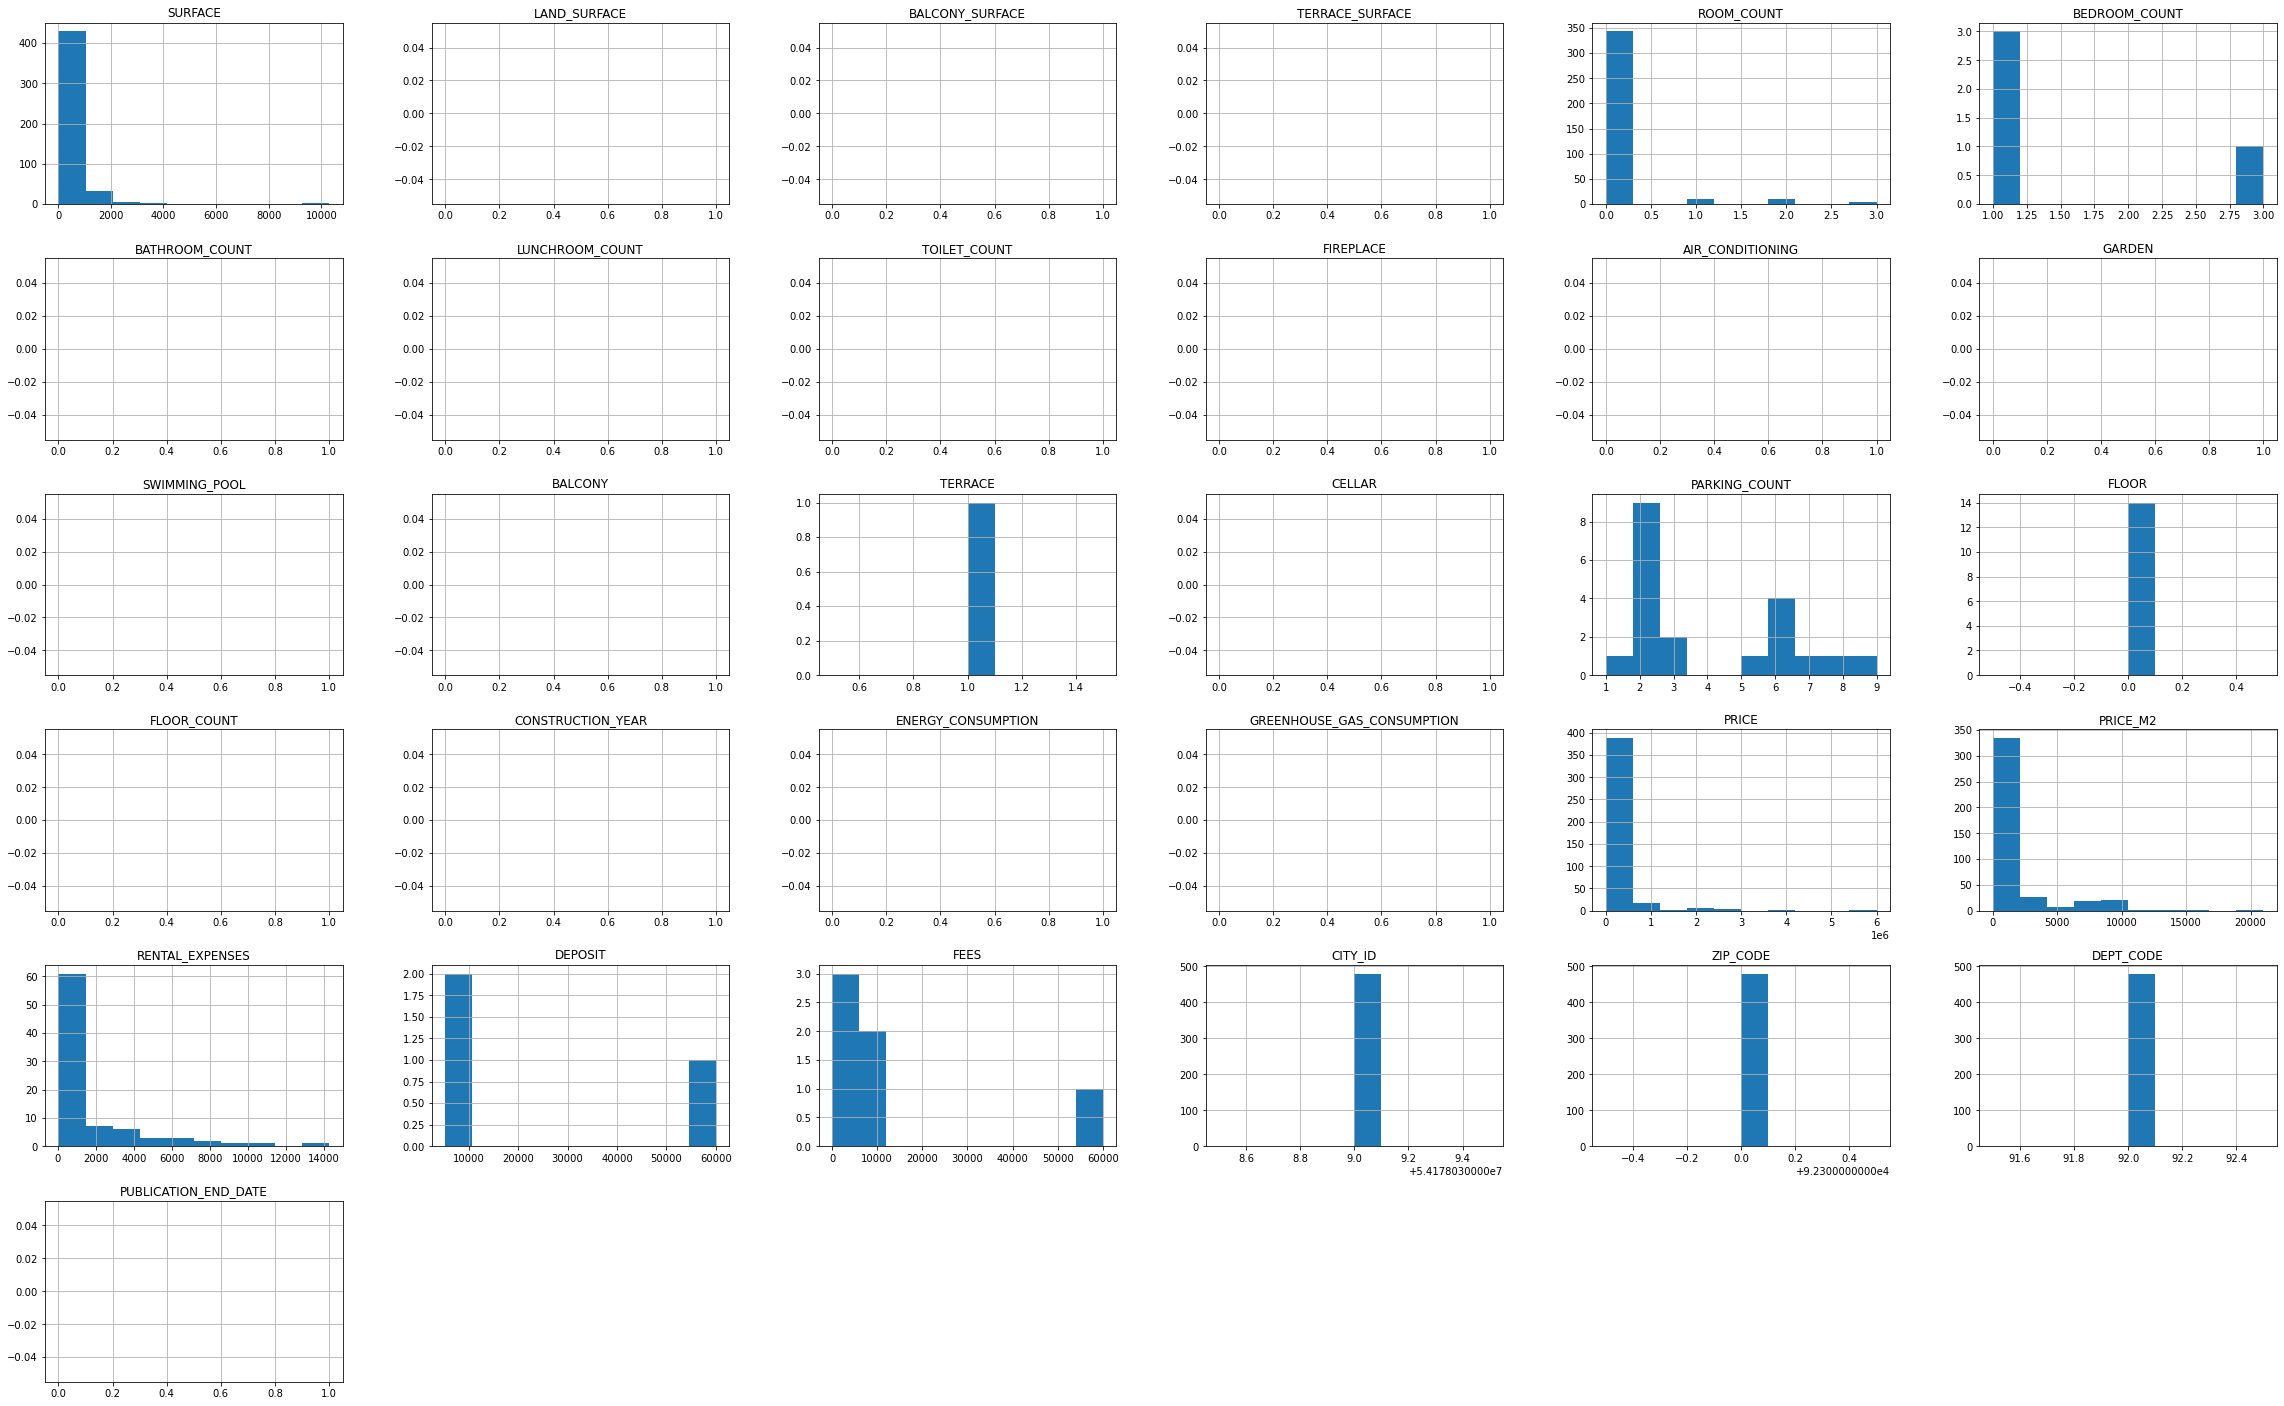

In [76]:
print('percentage of missing before dropping some columns')
print(round(100*(gp_premises.isnull().sum()/len(gp_premises.index)),2)) #check percentage of NaN before droping columns where all elements are NaN
print('Visualistation before dropping some columns')
gp_premises.hist(figsize=(40,25)) #histogram visualisation before droping columns where all elements are NaN

In [77]:
gp_premises=clean(gp_premises)

percentage of missing after dropping some columns
ID                           0.00
URL                          0.00
CRAWL_SOURCE                 0.00
PROPERTY_TYPE                0.00
NEW_BUILD                    0.00
DESCRIPTION                  0.00
IMAGES                       0.00
SURFACE                      1.88
ROOM_COUNT                  23.59
BEDROOM_COUNT               99.16
TERRACE                     99.79
PARKING                      0.00
PARKING_COUNT               95.82
HEATING_TYPES                0.00
HEATING_MODE                95.62
FLOOR                       97.08
MARKETING_TYPE               0.00
PRICE                       12.32
PRICE_M2                    13.99
PRICE_EVENTS                 0.00
RENTAL_EXPENSES             82.25
RENTAL_EXPENSES_INCLUDED    85.39
DEPOSIT                     99.37
FEES                        98.75
FEES_INCLUDED               88.31
EXCLUSIVE_MANDATE            0.00
AGENCIES_UNWANTED           98.33
OCCUPIED                    69.3

array([[<AxesSubplot:title={'center':'SURFACE'}>,
        <AxesSubplot:title={'center':'ROOM_COUNT'}>,
        <AxesSubplot:title={'center':'BEDROOM_COUNT'}>,
        <AxesSubplot:title={'center':'TERRACE'}>],
       [<AxesSubplot:title={'center':'PARKING_COUNT'}>,
        <AxesSubplot:title={'center':'FLOOR'}>,
        <AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'PRICE_M2'}>],
       [<AxesSubplot:title={'center':'RENTAL_EXPENSES'}>,
        <AxesSubplot:title={'center':'DEPOSIT'}>,
        <AxesSubplot:title={'center':'FEES'}>,
        <AxesSubplot:title={'center':'CITY_ID'}>],
       [<AxesSubplot:title={'center':'ZIP_CODE'}>,
        <AxesSubplot:title={'center':'DEPT_CODE'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

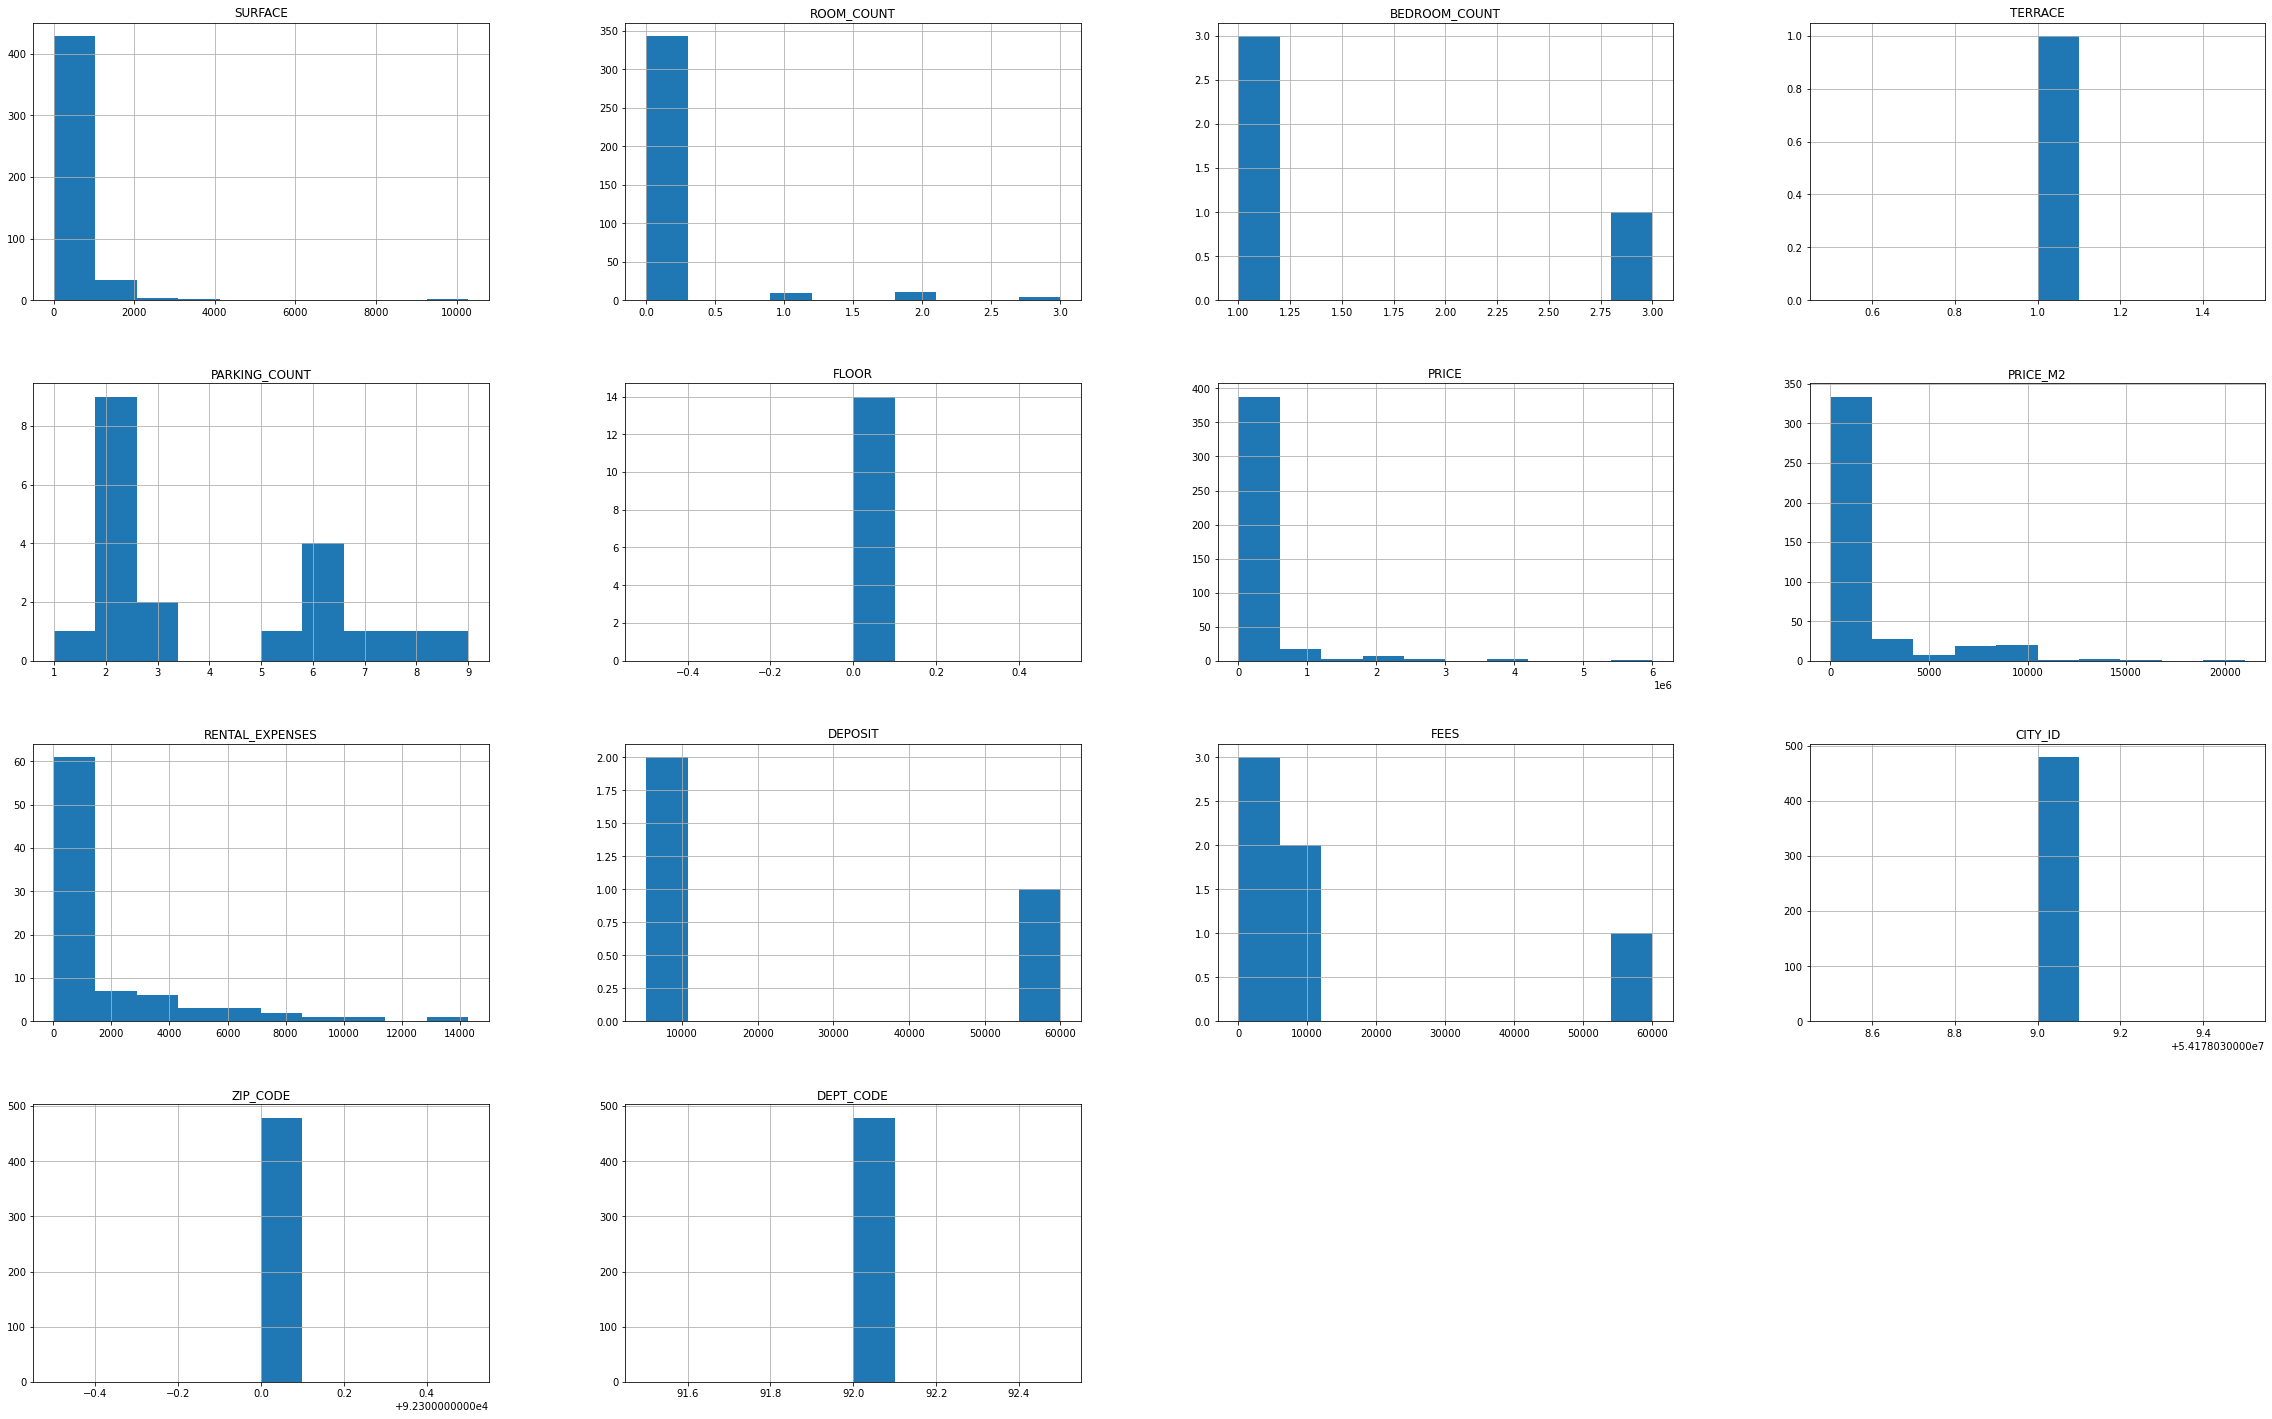

In [78]:
print('percentage of missing after dropping some columns')
print(round(100*(gp_premises.isnull().sum()/len(gp_premises.index)),2)) #check percentage of NaN after droping columns where all elements are NaN
print('Visualistation after dropping some columns:')
gp_premises.hist(figsize=(40,25)) #histogram visualisation after droping columns where all elements are NaN

Here we display the shape of duplicated values for APARTEMENT category of property. This is juste an additional analysis to show that some duplicate can be dropped, based on certains columns (if there is a need!). For instance "ID" has no duplicate while variable "DESCRIPTION" has 198 duplicated rows.

In [79]:
cols_apt=gp_apt.columns #getting variables/columns names

In [80]:
for col in cols_apt:
    print(col)
    print(gp_apt[gp_apt.duplicated(col)].shape)

ID
(0, 45)
URL
(0, 45)
CRAWL_SOURCE
(1424, 45)
PROPERTY_TYPE
(1435, 45)
NEW_BUILD
(1433, 45)
DESCRIPTION
(198, 45)
IMAGES
(112, 45)
SURFACE
(1129, 45)
TERRACE_SURFACE
(1417, 45)
ROOM_COUNT
(1426, 45)
BEDROOM_COUNT
(1431, 45)
FURNISHED
(1433, 45)
GARDEN
(1434, 45)
SWIMMING_POOL
(1434, 45)
TERRACE
(1434, 45)
PARKING
(1434, 45)
PARKING_COUNT
(1433, 45)
HEATING_TYPES
(1431, 45)
HEATING_MODE
(1432, 45)
FLOOR
(1423, 45)
FLOOR_COUNT
(1419, 45)
CONSTRUCTION_YEAR
(1387, 45)
ELEVATOR
(1433, 45)
CARETAKER
(1433, 45)
MARKETING_TYPE
(1434, 45)
PRICE
(992, 45)
PRICE_M2
(740, 45)
PRICE_EVENTS
(358, 45)
RENTAL_EXPENSES
(1366, 45)
RENTAL_EXPENSES_INCLUDED
(1433, 45)
DEPOSIT
(1400, 45)
FEES
(1375, 45)
FEES_INCLUDED
(1433, 45)
EXCLUSIVE_MANDATE
(1434, 45)
AGENCIES_UNWANTED
(1433, 45)
OCCUPIED
(1433, 45)
DEALER_NAME
(1071, 45)
DEALER_TYPE
(1433, 45)
CITY_ID
(1435, 45)
CITY
(1435, 45)
ZIP_CODE
(1434, 45)
DEPT_CODE
(1435, 45)
PUBLICATION_START_DATE
(23, 45)
LAST_CRAWL_DATE
(0, 45)
LAST_PRICE_DECREASE_DATE
(

# TREATING TEXT DATA FOR EACH ELEMENT OF PROPERTY TYPE
Here we apply some text cleaning for Variable "DESCRIPTION" using Natural Language Processing approach. This is important to deeply learn from the text data. We only show how text can be cleaned into key words for further analysis (if there is a need):

1. Create a function for treating text
2. Call the function for all categories of property type

1.Create a function for treating text

In [81]:
##importing Natural Language Toolkit for working and modeling text
#import nltk
nltk.download('punkt') 
nltk.download('stopwords')

##importing sent_tokenize() function from NLTK for spliting text into sentences
#from nltk import sent_tokenize

##importing function for spliting words
#from nltk.tokenize import word_tokenize 

##importing module to remove punctuation from each word
#import string

##importing function to filter out stop words
#from nltk.corpus import stopwords 

[nltk_data] Downloading package punkt to /home/tgbangou/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/tgbangou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
def treat_text(data,i):
    text=data["DESCRIPTION"].iloc[int(i)]
        
    # split into sentences
    sentences = sent_tokenize(text) 
        
    # split into words        
    tokens = word_tokenize(text)
        
    #remove all tokens that are not alphabetic   
    words = [word for word in tokens if word.isalpha()]
        
    # convert to lower case
    tokens = [w.lower() for w in tokens] 
        
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    
    # filter out stop words
    stop_words = set(stopwords.words('french'))
    words = [w for w in words if w not in stop_words]
    print (sorted(words))
    #return words

2.Call the function for all categories of property type:

Displaying a list words acquired by treating text from the variable DESCRIPTION. With this list of words, we can decide to select words that are relevants.

In [83]:
treat_text(gp_apt,1) # calling text treatment function for APARTMENT at index 1

['a', 'agissant', 'ainsi', 'aménagée', 'annuelles', 'appartement', 'appartement', 'appartement', 'ascenseur', 'auprès', 'baigné', 'bain', 'balconterrasse', 'belle', 'bénéficiant', 'carrez', 'cave', 'chambre', 'charges', 'charges', 'charges', 'collange', 'commerces', 'comprenant', 'conseillère', 'contactez', 'copropriété', 'copropriété', 'cpi', 'cuisine', 'dominique', 'donnant', 'dune', 'entrée', 'euros', 'euros', 'eurosan', 'exposition', 'girauddesert', 'hauteur', 'honoraires', 'immeuble', 'indépendante', 'jardin', 'loi', 'lots', 'lumière', 'mandat', 'moderne', 'parquet', 'perte', 'place', 'plafond', 'premier', 'privees', 'prix', 'propose', 'proprietes', 'proximité', 'rue', 'salle', 'sans', 'sas', 'situé', 'sous', 'standing', 'sud', 'sécurisé', 'séjoursalon', 'séparé', 'tant', 'toilette', 'transports', 'vendeur', 'verdoyante', 'vue', 'écoles', 'équipée', 'étage']


In [84]:
treat_text(gp_building,1) # example of calling text treatment function for BUILDING variable at index 1

['actuellement', 'atypique', 'beaux', 'belle', 'calme', 'carrez', 'cet', 'cette', 'cette', 'commerces', 'complète', 'composé', 'cour', 'cour', 'cour', 'cour', 'deux', 'donnant', 'découvrir', 'entier', 'hauteur', 'immeuble', 'immeuble', 'levallois', 'lots', 'lots', 'louise', 'louise', 'michel', 'michel', 'métro', 'métro', 'occupé', 'parking', 'particuliers', 'pied', 'place', 'plafond', 'plusieurs', 'prestation', 'recherché', 'rezdechaussée', 'rue', 'rue', 'rue', 'secteur', 'sol', 'sous', 'surface', 'très', 'venez', 'verrière', 'verrière', 'volumes', 'étages']


In [85]:
treat_text(gp_house,1) # example of calling text treatment function for HOUSE variable at index 1

['annonce', 'asnières', 'avendrealouer', 'avenue', 'bains', 'belle', 'bien', 'box', 'chambres', 'cheminée', 'comprenant', 'copropriété', 'cuisine', 'dargenteuil', 'deau', 'demander', 'dispose', 'double', 'dun', 'dune', 'débarras', 'entrée', 'exigés', 'grand', 'infos', 'jardin', 'jour', 'lappartement', 'maison', 'mensuels', 'minimum', 'mise', 'parfait', 'parking', 'pavillonnaire', 'place', 'privatif', 'revenus', 'référence', 'salle', 'salle', 'soussol', 'séjour', 'séparés', 'terrasse', 'wc', 'étage', 'état']


In [86]:
treat_text(gp_parking,1) # example of calling text treatment function for PARKING variable at index 1

['accès', 'badge', 'charges', 'comprises', 'disponibilité', 'facile', 'immédiate', 'loue', 'loyer', 'mensuel', 'parking', 'place', 'résidence', 'standing', 'sécurisée', 'toutes']


In [87]:
treat_text(gp_premises,1) # example of calling text treatment function for PREMISES variable at index 1

['belle', 'bureau', 'carrez', 'charges', 'clichy', 'commercial', 'couturier', 'dont', 'décomposant', 'e', 'environ', 'espace', 'gare', 'grand', 'honoraires', 'honoraires', 'levallois', 'levallois', 'local', 'loyer', 'ouvert', 'partie', 'paul', 'petite', 'pièce', 'près', 'rue', 'sol', 'soussol', 'superficie', 'surélevée', 'sus', 'ttc', 'vaillant', 'vitrine', 'wc']


# TREATING IMAGE DATA FOR EACH ELEMENT OF PROPERTY TYPE

1. Create a function for treating images
2. Call the function for all categories of property type

1.Create a function for treating images

In [88]:
##import module for extracting list from string
#import ast

##importing module to read and display image from url
#from IPython.core.display import Image,display 


In [89]:
def treat_image(data,i):
    data_imagelist = ast.literal_eval(data['IMAGES'].iloc[int(i)])
    for url in data_imagelist:
        print(url)
        display(Image(url, width = 250)) #displaying image  

2.Call the function for all categories of property type

https://v.seloger.com/s/width/965/visuels/0/9/3/7/0937mk01pff7dkq2n4dhqcwehdoaa4okzpmzc1zwg.jpg


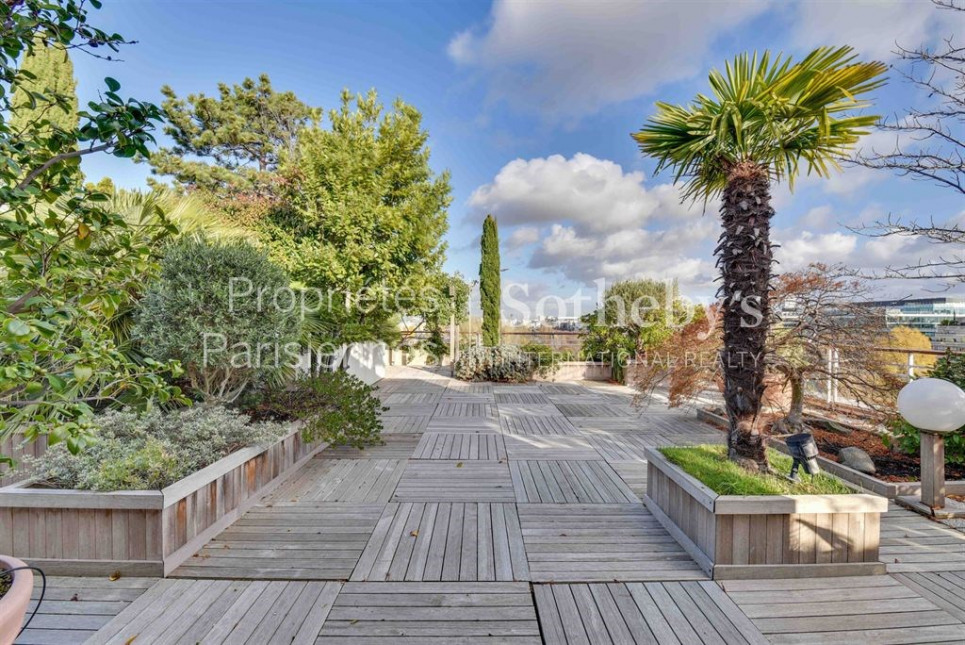

https://v.seloger.com/s/width/965/visuels/0/a/j/o/0ajo0vk9ebr4wr14ywp0zkm3bxwdit1dzkkdozlkw.jpg


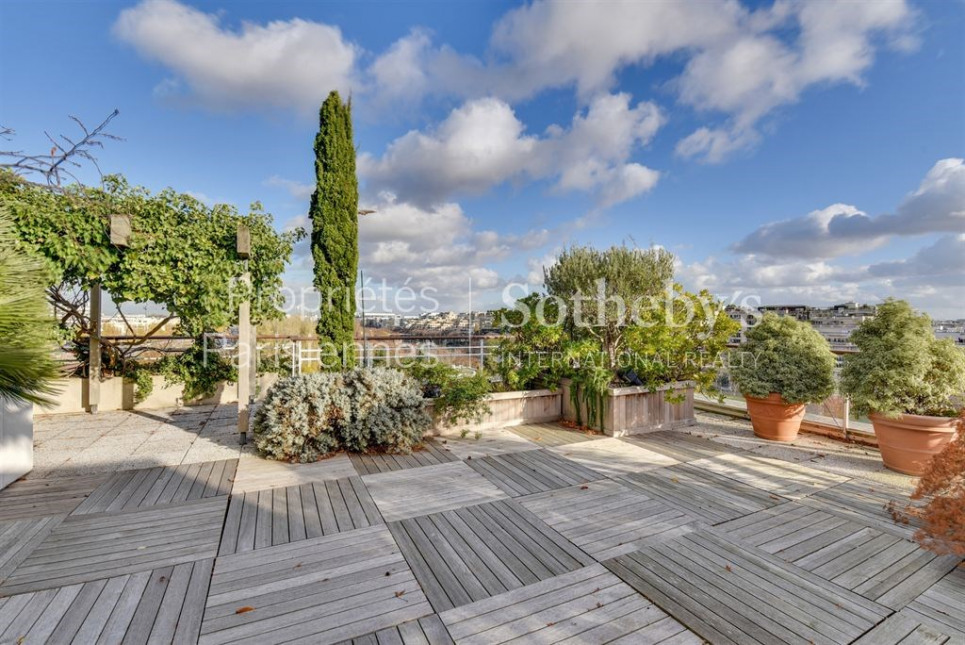

https://v.seloger.com/s/width/965/visuels/0/w/l/2/0wl2vltoepcvz24qoays30lyhph3xwn9s0mh1pgcg.jpg


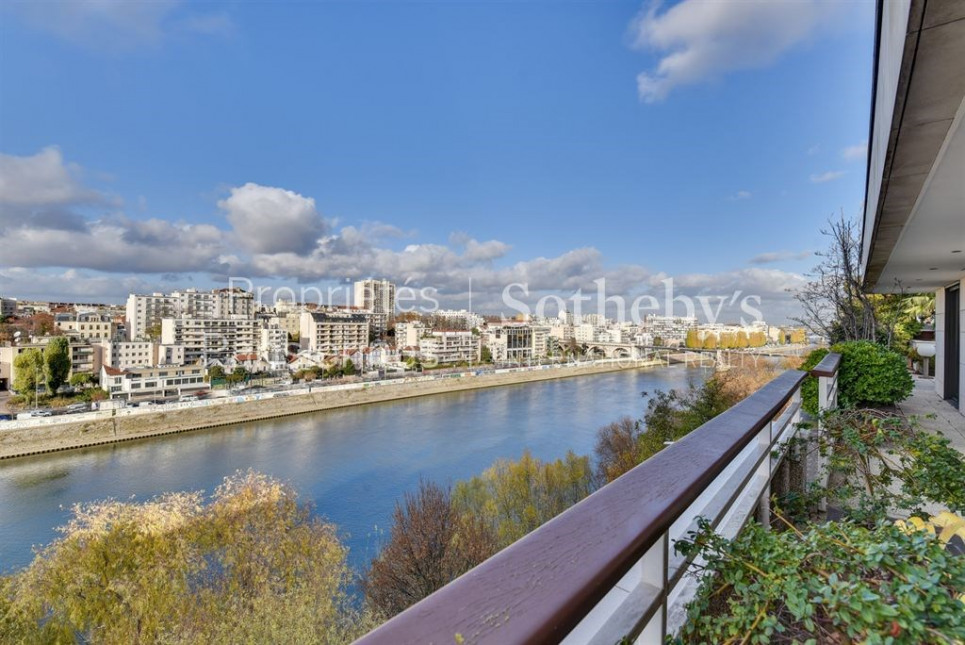

https://v.seloger.com/s/width/965/visuels/1/s/o/a/1soaklv0bt3eun1wziqooyh6hxjp4igc7imo1mo00.jpg


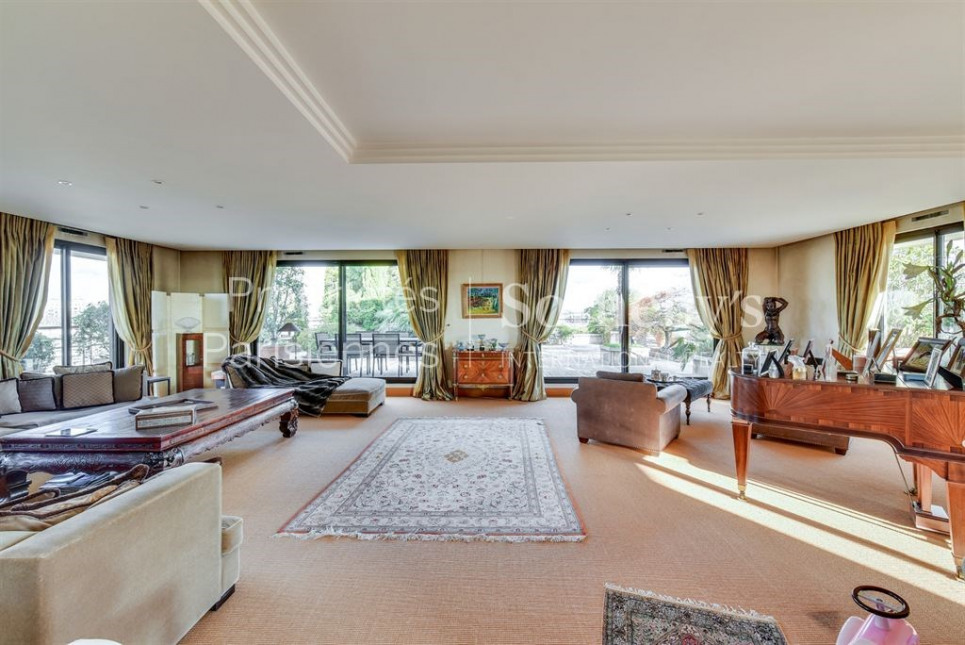

https://v.seloger.com/s/width/965/visuels/2/6/d/b/26dbyhdhwukb7n30t9jub1jtjueprd3is4vlmytj4.jpg


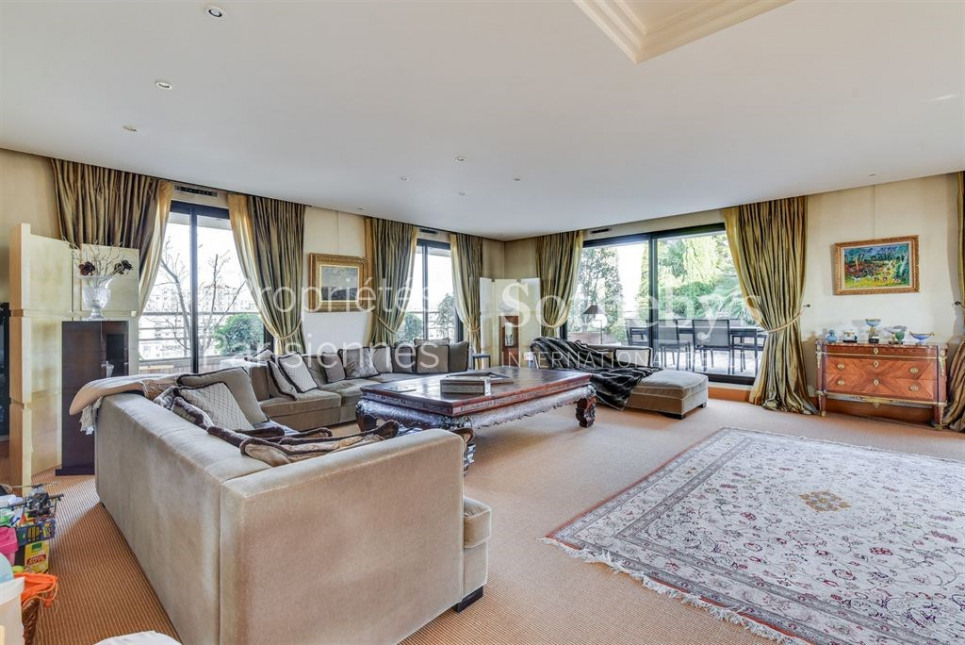

https://v.seloger.com/s/width/965/visuels/0/z/e/o/0zeoexpb067njl7jmrybbeuzvssav7qvl5mgls000.jpg


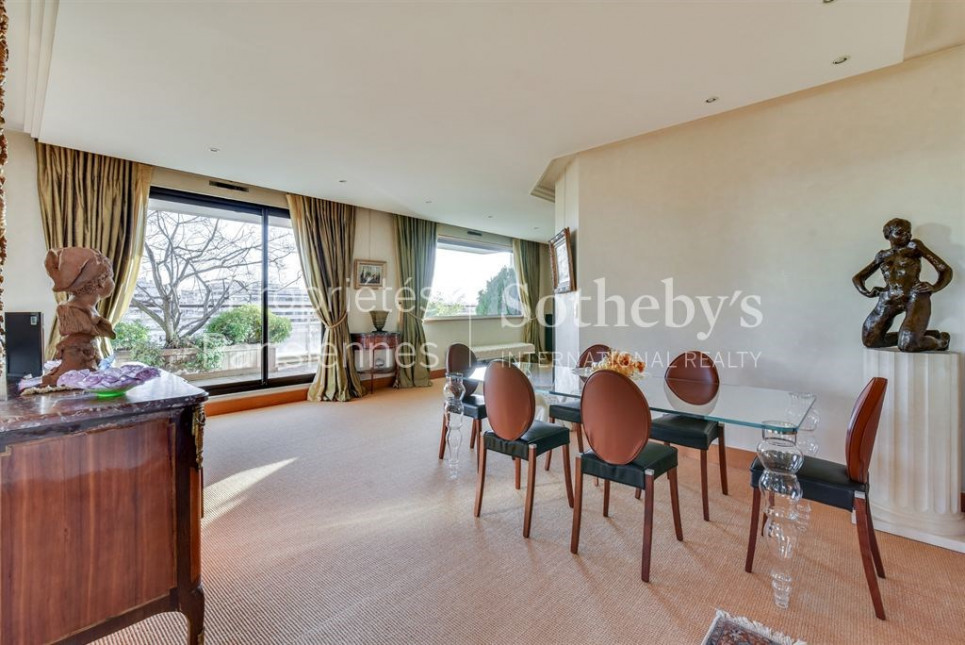

https://v.seloger.com/s/width/965/visuels/1/2/2/s/122sdljfjcr83o312bn9b080jkhpegl60mrorn4zk.jpg


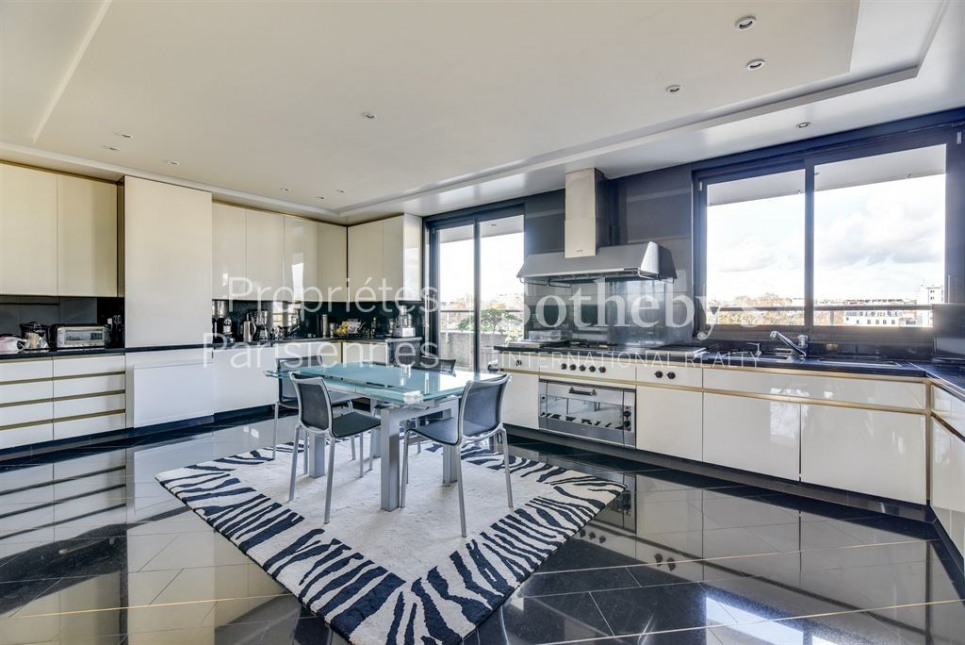

https://v.seloger.com/s/width/965/visuels/1/r/m/p/1rmpeucxc94cfboiunpicj3tfu5s7jtqi660lxm9s.jpg


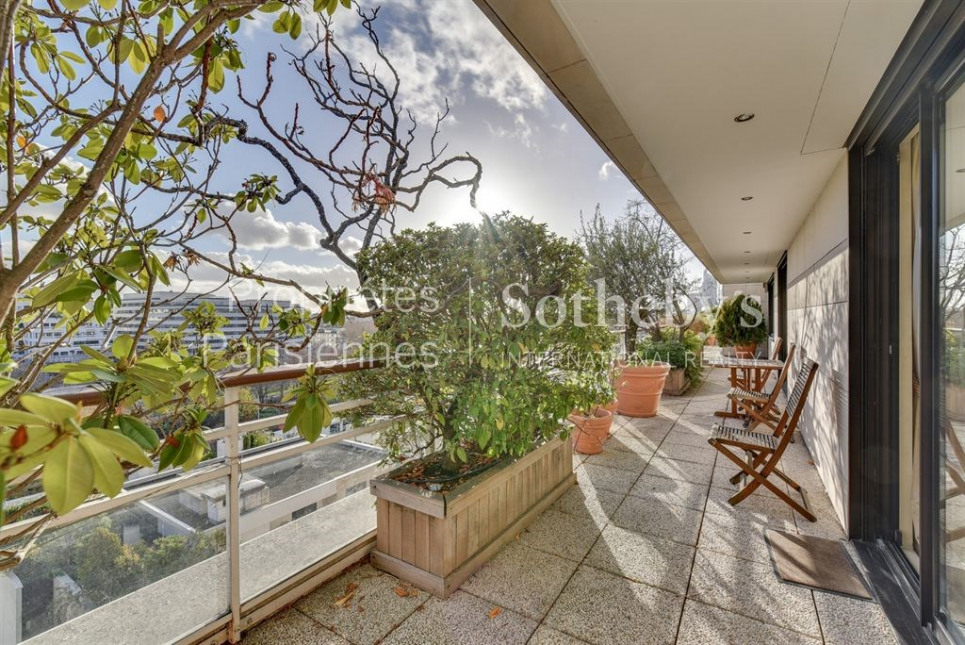

https://v.seloger.com/s/width/965/visuels/1/c/o/0/1co082mqmawxfgvqvcb94qxb7ey9l4xys8eu20xkw.jpg


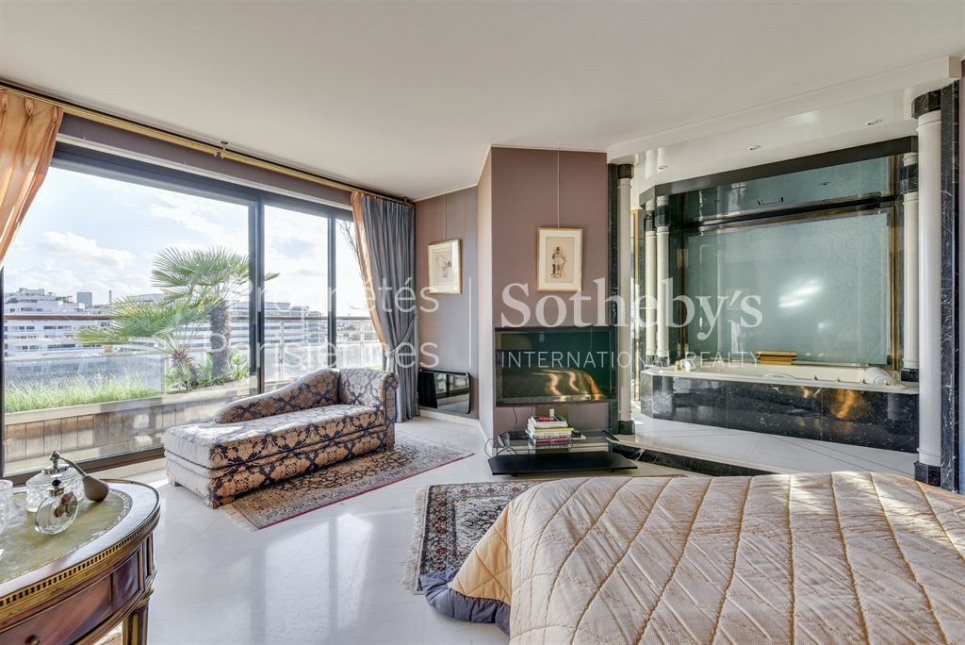

https://v.seloger.com/s/width/965/visuels/0/j/g/e/0jgex95s10o2b64jw032v9dlmdh3ak9a41b7ns9vk.jpg


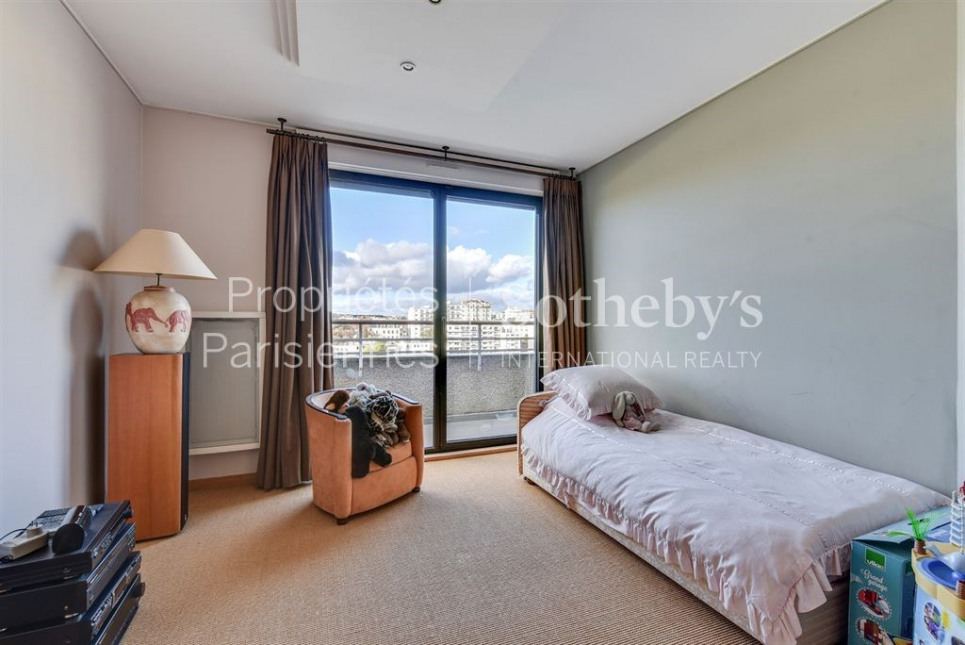

https://v.seloger.com/s/width/965/visuels/1/0/p/8/10p82gy6ecftk5navepv662ycffnq3vzy0m4fx7nk.jpg


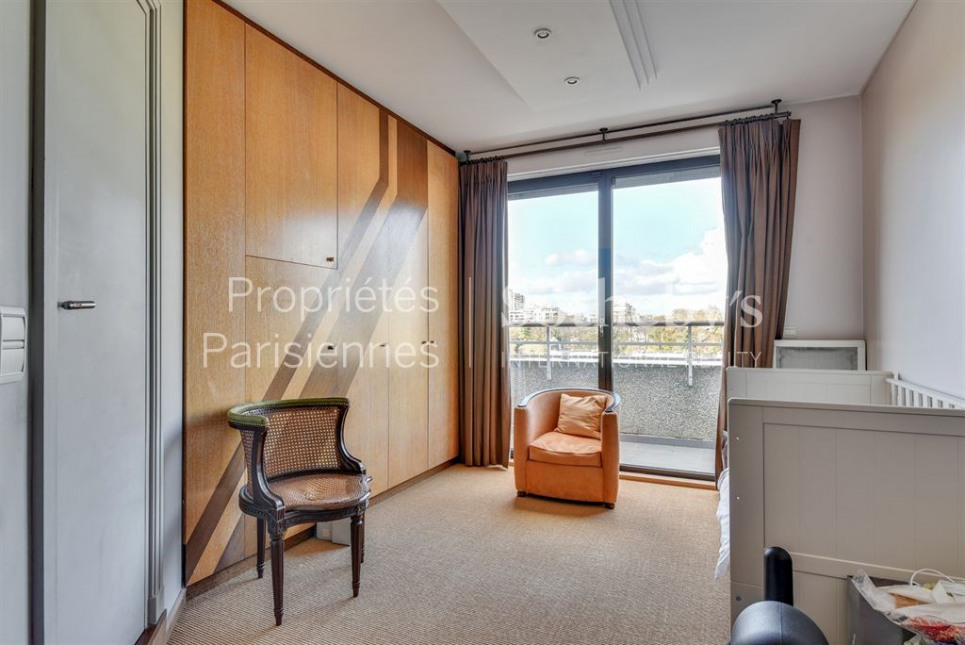

https://v.seloger.com/s/width/965/visuels/1/y/f/l/1yfl55uj9znq1j5q3go2pd2dcfwt2ixhbd73g0hds.jpg


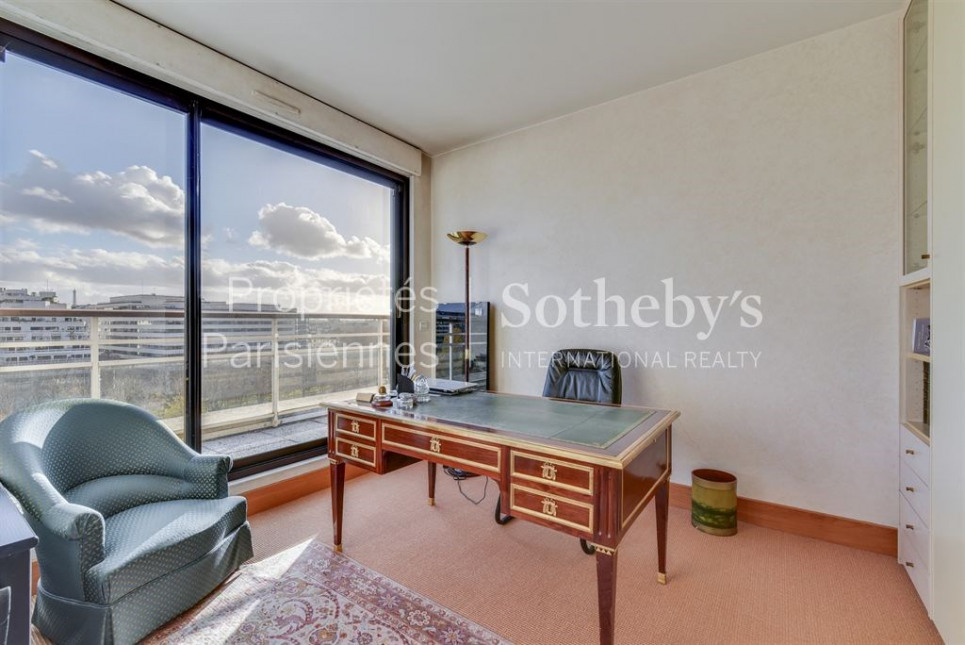

https://v.seloger.com/s/width/965/visuels/0/f/9/4/0f94q9liybfcc2d17wnp926f4rdv1t7k9pldgjr40.jpg


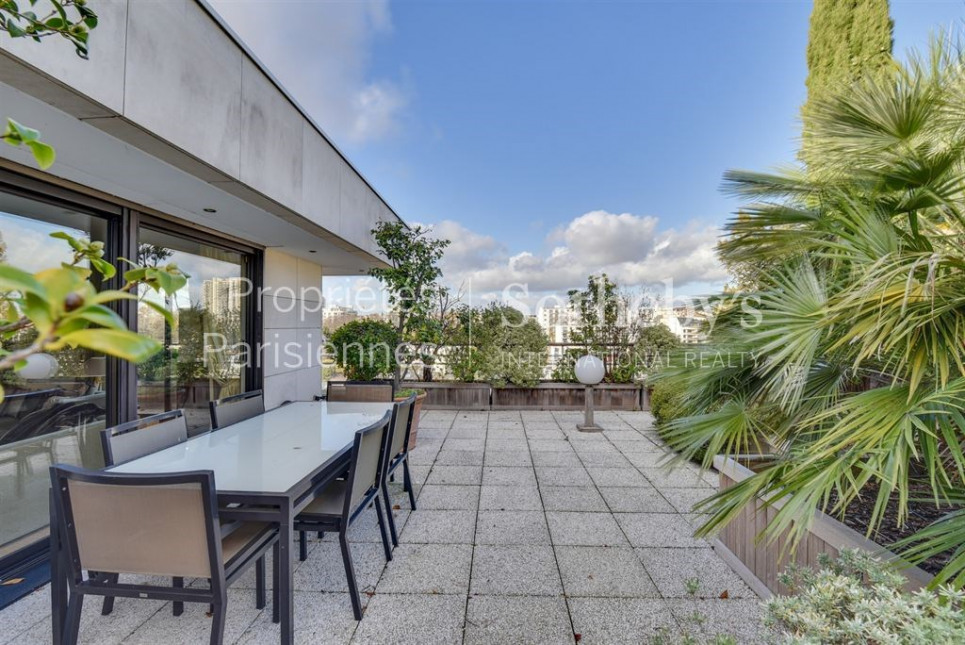

https://v.seloger.com/s/width/965/visuels/1/p/a/8/1pa882qnalcr98q4dck5n34pc59mchmp23jv54bgg.jpg


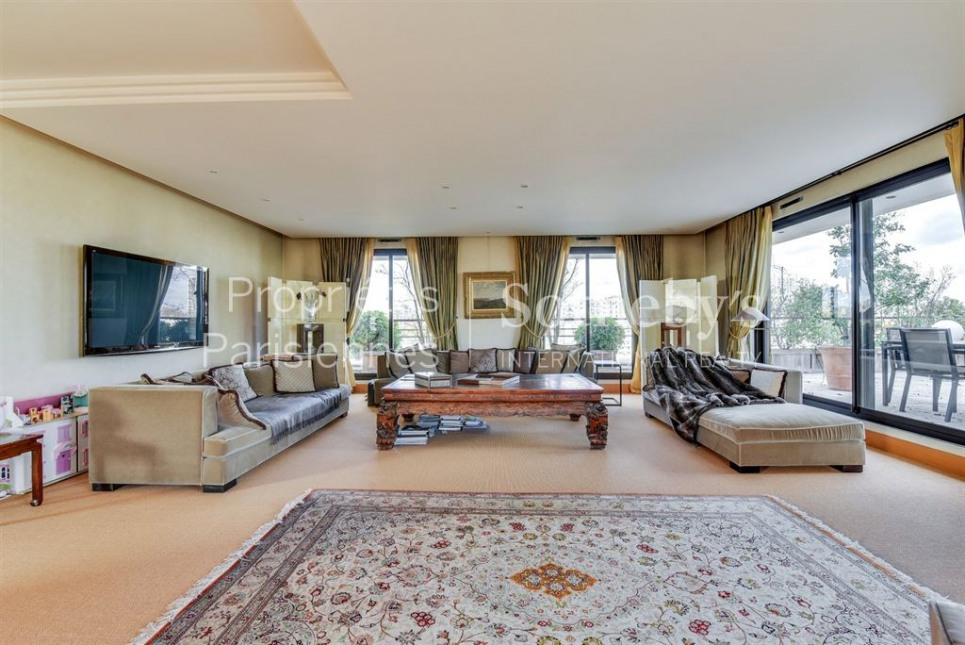

https://v.seloger.com/s/width/965/visuels/1/m/y/s/1mysnixtw0s79l4rdpbzcyv00l3zffw0vokqft1j4.jpg


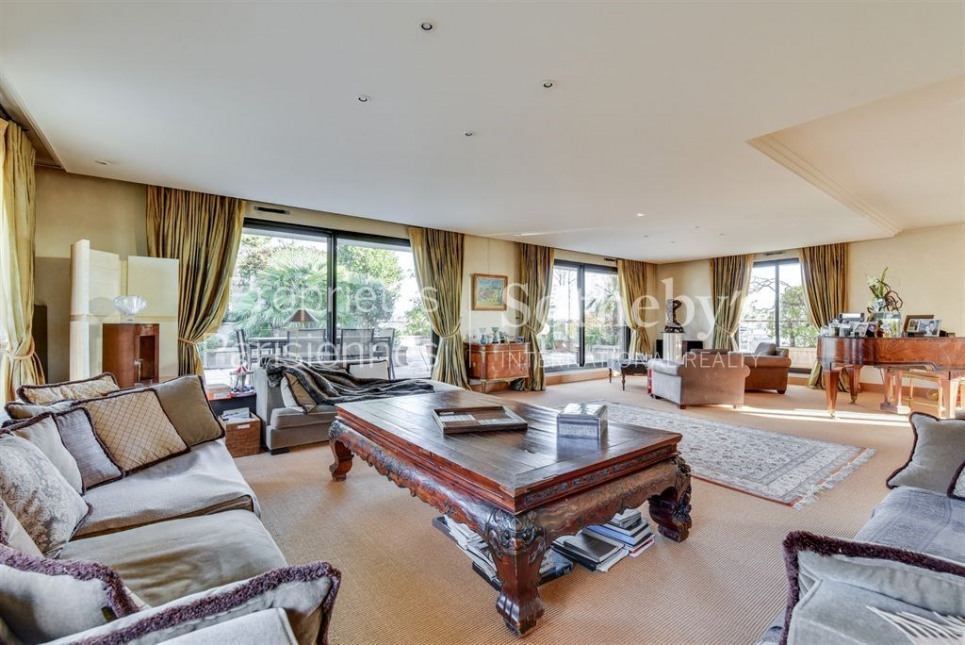

https://v.seloger.com/s/width/965/visuels/1/7/m/2/17m2rc4n8b4rawqpwxrxvnsvst6gqnqbludobpuyo.jpg


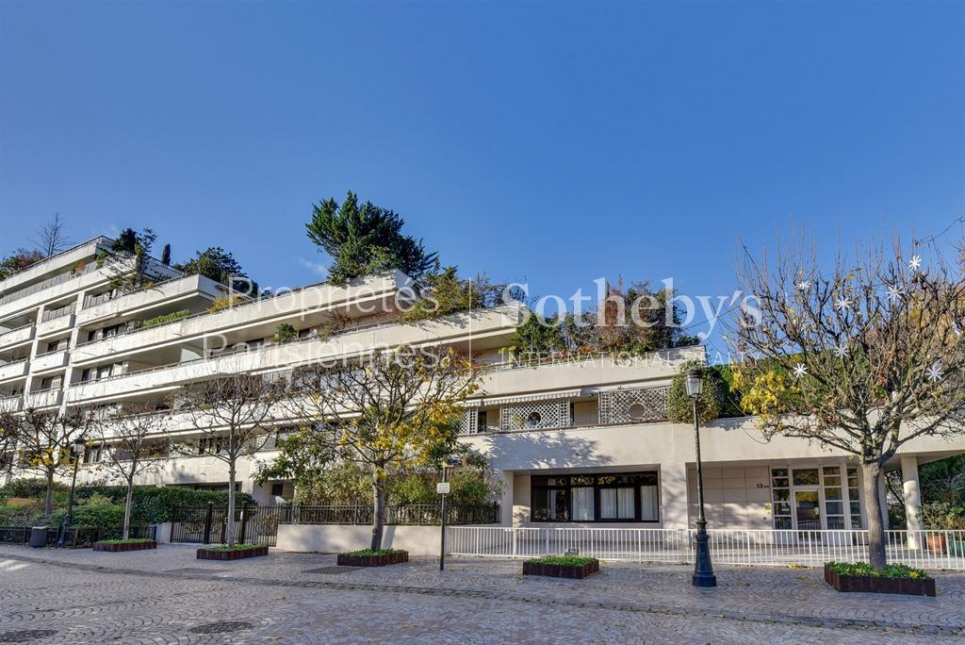

In [90]:
treat_image(gp_apt,2) # calling image treatment function for APARTMENT at index 2

https://pix.yanport.com/ads/6e72cc30-91eb-11e9-bc97-e75542746f87/image_bf60263b187d7a2382b2f153b5f9bd12.jpg


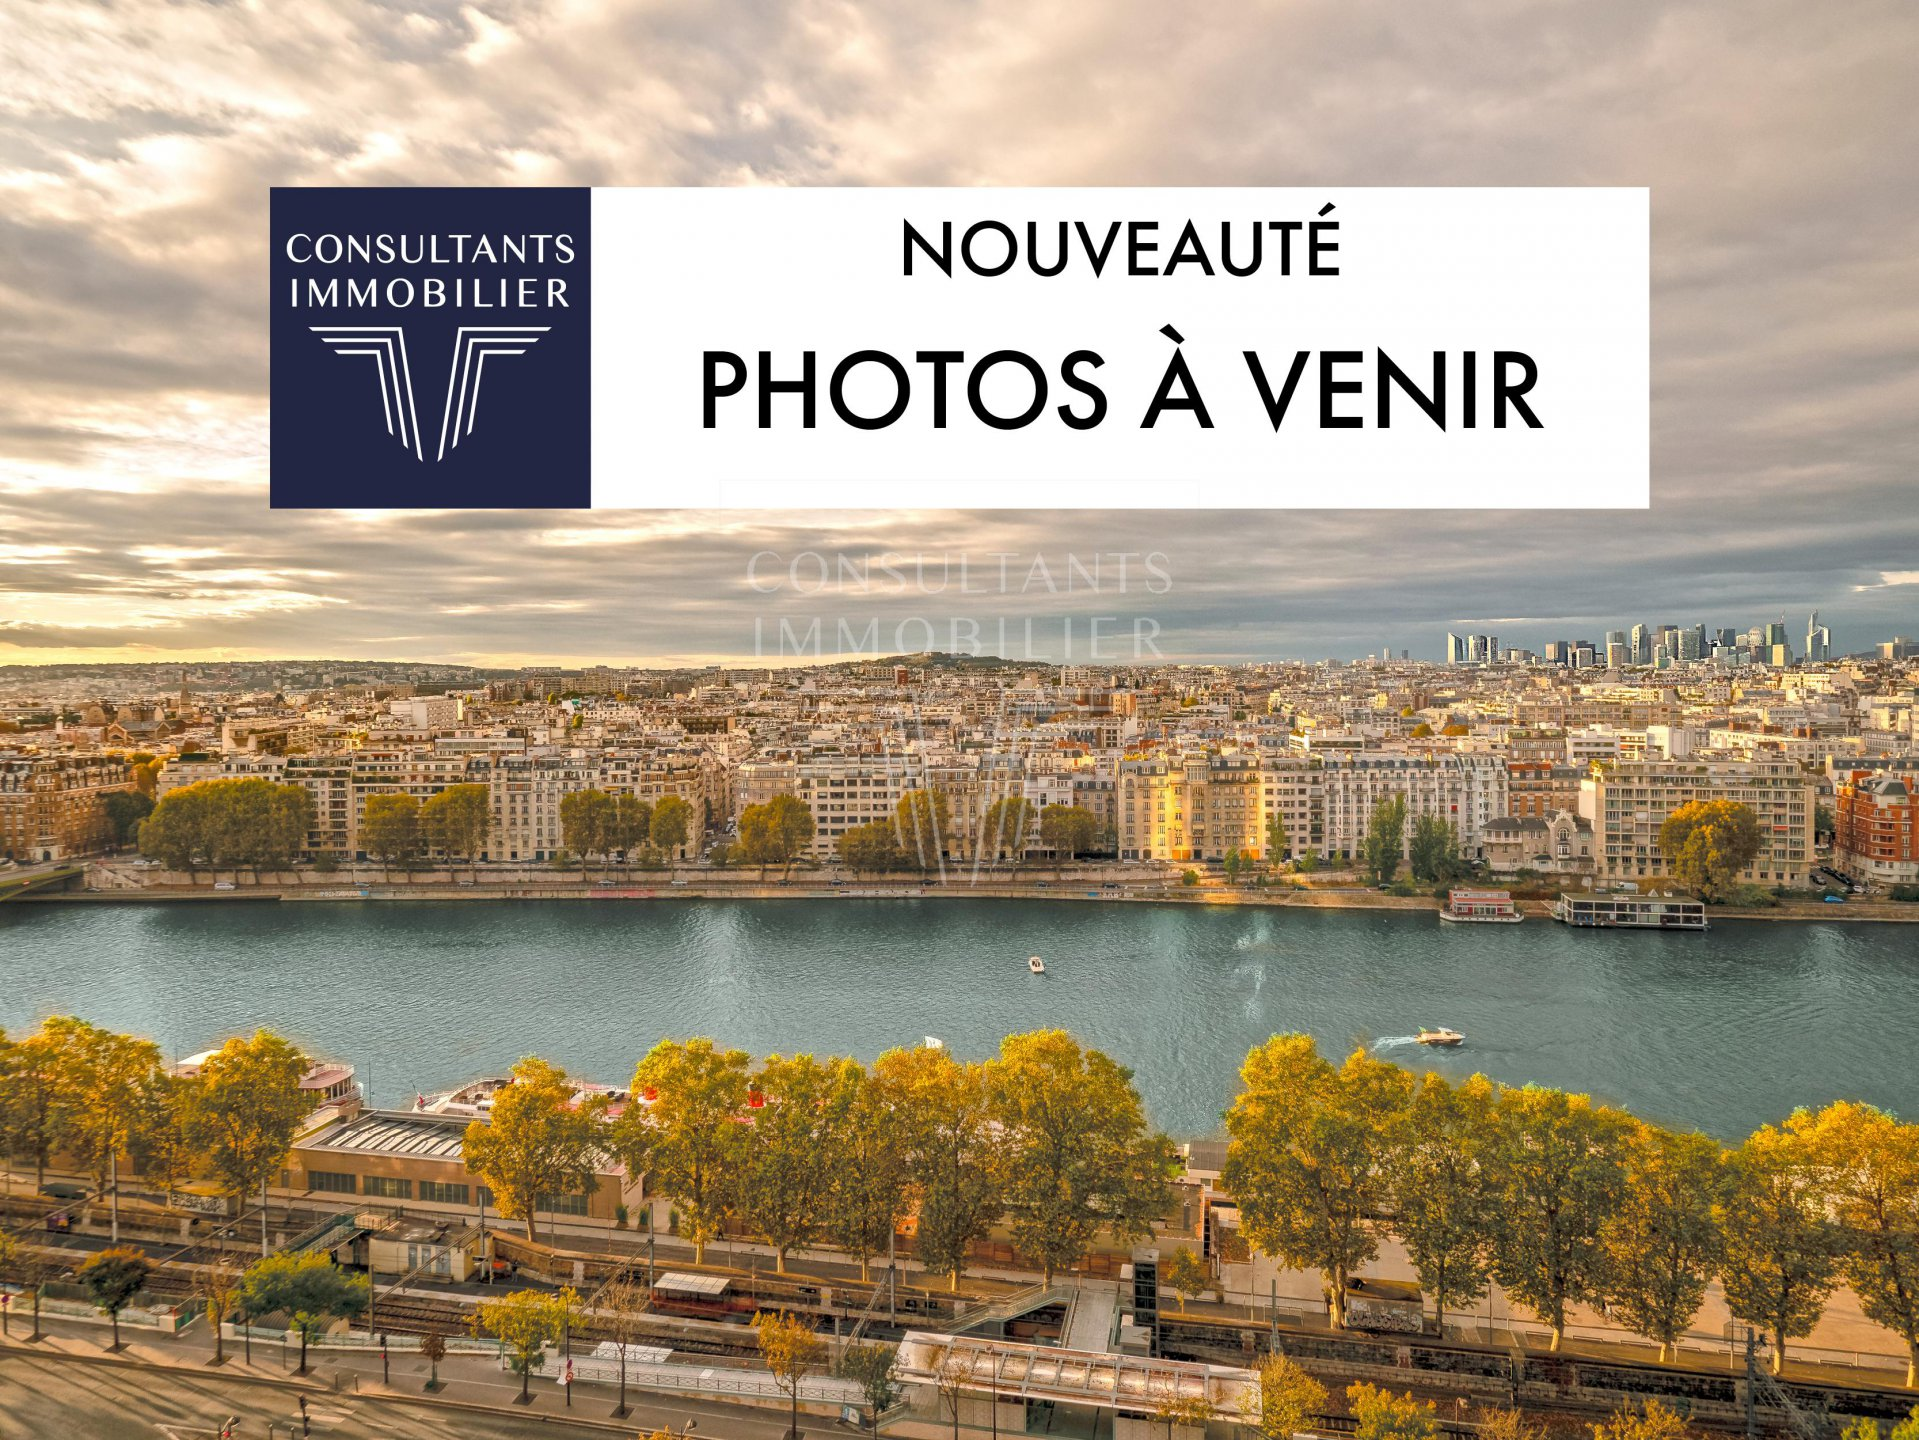

In [91]:
treat_image(gp_building,2) # example of calling image treatment function for BUILDING variable at index 2

http://thumbor.meilleursagents.com/vXJsvsX5HZga51vMQuKF25I9zAQ=/x800/filters:no_upscale()/listings/d7/06/d70618fa710a45dfe24b56aeeb297d3aa4294120.jpg


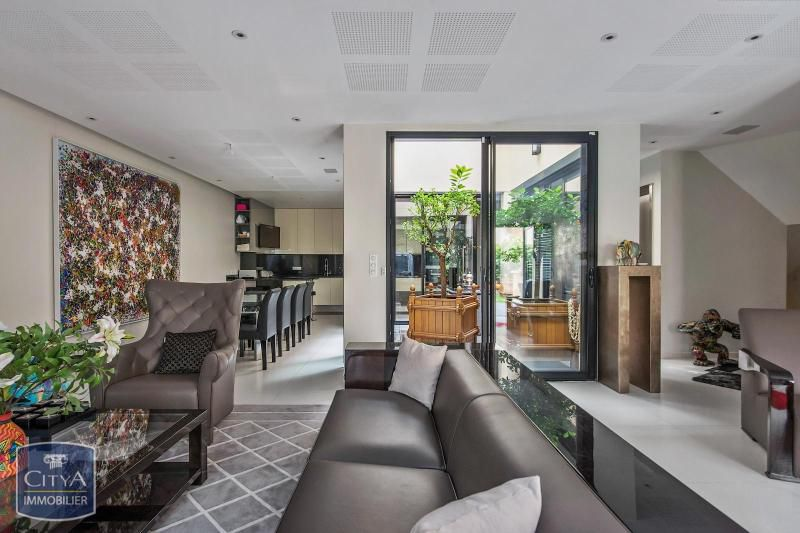

http://thumbor.meilleursagents.com/5pvCDMN6D_HTl9Owe_jBUYQox4c=/x800/filters:no_upscale()/listings/23/28/23281ca04235c1a51a1d71bc1fcea3b3332f88a0.jpg


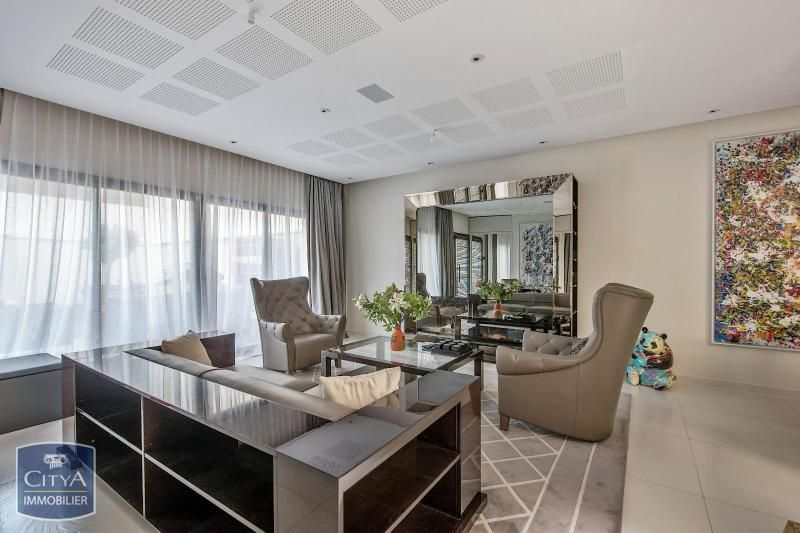

http://thumbor.meilleursagents.com/fQrCvJrBAUzNMRvNJrERUhjnsr8=/x800/filters:no_upscale()/listings/34/5d/345db41bdbebf64c458e2a3efc6577748d13752c.jpg


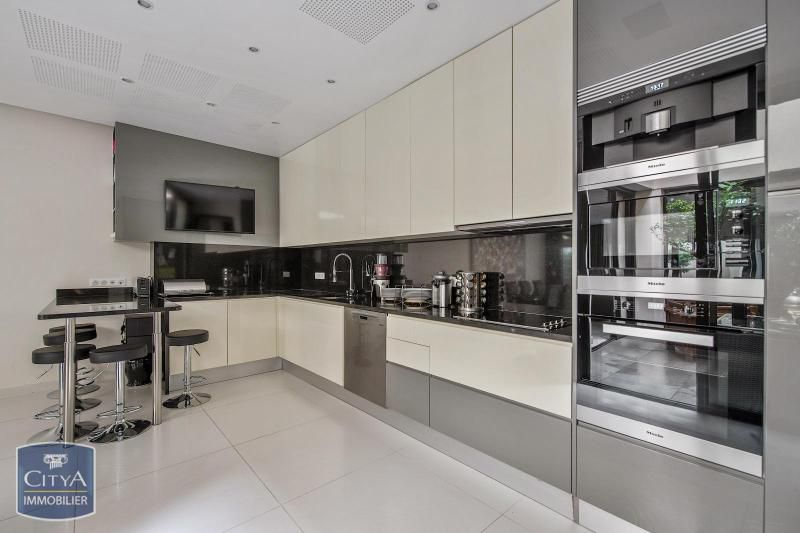

http://thumbor.meilleursagents.com/buuaf9ZxgS6HeQsusbt1-ZjtMJ0=/x800/filters:no_upscale()/listings/77/69/776929a70720eef9ec6afd2550db669264630e6e.jpg


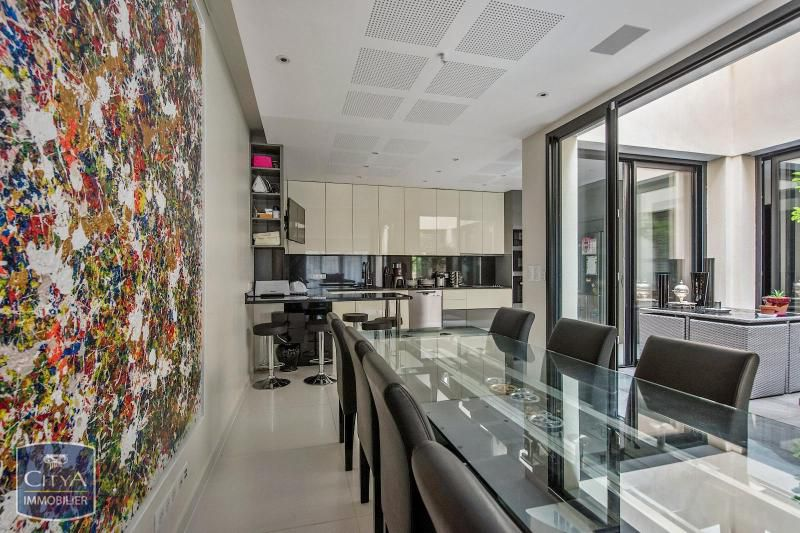

http://thumbor.meilleursagents.com/--stes6xRLE6RDTWM065RFJ9xUg=/x800/filters:no_upscale()/listings/1e/13/1e134fbc7fbdbec40f1ad66d0fea9dc3b760b6c7.jpg


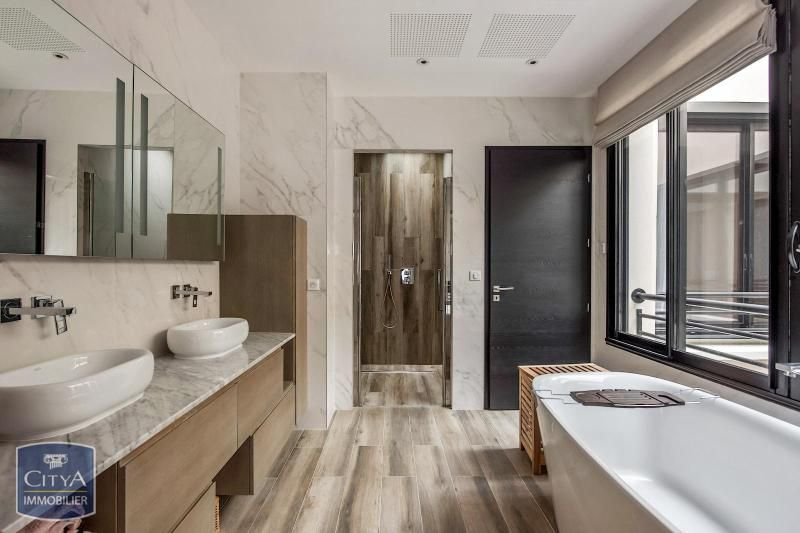

http://thumbor.meilleursagents.com/CuAnSN308OOPUmVXLJOhWzd8OQk=/x800/filters:no_upscale()/listings/63/49/63490e81fc63655abc9821c303a670503c3a2744.jpg


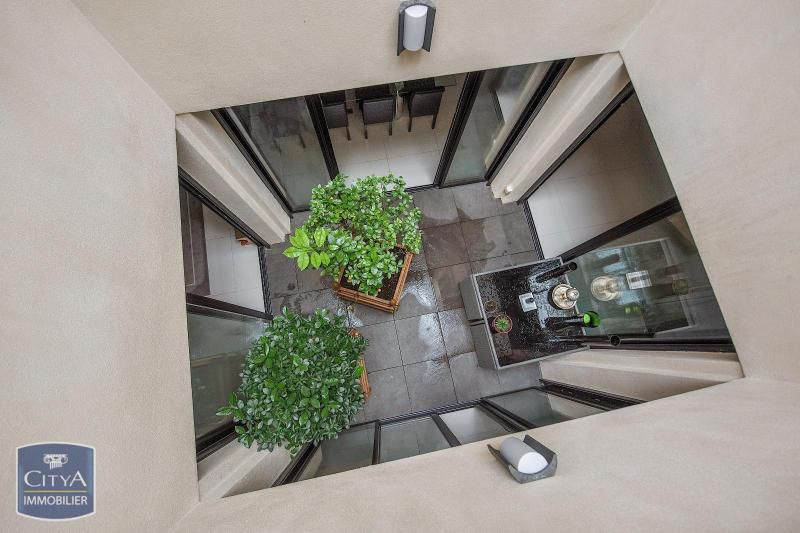

http://thumbor.meilleursagents.com/ZkdOzXOrXB6rOpeiql1twpiiMoU=/x800/filters:no_upscale()/listings/f8/05/f8055fce2fdc50317d7c1aea9f6a1eb94969838f.jpg


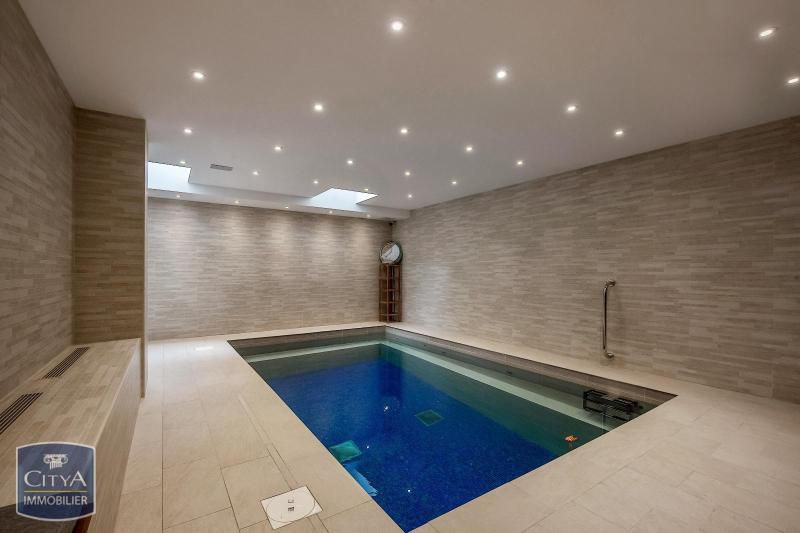

http://thumbor.meilleursagents.com/T8MwGKSlQz8fKinLzyQJSFCtxxU=/x800/filters:no_upscale()/listings/d6/47/d6473786efa79ff8e10f9448aaeb8e7087dd3507.jpg


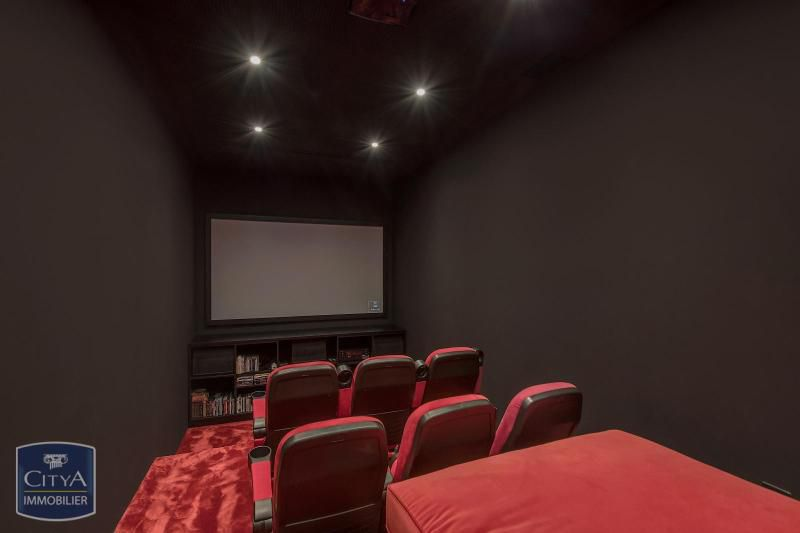

http://thumbor.meilleursagents.com/IccmcEpfjtt2rX3Q-R6Ed3xudS4=/x800/filters:no_upscale()/listings/19/1d/191da896dcf36cd190ca5f0cd4befb538de06227.jpg


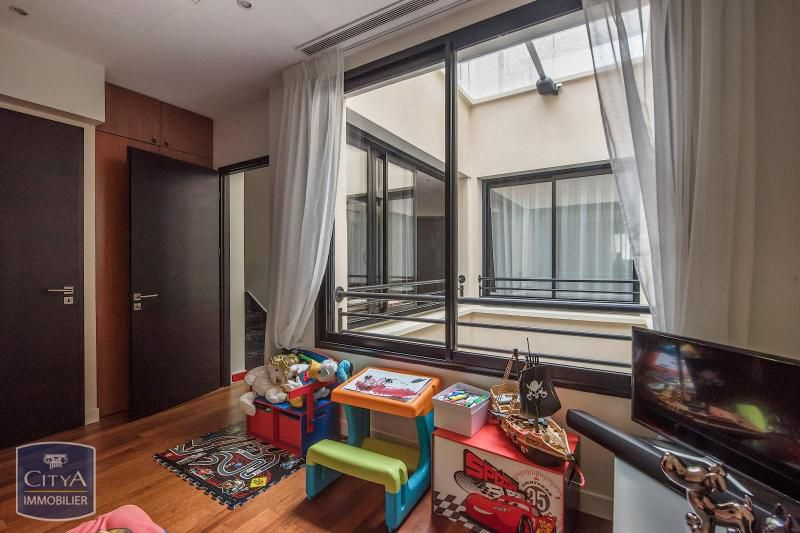

http://thumbor.meilleursagents.com/_VsKOxAzxCzxzz4JqKuBRjx9XtQ=/x800/filters:no_upscale()/listings/58/e6/58e68e37dcbd9c8a5ec43b63146c8b3ffa907ec0.jpg


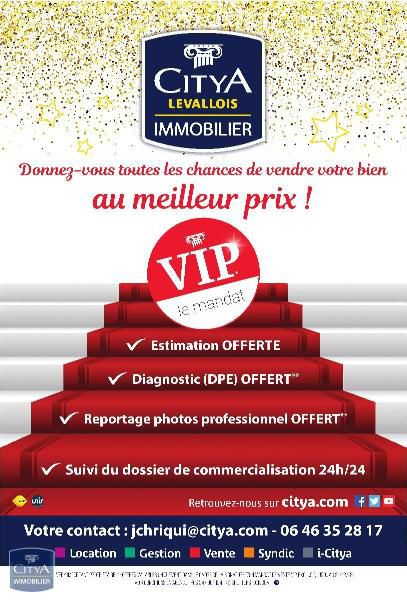

In [92]:
treat_image(gp_house,6) # example of calling image treatment function for HOUSE variable at index 6

https://pix.yanport.com/ads/d33aa450-9842-11e9-b883-7d9a2d13f1b7/image_bd5eb7664dc578d4e3046c533286a466.jpg


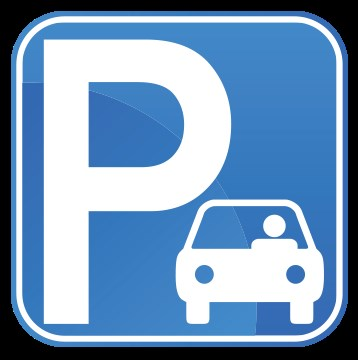

In [93]:
treat_image(gp_parking,12) # example of calling image-treatment function for PARKING variable at index 12

https://pix.yanport.com/ads/df8944b0-5584-11e9-bcf5-3b398c242d19/image_a2054cf955213308ee0a2458626ba761.jpg


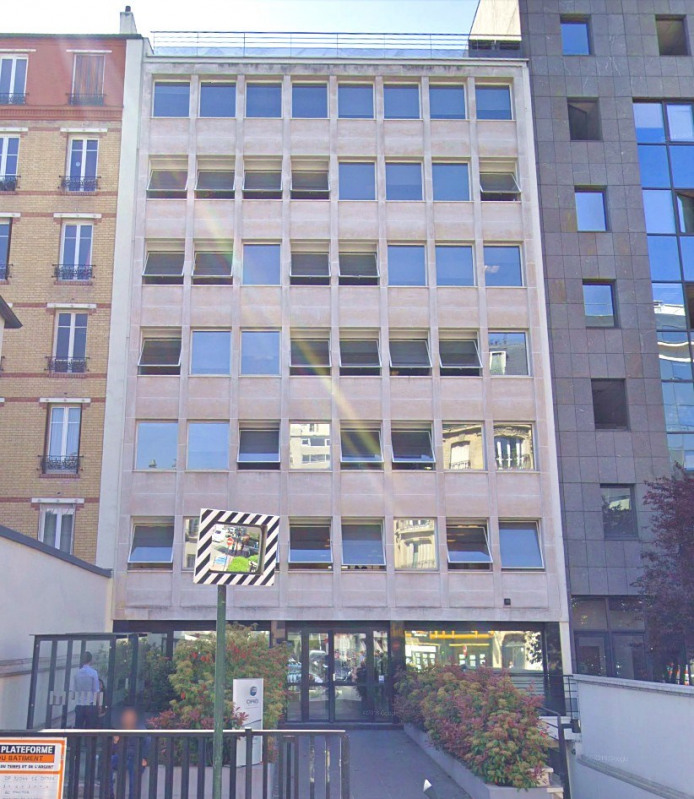

https://v.seloger.com/s/width/800/visuels/0/h/q/4/0hq41zl5sqacmfbril3wnie5vdvaxp9cowtmq9hpa.jpg


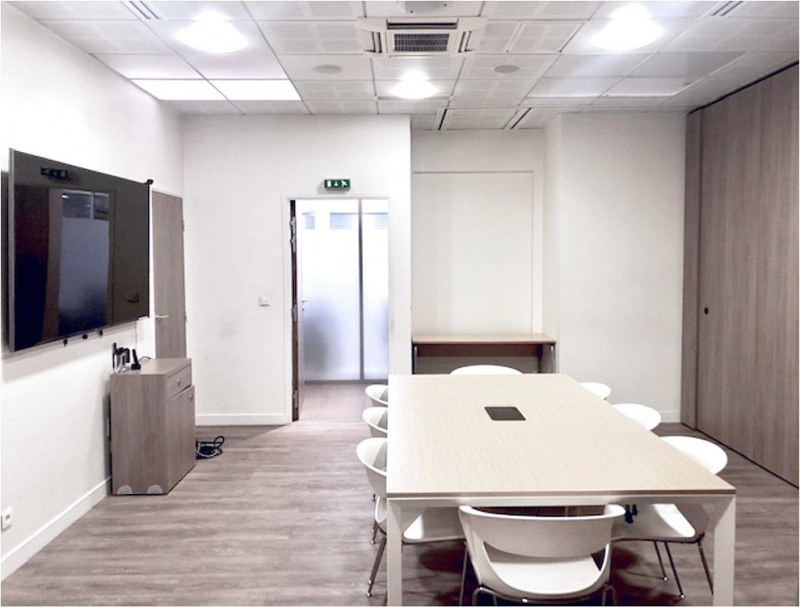

https://v.seloger.com/s/width/800/visuels/1/r/0/5/1r05kbkgl5ec16nxz3grwhpf1462415n6qewxfzpe.jpg


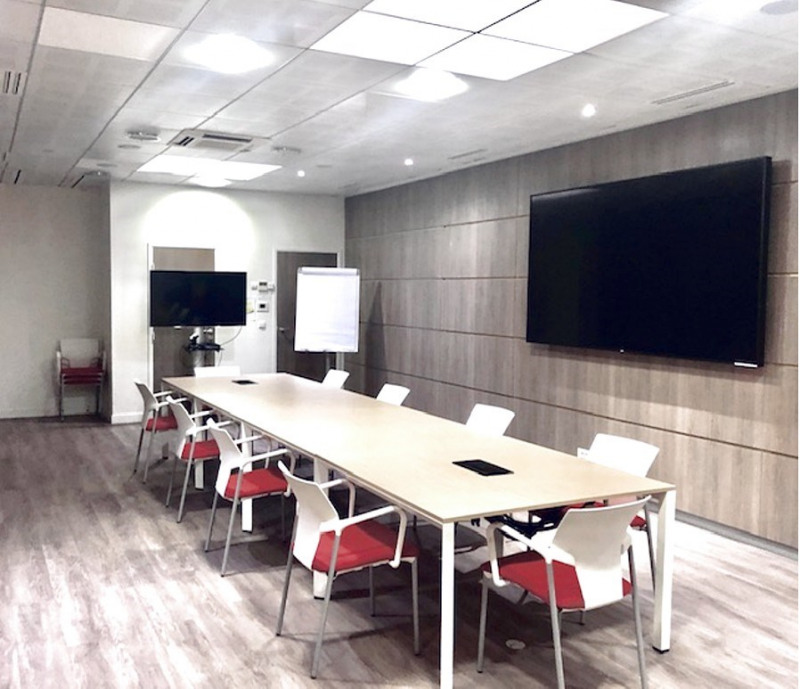

https://v.seloger.com/s/width/800/visuels/2/3/5/4/2354ieeutn2mz4qzbrly8fiav98yv5m6w54u507l1.jpg


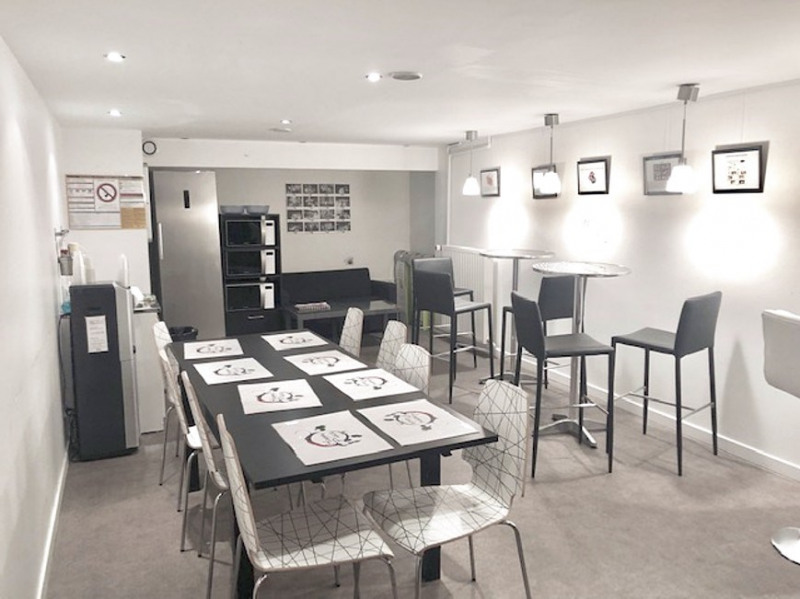

https://v.seloger.com/s/width/800/visuels/1/2/6/o/126obl2rmwkt7fr2qd0mjk951badlj50aevf5t8ws.jpg


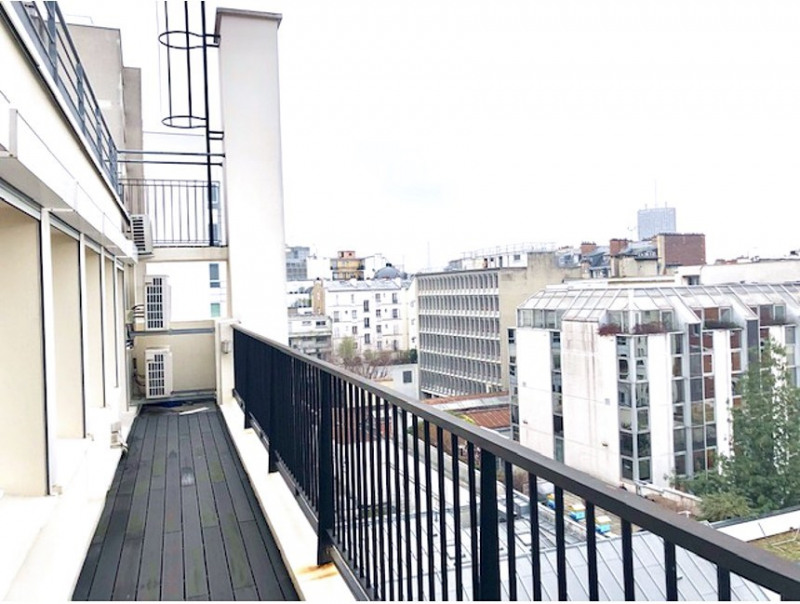

https://v.seloger.com/s/cdn/x/visuels/0/0/g/6/00g625pd8vannubi1m0dt06y40275rlumcovt1z7f.jpg


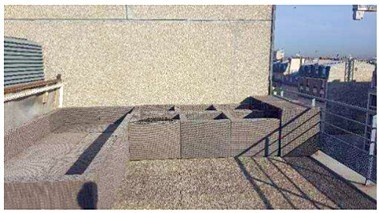

https://v.seloger.com/s/width/800/visuels/0/n/8/4/0n840l0wji3873tn8w5a3qdvjk6h84jj1i0yooryi.jpg


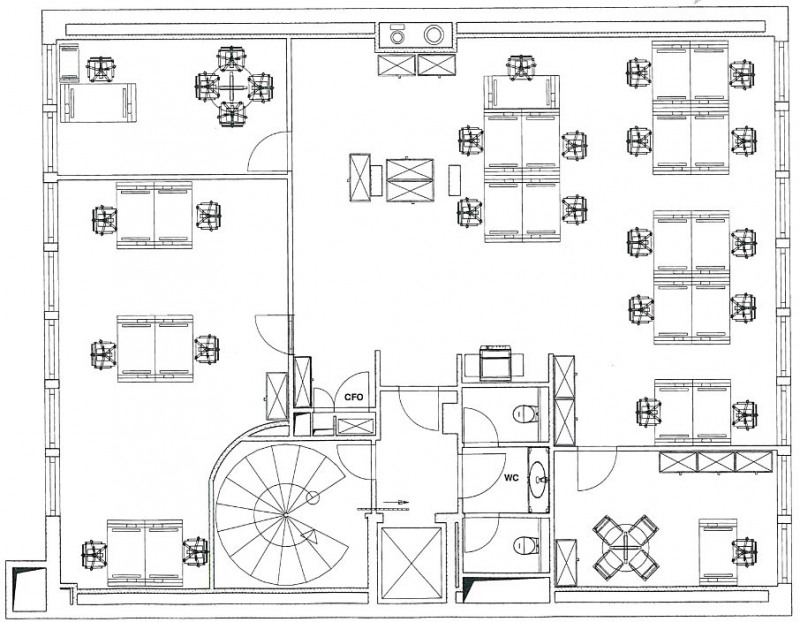

https://v.seloger.com/s/width/800/visuels/1/s/6/l/1s6lvu6wnsv3pj58smik8bqb8phfpsrng1pnnmh76.jpg


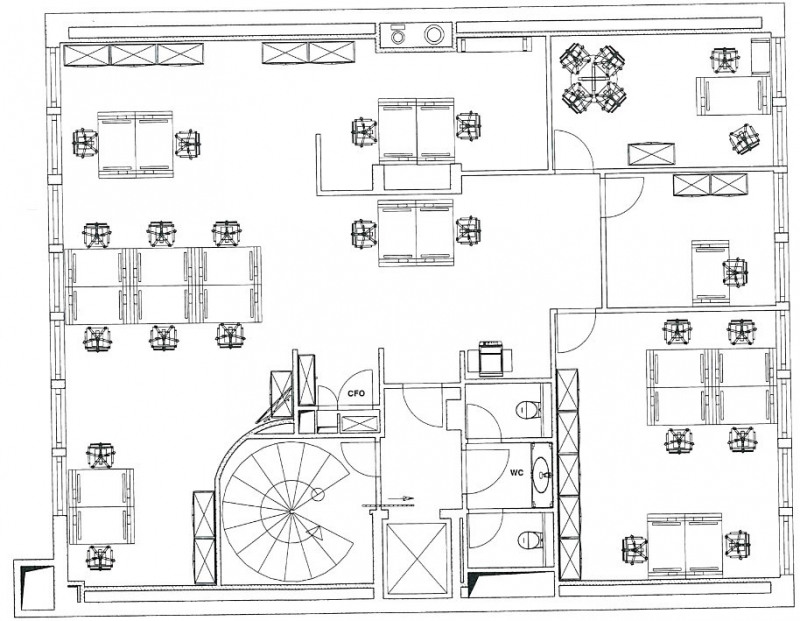

https://v.seloger.com/s/width/800/visuels/1/4/h/y/14hyhpye51kb0lau0q7fumow8yaforsjo32fns6mr.jpg


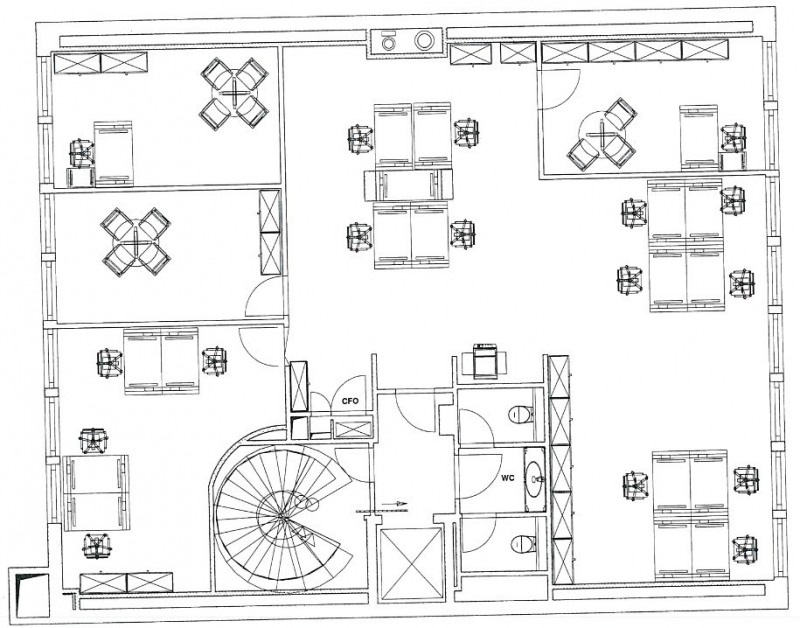

https://v.seloger.com/s/width/800/visuels/0/d/2/w/0d2wbq9tvze1qv95irdez943wgakspex5oi72bfyn.jpg


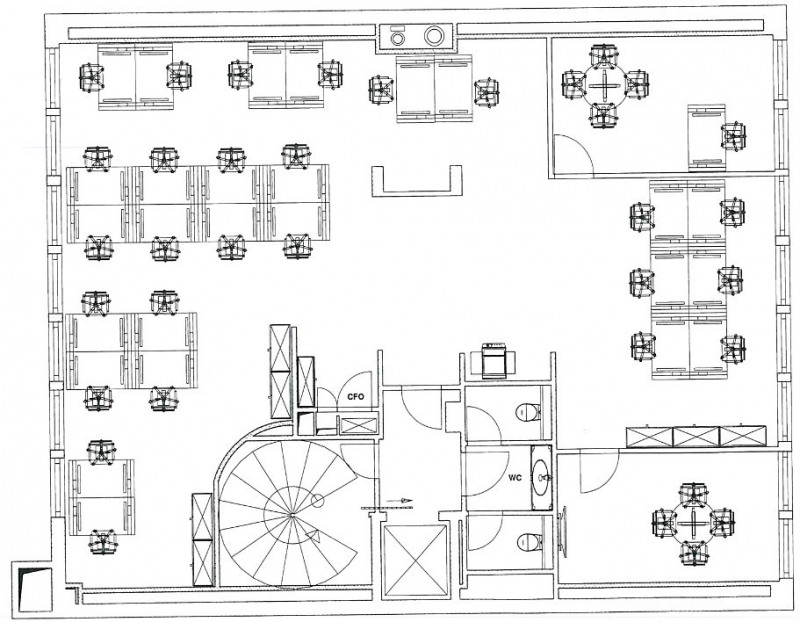

https://v.seloger.com/s/width/800/visuels/2/4/q/z/24qz6oszs6ef2mqt2mqqzhuwg8cupsmk5bryufclo.jpg


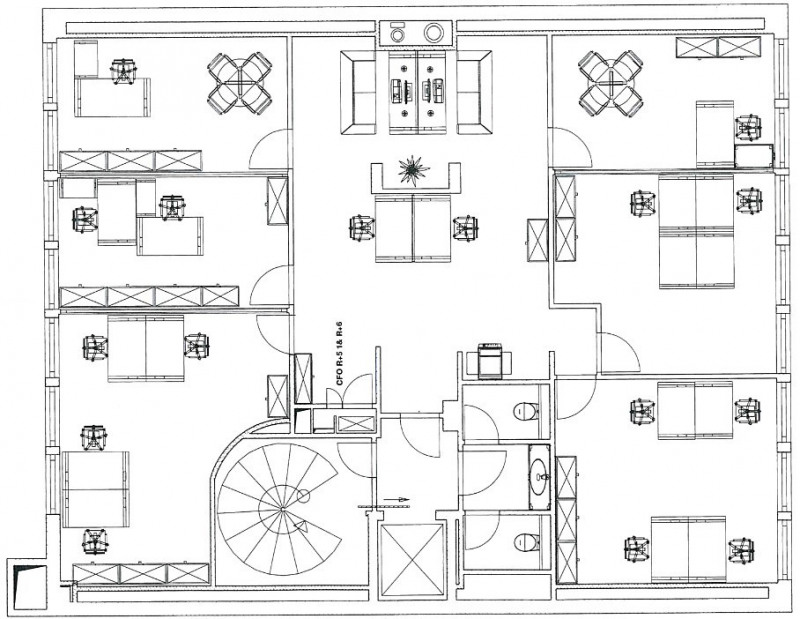

https://v.seloger.com/s/width/800/visuels/2/2/l/e/22ler9a6v6r8rl5djzfroz5edfqn8m9214qkbosy3.jpg


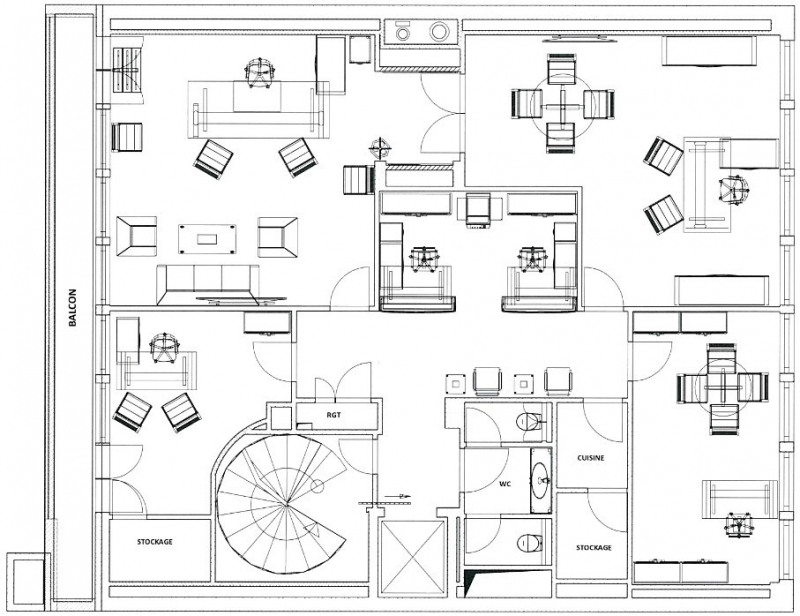

https://v.seloger.com/s/height/800/visuels/0/k/h/b/0khbmhip5kd7cdj46w61p4de3x1kptc027i0mppfs.jpg


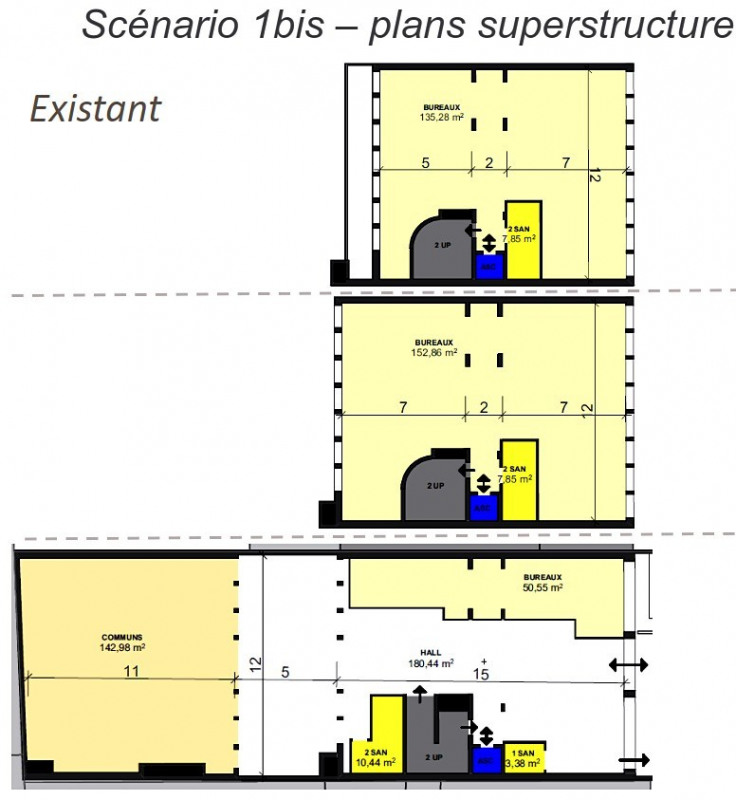

In [94]:
treat_image(gp_premises,6) # example of calling image treatment function for PREMISES variable at index 2